<a href="https://colab.research.google.com/github/omniaghazy/Data-Preprocessing/blob/main/linearRegression(house).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1575]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1576]:
df = pd.read_csv("/content/kc_house_data.csv")

In [1577]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [1578]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [1579]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [1580]:
df.shape

(21613, 21)

In [1581]:
df.duplicated().sum()

np.int64(0)

In [1582]:
for col in df.columns:
  print(f"{col} ===> {df[col].nunique()} ")
  print("##"*9)


id ===> 21436 
##################
date ===> 372 
##################
price ===> 4028 
##################
bedrooms ===> 13 
##################
bathrooms ===> 30 
##################
sqft_living ===> 1038 
##################
sqft_lot ===> 9782 
##################
floors ===> 6 
##################
waterfront ===> 2 
##################
view ===> 5 
##################
condition ===> 5 
##################
grade ===> 12 
##################
sqft_above ===> 946 
##################
sqft_basement ===> 306 
##################
yr_built ===> 116 
##################
yr_renovated ===> 70 
##################
zipcode ===> 70 
##################
lat ===> 5034 
##################
long ===> 752 
##################
sqft_living15 ===> 777 
##################
sqft_lot15 ===> 8689 
##################


In [1583]:
df.shape

(21613, 21)

In [1584]:
df.drop(["id"],axis=1,inplace=True)

In [1585]:
for col in df.select_dtypes(exclude="object"):
  print(f"min = {df[col].min()}................max = {df[col].max()}.........range = {df[col].max() - df[col].min()}")

min = 75000.0................max = 7700000.0.........range = 7625000.0
min = 0................max = 33.........range = 33
min = 0.0................max = 8.0.........range = 8.0
min = 290................max = 13540.........range = 13250
min = 520................max = 1651359.........range = 1650839
min = 1.0................max = 3.5.........range = 2.5
min = 0................max = 1.........range = 1
min = 0................max = 4.........range = 4
min = 1................max = 5.........range = 4
min = 1................max = 13.........range = 12
min = 290................max = 9410.........range = 9120
min = 0................max = 4820.........range = 4820
min = 1900................max = 2015.........range = 115
min = 0................max = 2015.........range = 2015
min = 98001................max = 98199.........range = 198
min = 47.1559................max = 47.7776.........range = 0.621699999999997
min = -122.519................max = -121.315.........range = 1.2040000000000077
min = 39

In [1586]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [1587]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000  221900.0         3       1.00         1180      5650   
1  20141209T000000  538000.0         3       2.25         2570      7242   
2  20150225T000000  180000.0         2       1.00          770     10000   
3  20141209T000000  604000.0         4       3.00         1960      5000   
4  20150218T000000  510000.0         3       2.00         1680      8080   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     1.0           0     0          3      7        1180              0   
1     2.0           0     0          3      7        2170            400   
2     1.0           0     0          3      6         770              0   
3     1.0           0     0          5      7        1050            910   
4     1.0           0     0          3      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503

In [1588]:
df['sqft_basement']

0          0
1        400
2          0
3        910
4          0
        ... 
21608      0
21609      0
21610      0
21611      0
21612      0
Name: sqft_basement, Length: 21613, dtype: int64

In [1589]:
df['date_year'] = pd.to_datetime(df['date']).dt.year
df['date_month'] = pd.to_datetime(df['date']).dt.month
df['date_day'] = pd.to_datetime(df['date']).dt.day


In [1590]:
df.drop(["date"],axis=1,inplace=True)


In [1591]:
df.head(20)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0    221900.0         3       1.00         1180      5650     1.0           0   
1    538000.0         3       2.25         2570      7242     2.0           0   
2    180000.0         2       1.00          770     10000     1.0           0   
3    604000.0         4       3.00         1960      5000     1.0           0   
4    510000.0         3       2.00         1680      8080     1.0           0   
5   1225000.0         4       4.50         5420    101930     1.0           0   
6    257500.0         3       2.25         1715      6819     2.0           0   
7    291850.0         3       1.50         1060      9711     1.0           0   
8    229500.0         3       1.00         1780      7470     1.0           0   
9    323000.0         3       2.50         1890      6560     2.0           0   
10   662500.0         3       2.50         3560      9796     1.0           0   
11   468000.0         2       1.00         1160      6000     1.0           0   
12   310000.0         3       1.00         1430     19901     1.5           0   
13   400000.0         3       1.75         1370      9680     1.0           0   
14   530000.0         5       2.00         1810      4850     1.5           0   
15   650000.0         4       3.00         2950      5000     2.0           0   
16   395000.0         3       2.00         1890     14040     2.0           0   
17   485000.0         4       1.00         1600      4300     1.5           0   
18   189000.0         2       1.00         1200      9850     1.0           0   
19   230000.0         3       1.00         1250      9774     1.0           0   

    view  condition  grade  ...  yr_built  yr_renovated  zipcode      lat  \
0      0          3      7  ...      1955             0    98178  47.5112   
1      0          3      7  ...      1951          1991    98125  47.7210   
2      0          3      6  ...      1933             0    98028  47.7379   
3      0          5      7  ...      1965             0    98136  47.5208   
4      0          3      8  ...      1987             0    98074  47.6168   
5      0          3     11  ...      2001             0    98053  47.6561   
6      0          3      7  ...      1995             0    98003  47.3097   
7      0          3      7  ...      1963             0    98198  47.4095   
8      0          3      7  ...      1960             0    98146  47.5123   
9      0          3      7  ...      2003             0    98038  47.3684   
10     0          3      8  ...      1965             0    98007  47.6007   
11     0          4      7  ...      1942             0    98115  47.6900   
12     0          4      7  ...      1927             0    98028  47.7558   
13     0          4      7  ...      1977             0    98074  47.6127   
14     0          3      7  ...      1900             0    98107  47.6700   
15     3          3      9  ...      1979             0    98126  47.5714   
16     0          3      7  ...      1994             0    98019  47.7277   
17     0          4      7  ...      1916             0    98103  47.6648   
18     0          4      7  ...      1921             0    98002  47.3089   
19     0          4      7  ...      1969             0    98003  47.3343   

       long  sqft_living15  sqft_lot15  date_year  date_month  date_day  
0  -122.257           1340        5650       2014          10        13  
1  -122.319           1690        7639       2014          12         9  
2  -122.233           2720        8062       2015           2        25  
3  -122.393           1360        5000       2014          12         9  
4  -122.045           1800        7503       2015           2        18  
5  -122.005           4760      101930       2014           5        12  
6  -122.327           2238        6819       2014           6        27  
7  -122.315           1650        9711       2015           1        15  
8  -122.337           

Correlation between price and bedrooms: 0.308349598145638


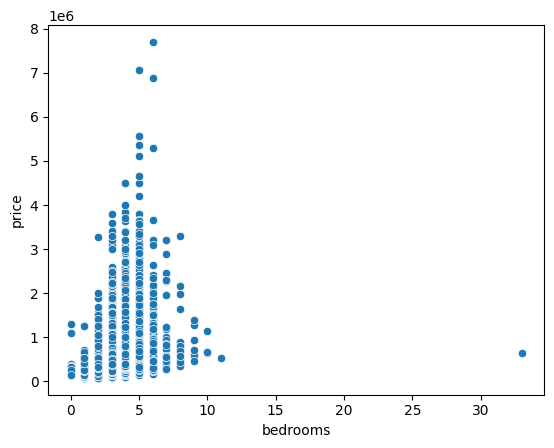

Correlation between price and bathrooms: 0.525137505413962


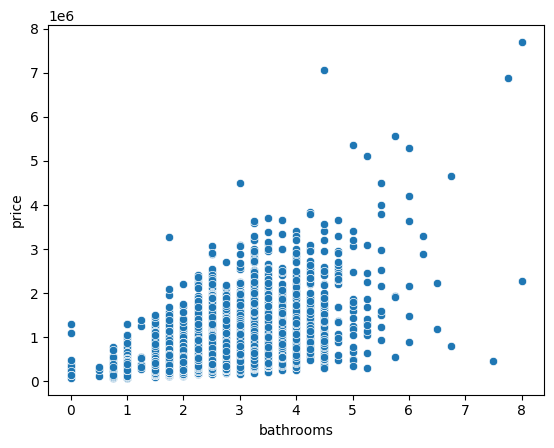

Correlation between price and sqft_living: 0.7020350546118003


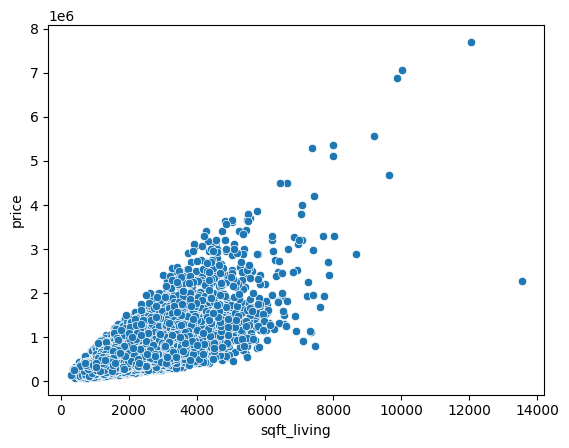

Correlation between price and sqft_lot: 0.08966086058710017


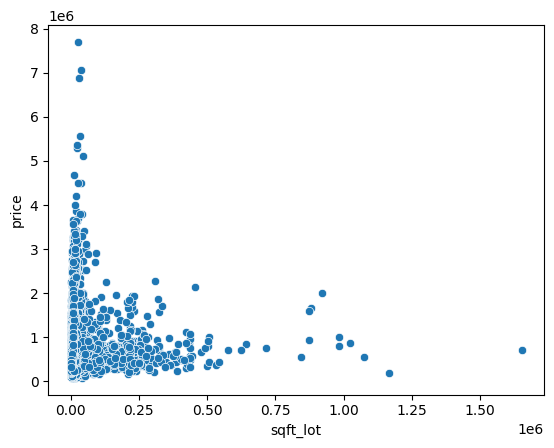

Correlation between price and floors: 0.2567938875507184


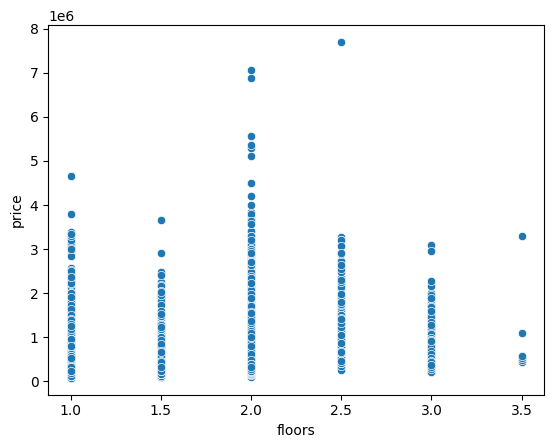

Correlation between price and waterfront: 0.26636943403060226


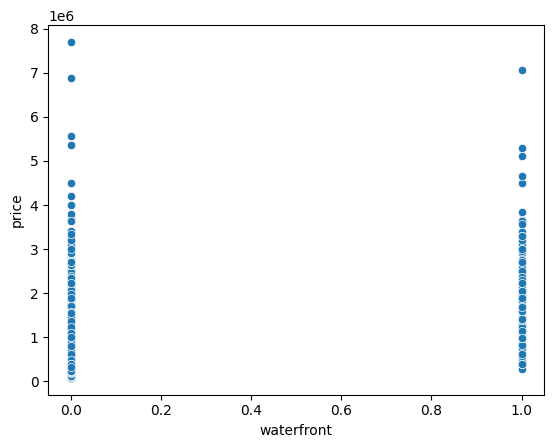

Correlation between price and view: 0.39729348829450495


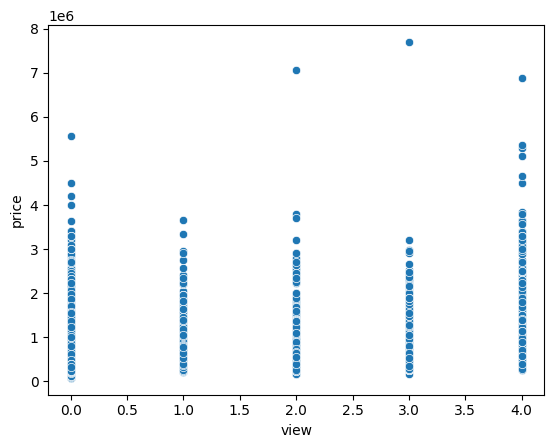

Correlation between price and condition: 0.03636178912899747


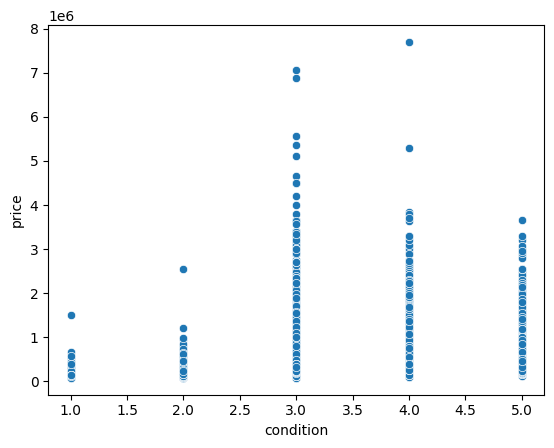

Correlation between price and grade: 0.6674342560202365


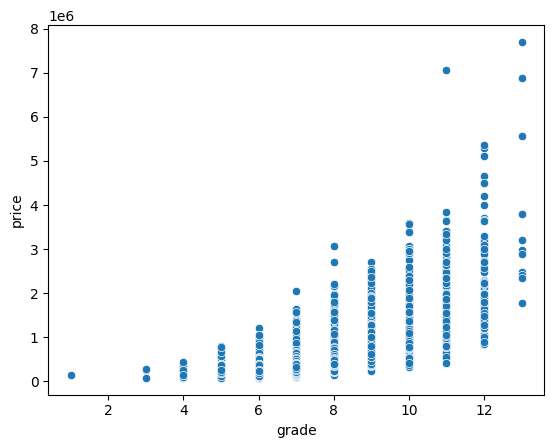

Correlation between price and sqft_above: 0.6055672983560781


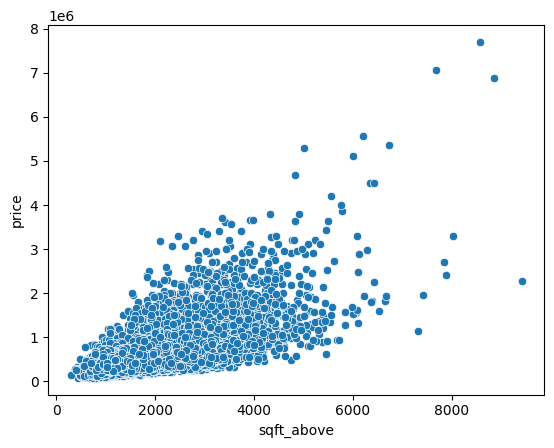

Correlation between price and sqft_basement: 0.3238160207119833


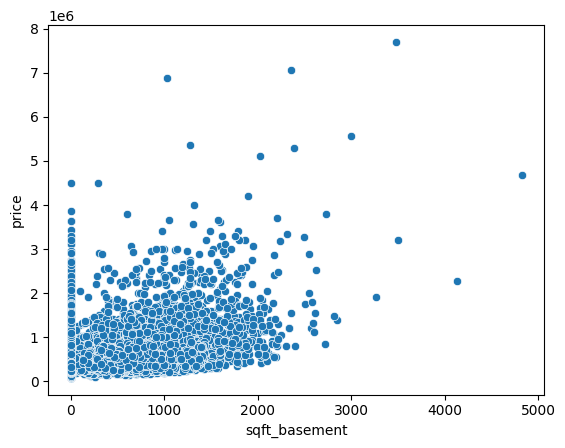

Correlation between price and yr_built: 0.05401153149479269


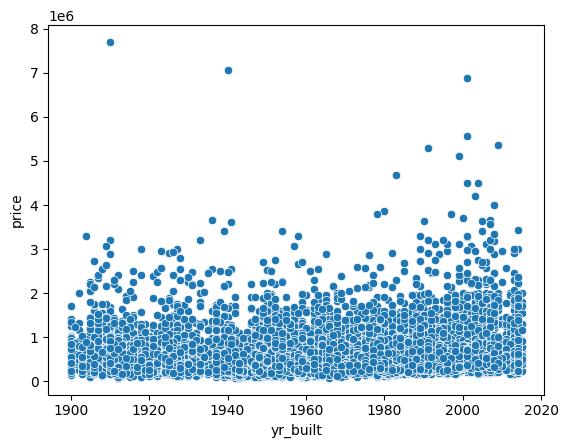

Correlation between price and yr_renovated: 0.12643379344089314


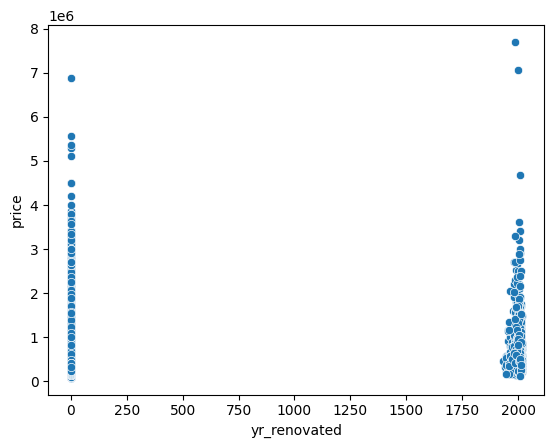

Correlation between price and zipcode: -0.05320285429832562


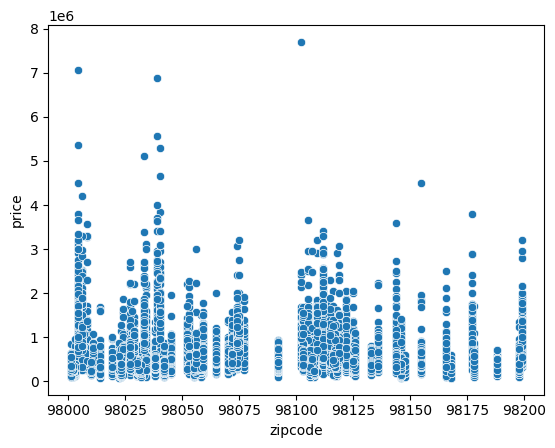

Correlation between price and lat: 0.30700347999521865


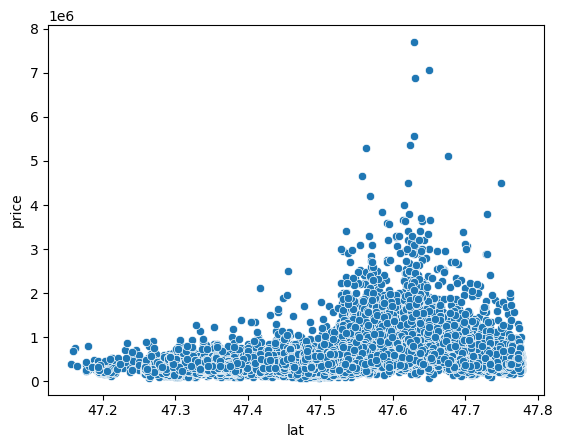

Correlation between price and long: 0.021626241039306705


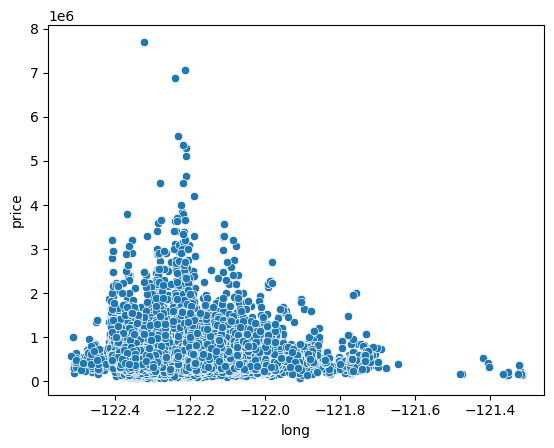

Correlation between price and sqft_living15: 0.5853789035795679


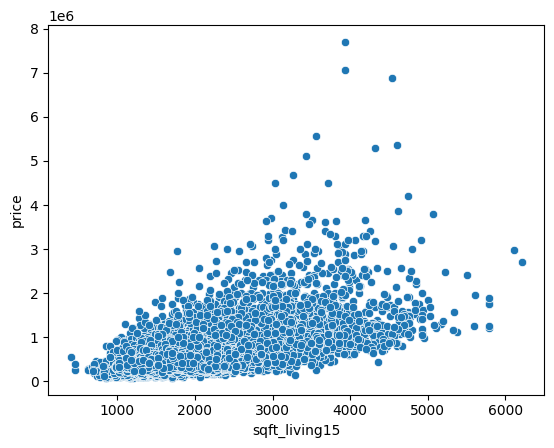

Correlation between price and sqft_lot15: 0.08244715251948599


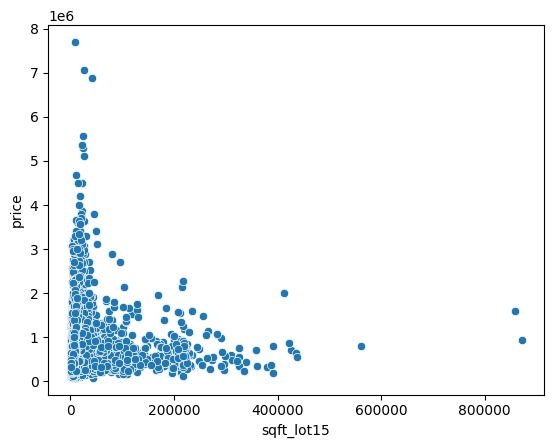

Correlation between price and date_year: 0.0035760408824667632


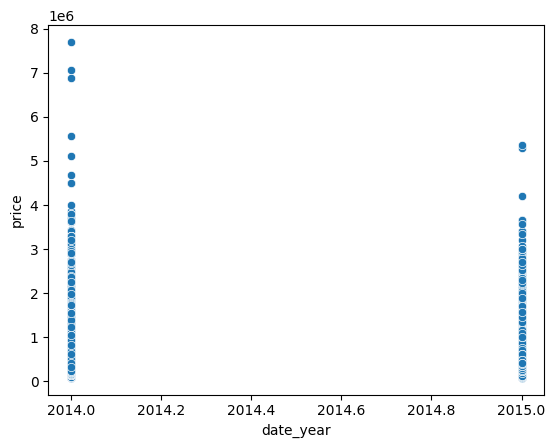

Correlation between price and date_month: -0.010080812107396264


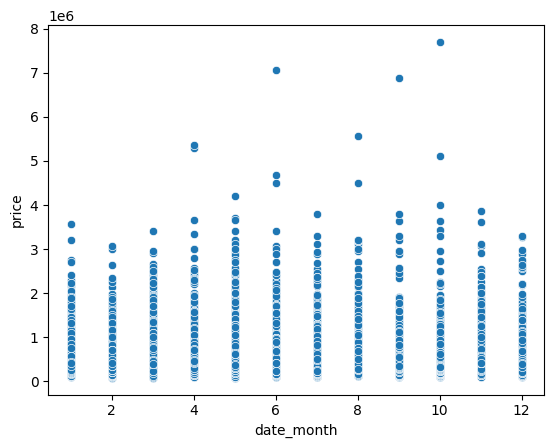

Correlation between price and date_day: -0.014670011075933324


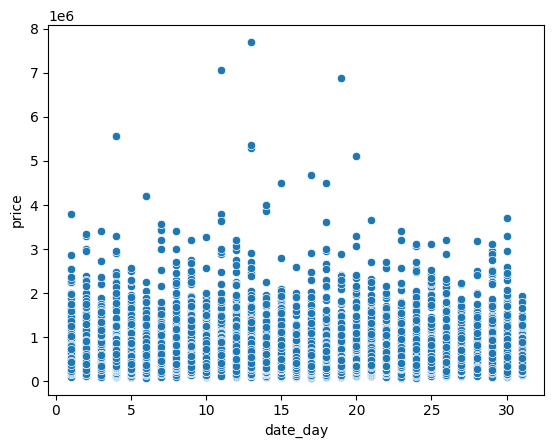

In [1592]:
for col in df.columns:
  if col != 'price' :
    correlation = df['price'].corr(df[col])
    print(f"Correlation between price and {col}: {correlation}")
    sns.scatterplot(x=col, y='price', data=df)
    plt.show()

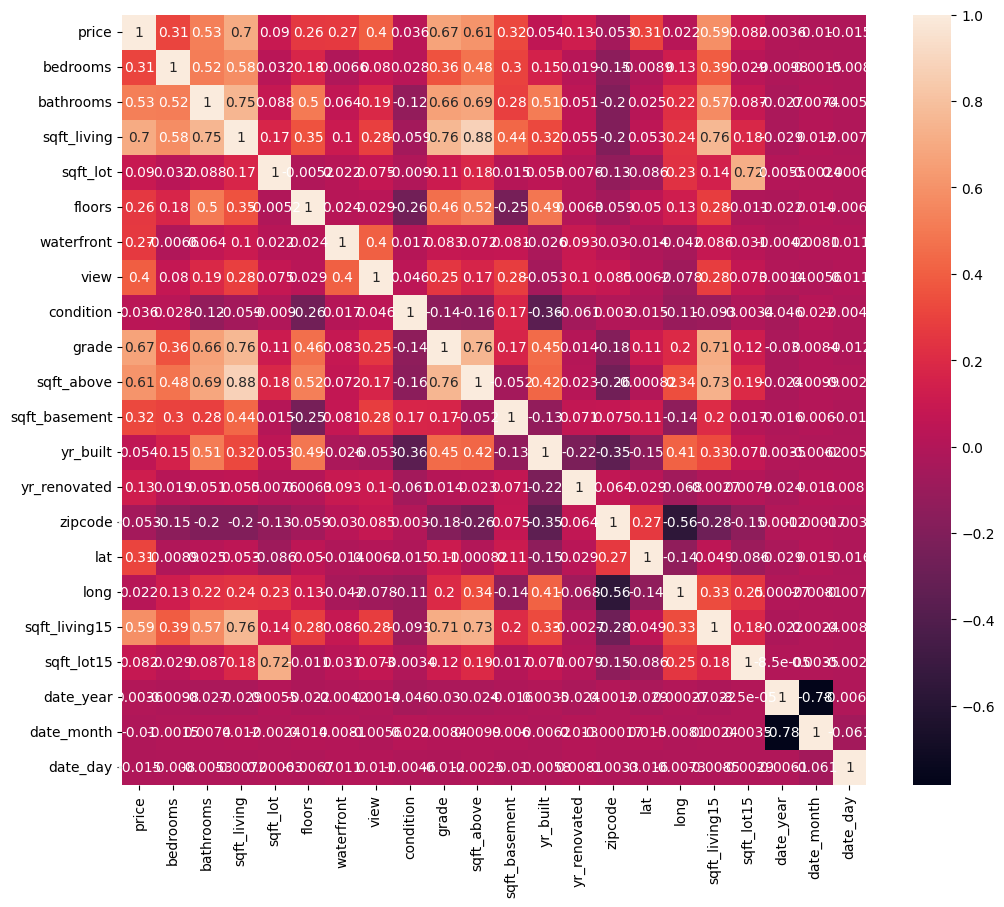

In [1593]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),annot=True )
plt.show()

In [1594]:
df['price'].describe()


count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

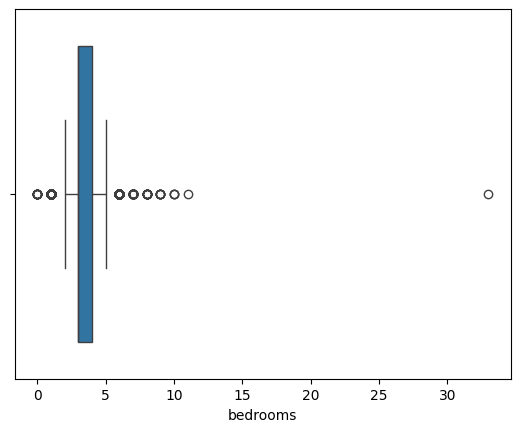

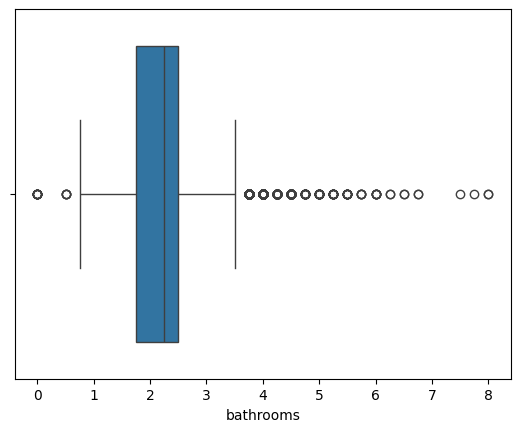

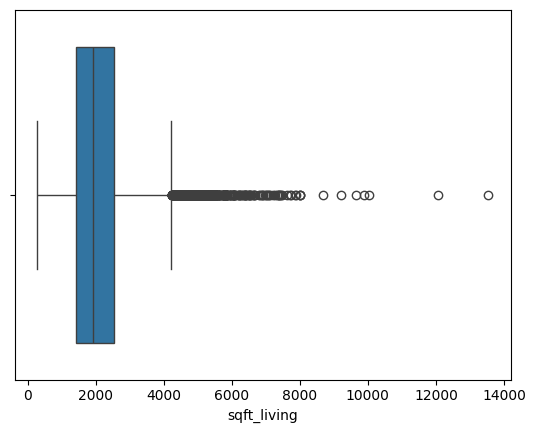

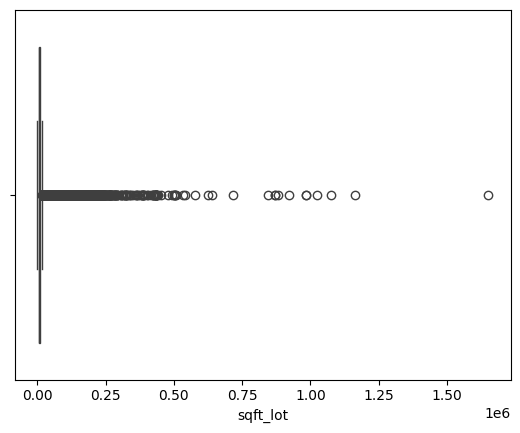

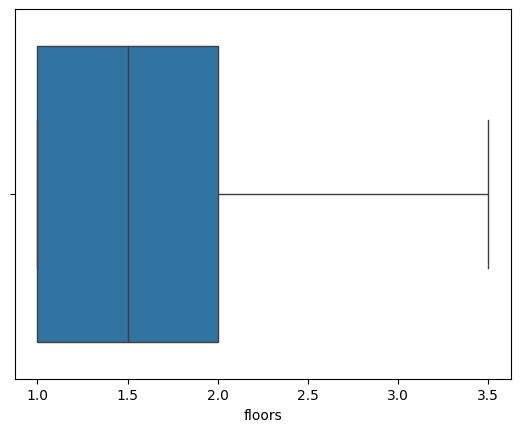

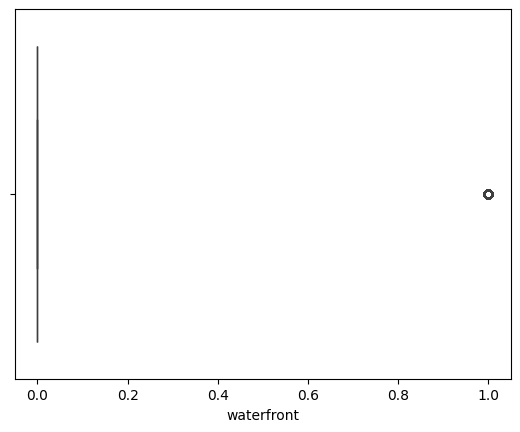

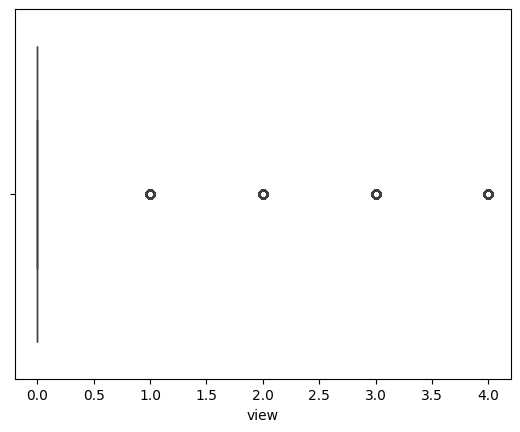

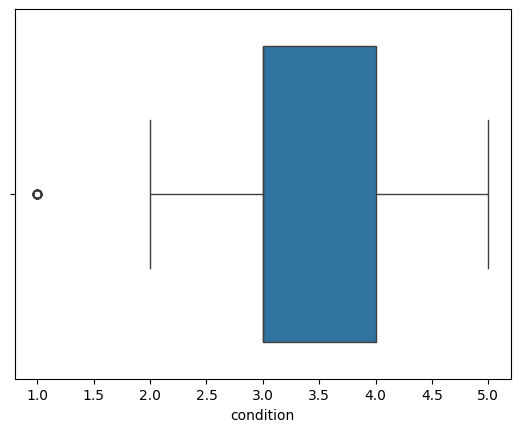

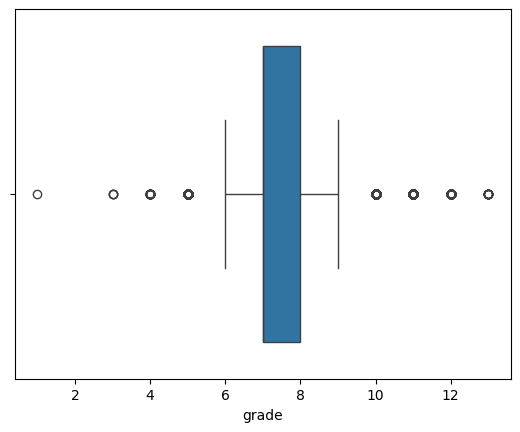

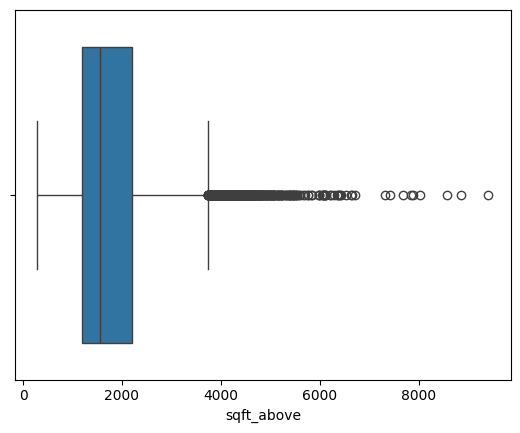

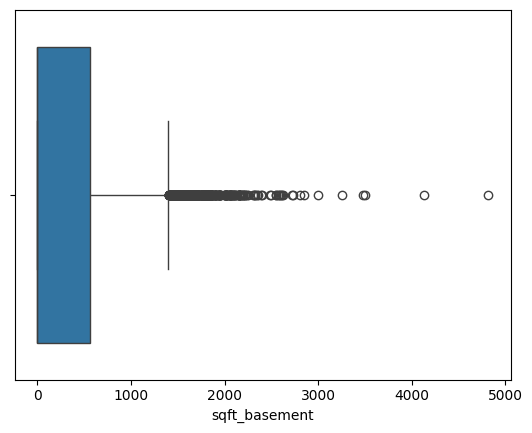

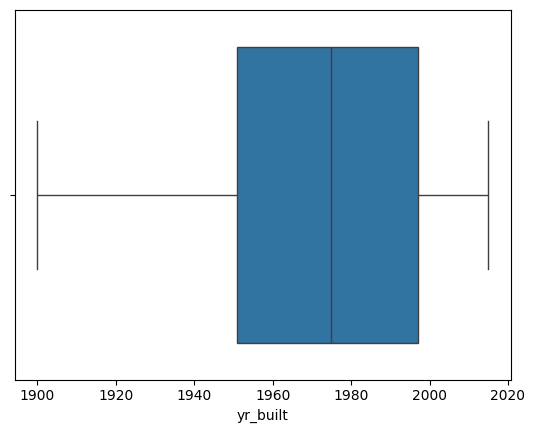

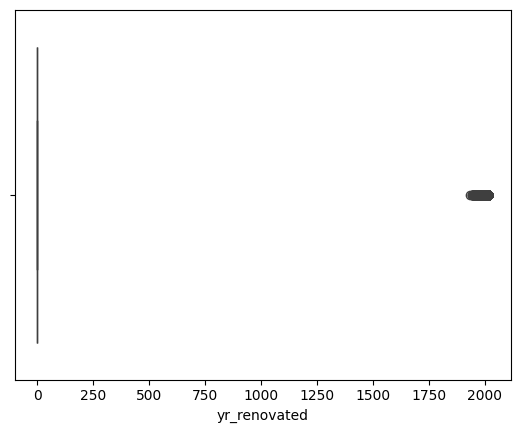

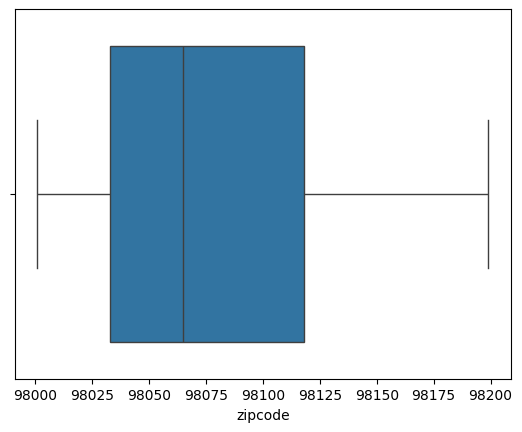

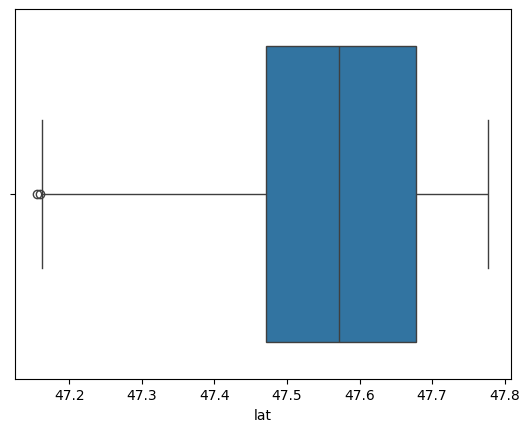

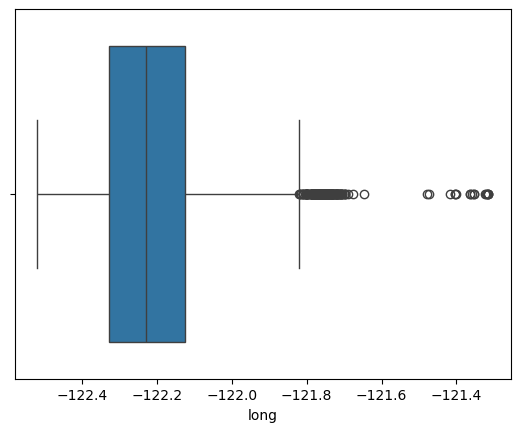

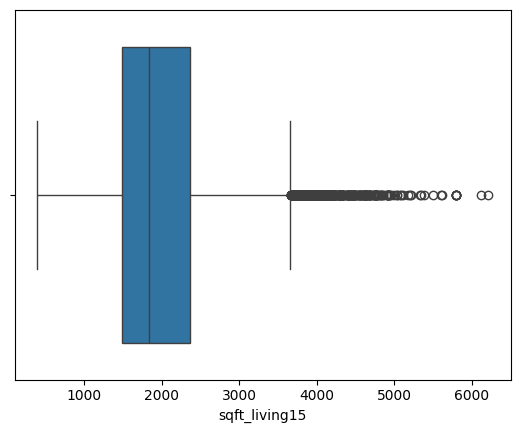

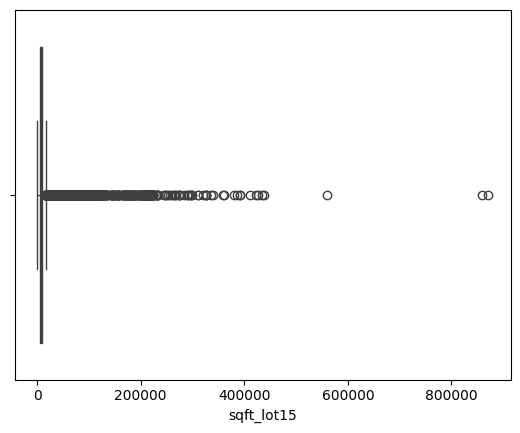

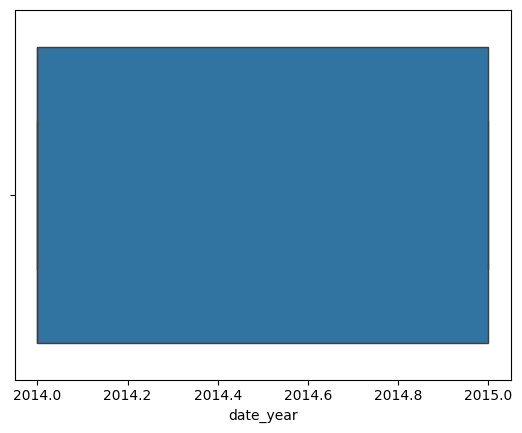

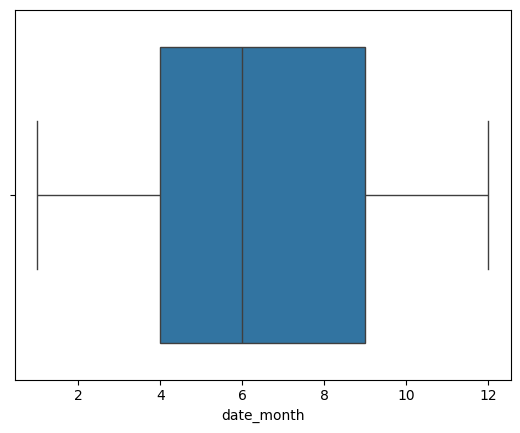

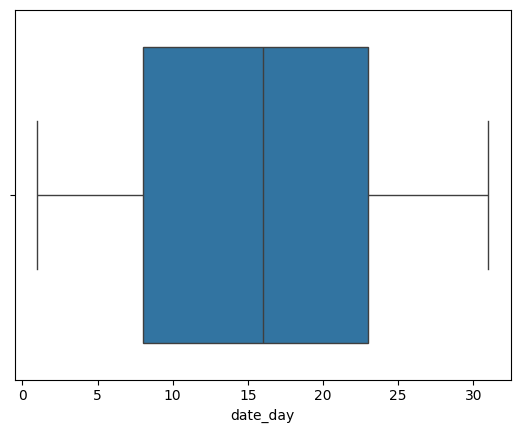

In [1595]:
for col in df.columns:
  if col != 'price' :
    sns.boxplot(x=df[col])
    plt.show()

fix outliers

In [1596]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

outlier_cols = ["bedrooms", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"]
for col in outlier_cols:
    df = remove_outliers_iqr(df, col)

display(df.shape)

(16882, 22)

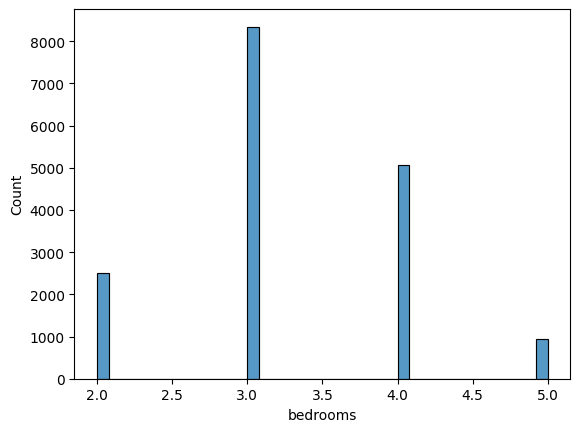

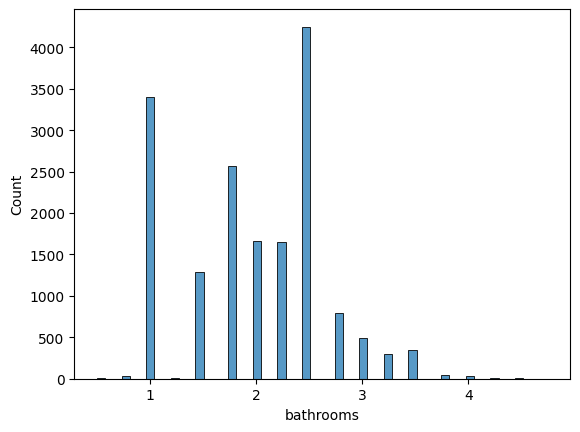

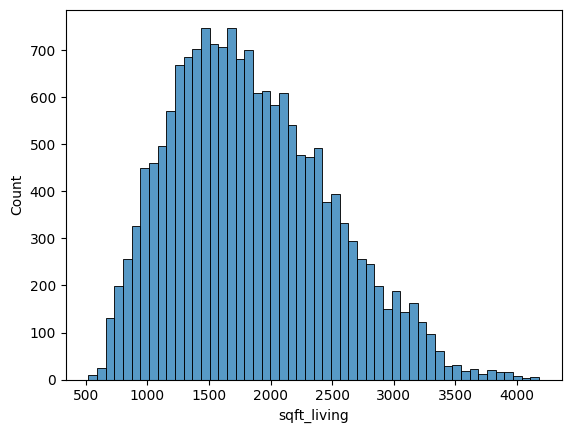

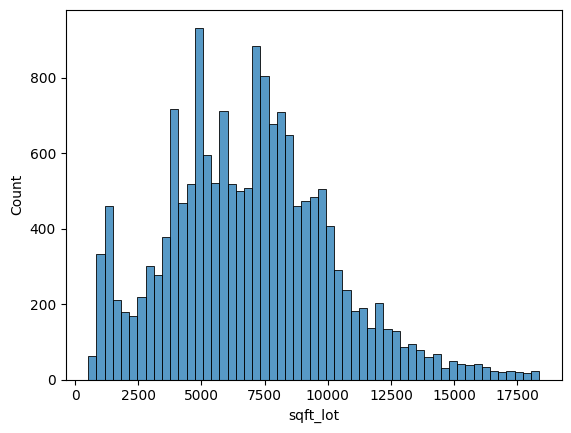

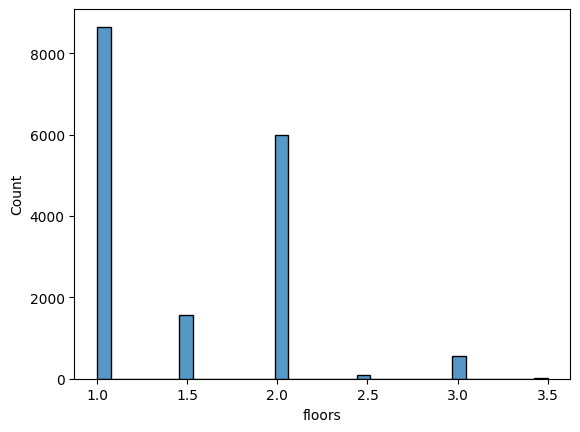

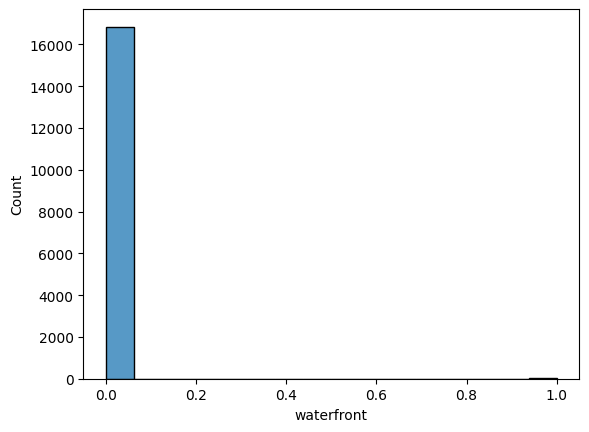

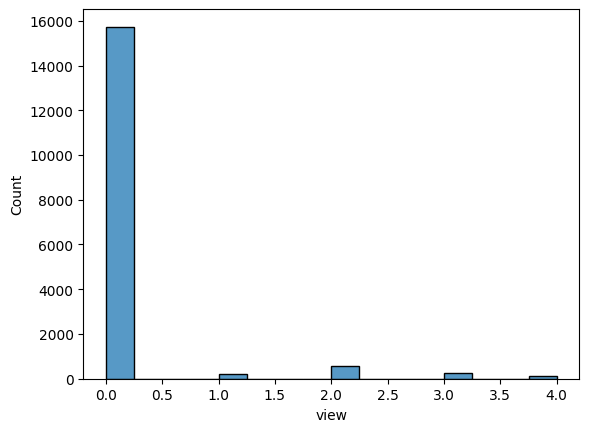

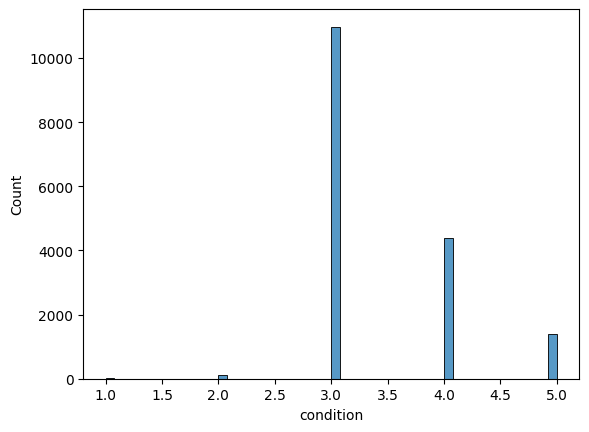

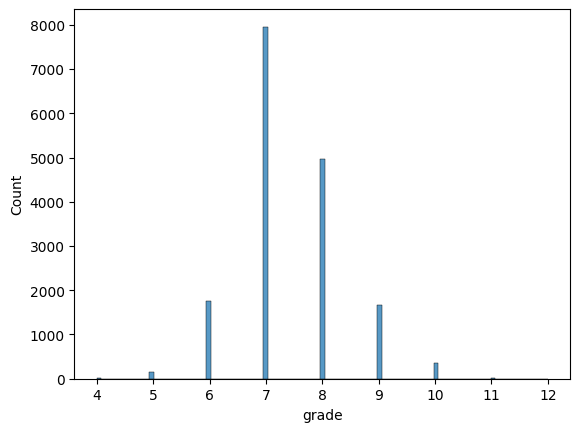

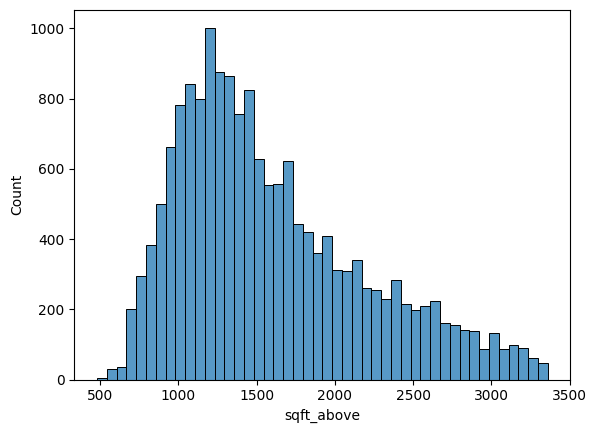

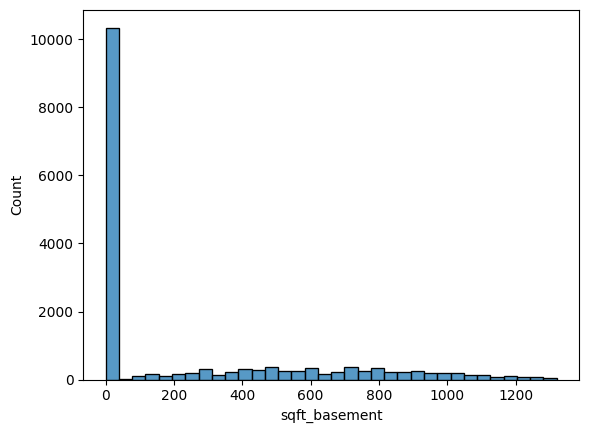

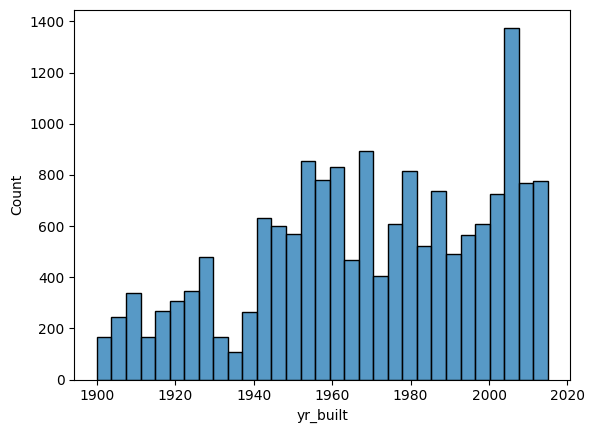

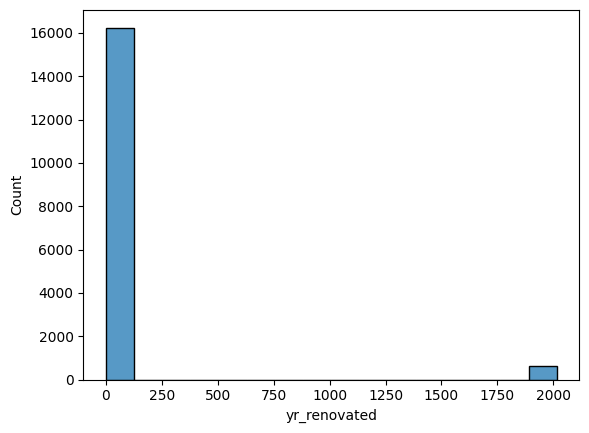

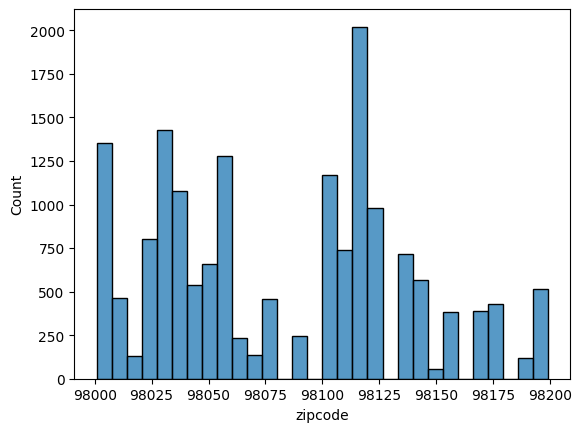

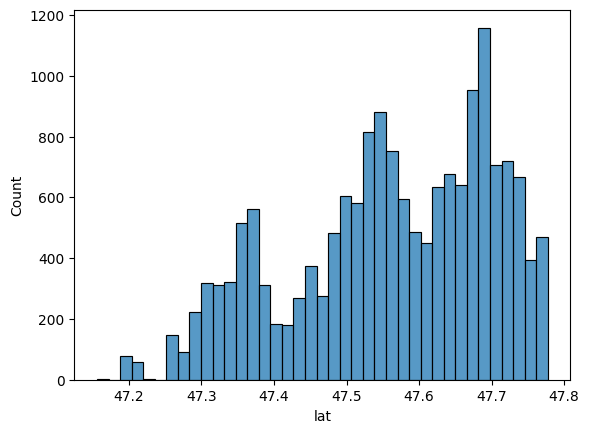

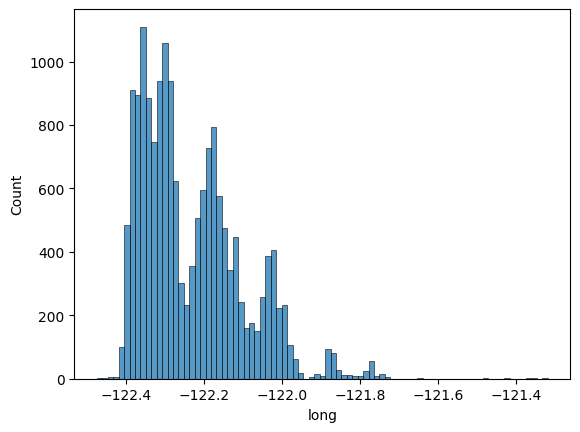

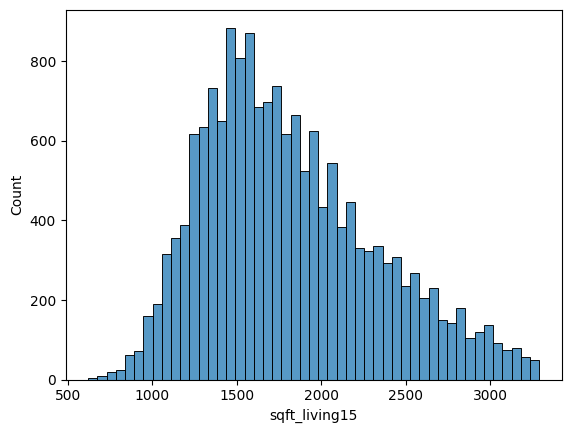

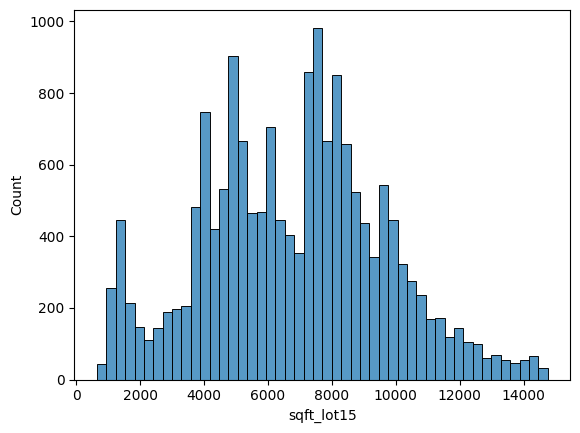

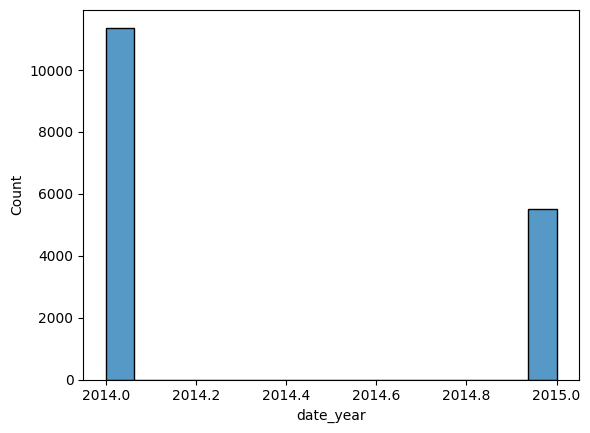

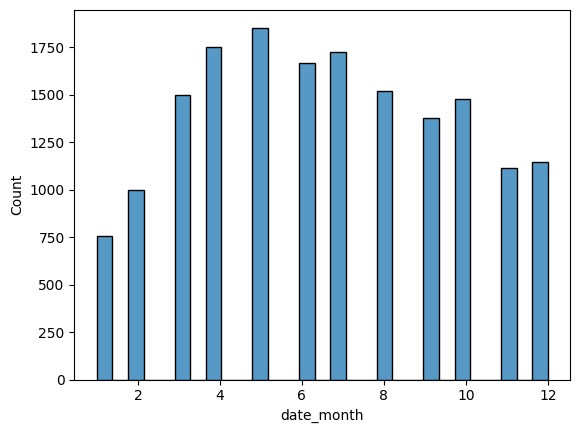

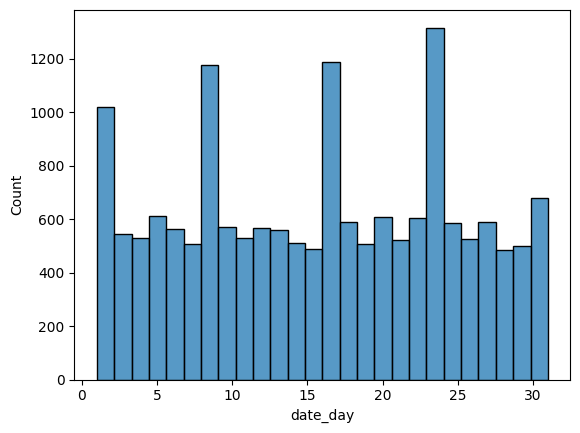

In [1597]:
for col in df.columns:
  if col != 'price' :
    sns.histplot(x=df[col])
    plt.show()

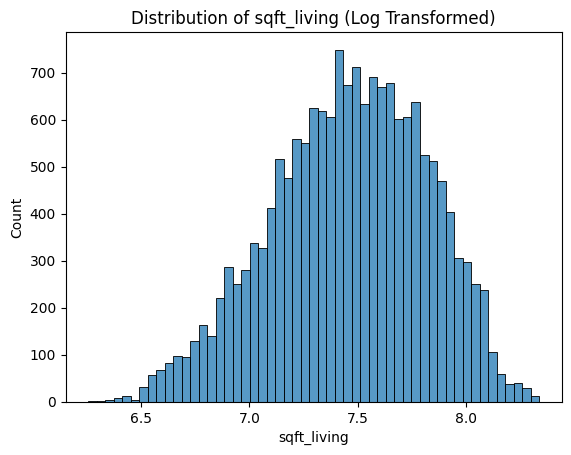

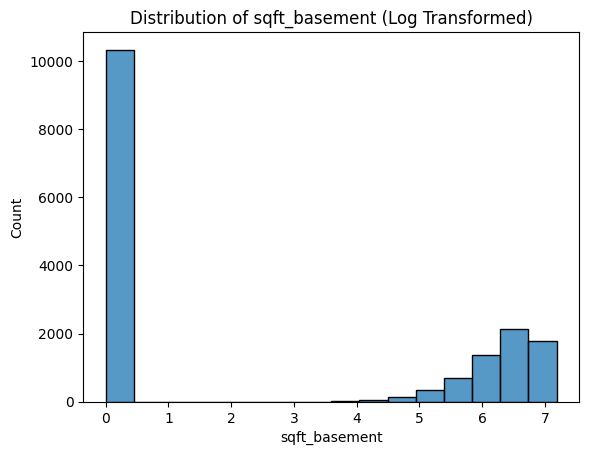

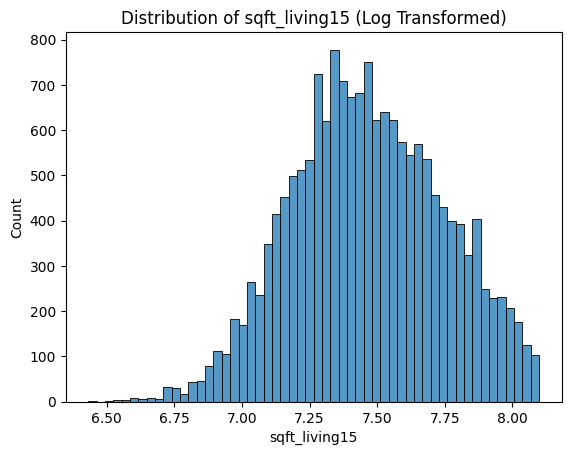

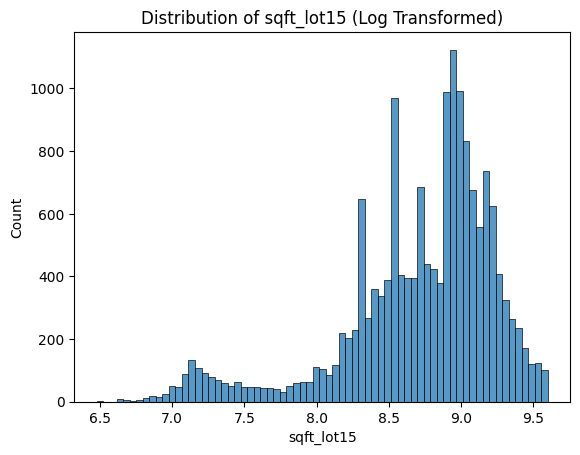

In [1598]:
list_log = ["sqft_living","sqft_basement","sqft_living15","sqft_lot15"]
for col in list_log:
  df[col] = np.log(df[col]+1)
  sns.histplot(x=df[col])
  plt.title(f'Distribution of {col} (Log Transformed)')
  plt.show()

In [1599]:
df.groupby("view")["price"].mean()

view
0    4.518984e+05
1    6.551080e+05
2    6.576295e+05
3    7.960037e+05
4    1.039362e+06
Name: price, dtype: float64

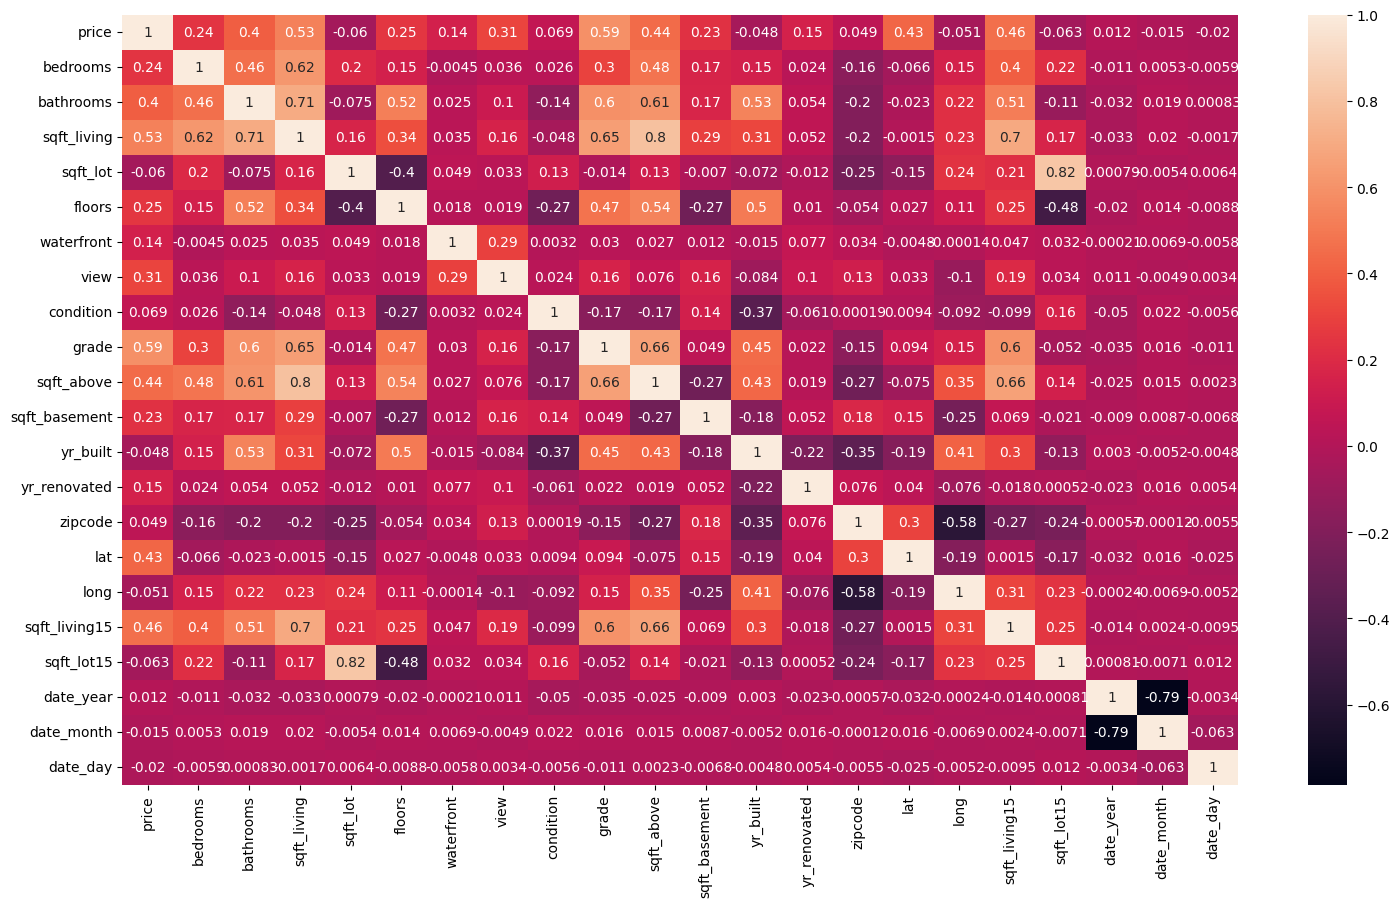

In [1600]:
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [1601]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00     7.074117      5650     1.0           0   
1  538000.0         3       2.25     7.852050      7242     2.0           0   
2  180000.0         2       1.00     6.647688     10000     1.0           0   
3  604000.0         4       3.00     7.581210      5000     1.0           0   
4  510000.0         3       2.00     7.427144      8080     1.0           0   

   view  condition  grade  ...  yr_built  yr_renovated  zipcode      lat  \
0     0          3      7  ...      1955             0    98178  47.5112   
1     0          3      7  ...      1951          1991    98125  47.7210   
2     0          3      6  ...      1933             0    98028  47.7379   
3     0          5      7  ...      1965             0    98136  47.5208   
4     0          3      8  ...      1987             0    98074  47.6168   

      long  sqft_living15  sqft_lot15  date_year  date_month  date_day  
0 -122.257       7.201171    8.639588       2014          10        13  
1 -122.319       7.433075    8.941153       2014          12         9  
2 -122.233       7.908755    8.995041       2015           2        25  
3 -122.393       7.215975    8.517393       2014          12         9  
4 -122.045       7.496097    8.923191       2015           2        18  

[5 rows x 22 columns]

In [1602]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00     7.074117      5650     1.0           0   
1  538000.0         3       2.25     7.852050      7242     2.0           0   
2  180000.0         2       1.00     6.647688     10000     1.0           0   
3  604000.0         4       3.00     7.581210      5000     1.0           0   
4  510000.0         3       2.00     7.427144      8080     1.0           0   

   view  condition  grade  ...  yr_built  yr_renovated  zipcode      lat  \
0     0          3      7  ...      1955             0    98178  47.5112   
1     0          3      7  ...      1951          1991    98125  47.7210   
2     0          3      6  ...      1933             0    98028  47.7379   
3     0          5      7  ...      1965             0    98136  47.5208   
4     0          3      8  ...      1987             0    98074  47.6168   

      long  sqft_living15  sqft_lot15  date_year  date_month  date_day  
0 -122.257       7.201171    8.639588       2014          10        13  
1 -122.319       7.433075    8.941153       2014          12         9  
2 -122.233       7.908755    8.995041       2015           2        25  
3 -122.393       7.215975    8.517393       2014          12         9  
4 -122.045       7.496097    8.923191       2015           2        18  

[5 rows x 22 columns]

In [1603]:
df["sqft_basement"].isna().sum()


np.int64(0)

In [1604]:
df["sqft_basement"]

0        0.000000
1        5.993961
2        0.000000
3        6.814543
4        0.000000
           ...   
21608    0.000000
21609    0.000000
21610    0.000000
21611    0.000000
21612    0.000000
Name: sqft_basement, Length: 16882, dtype: float64

In [1605]:
df['sqft_basement']

0        0.000000
1        5.993961
2        0.000000
3        6.814543
4        0.000000
           ...   
21608    0.000000
21609    0.000000
21610    0.000000
21611    0.000000
21612    0.000000
Name: sqft_basement, Length: 16882, dtype: float64

In [1606]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00     7.074117      5650     1.0           0   
1  538000.0         3       2.25     7.852050      7242     2.0           0   
2  180000.0         2       1.00     6.647688     10000     1.0           0   
3  604000.0         4       3.00     7.581210      5000     1.0           0   
4  510000.0         3       2.00     7.427144      8080     1.0           0   

   view  condition  grade  ...  yr_built  yr_renovated  zipcode      lat  \
0     0          3      7  ...      1955             0    98178  47.5112   
1     0          3      7  ...      1951          1991    98125  47.7210   
2     0          3      6  ...      1933             0    98028  47.7379   
3     0          5      7  ...      1965             0    98136  47.5208   
4     0          3      8  ...      1987             0    98074  47.6168   

      long  sqft_living15  sqft_lot15  date_year  date_month  date_day  
0 -122.257       7.201171    8.639588       2014          10        13  
1 -122.319       7.433075    8.941153       2014          12         9  
2 -122.233       7.908755    8.995041       2015           2        25  
3 -122.393       7.215975    8.517393       2014          12         9  
4 -122.045       7.496097    8.923191       2015           2        18  

[5 rows x 22 columns]

In [1607]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00     7.074117      5650     1.0           0   
1  538000.0         3       2.25     7.852050      7242     2.0           0   
2  180000.0         2       1.00     6.647688     10000     1.0           0   
3  604000.0         4       3.00     7.581210      5000     1.0           0   
4  510000.0         3       2.00     7.427144      8080     1.0           0   

   view  condition  grade  ...  yr_built  yr_renovated  zipcode      lat  \
0     0          3      7  ...      1955             0    98178  47.5112   
1     0          3      7  ...      1951          1991    98125  47.7210   
2     0          3      6  ...      1933             0    98028  47.7379   
3     0          5      7  ...      1965             0    98136  47.5208   
4     0          3      8  ...      1987             0    98074  47.6168   

      long  sqft_living15  sqft_lot15  date_year  date_month  date_day  
0 -122.257       7.201171    8.639588       2014          10        13  
1 -122.319       7.433075    8.941153       2014          12         9  
2 -122.233       7.908755    8.995041       2015           2        25  
3 -122.393       7.215975    8.517393       2014          12         9  
4 -122.045       7.496097    8.923191       2015           2        18  

[5 rows x 22 columns]

In [1608]:

df = pd.get_dummies(df, columns=['zipcode'], drop_first=True)

In [1609]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00     7.074117      5650     1.0           0   
1  538000.0         3       2.25     7.852050      7242     2.0           0   
2  180000.0         2       1.00     6.647688     10000     1.0           0   
3  604000.0         4       3.00     7.581210      5000     1.0           0   
4  510000.0         3       2.00     7.427144      8080     1.0           0   

   view  condition  grade  ...  zipcode_98146  zipcode_98148  zipcode_98155  \
0     0          3      7  ...          False          False          False   
1     0          3      7  ...          False          False          False   
2     0          3      6  ...          False          False          False   
3     0          5      7  ...          False          False          False   
4     0          3      8  ...          False          False          False   

   zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
0          False          False          False           True          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   zipcode_98198  zipcode_98199  
0          False          False  
1          False          False  
2          False          False  
3          False          False  
4          False          False  

[5 rows x 90 columns]

In [1610]:
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  1.688200e+04  16882.000000  16882.000000  16882.000000  16882.000000   
mean   4.700784e+05      3.263713      1.998756      7.459698   6917.990404   
std    2.333533e+05      0.777320      0.673894      0.357698   3233.344395   
min    7.800000e+04      2.000000      0.500000      6.255750    520.000000   
25%    3.050000e+05      3.000000      1.500000      7.215975   4680.000000   
50%    4.211000e+05      3.000000      2.000000      7.479300   6953.500000   
75%    5.750000e+05      4.000000      2.500000      7.727976   8868.000000   
max    2.750000e+06      5.000000      4.750000      8.338306  18360.000000   

             floors    waterfront          view     condition         grade  \
count  16882.000000  16882.000000  16882.000000  16882.000000  16882.000000   
mean       1.478202      0.002192      0.149094      3.414702      7.433598   
std        0.547326      0.046765      0.594374      0.652522      0.925968   
min        1.000000      0.000000      0.000000      1.000000      4.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.000000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     12.000000   

       ...  sqft_basement      yr_built  yr_renovated           lat  \
count  ...   16882.000000  16882.000000  16882.000000  16882.000000   
mean   ...       2.447302   1969.484421     74.972160     47.561339   
std    ...       3.100457     30.182707    379.562206      0.138284   
min    ...       0.000000   1900.000000      0.000000     47.155900   
25%    ...       0.000000   1949.000000      0.000000     47.474900   
50%    ...       0.000000   1970.000000      0.000000     47.572300   
75%    ...       6.216606   1997.000000      0.000000     47.680200   
max    ...       7.186144   2015.000000   2015.000000     47.777600   

               long  sqft_living15    sqft_lot15     date_year    date_month  \
count  16882.000000   16882.000000  16882.000000  16882.000000  16882.000000   
mean    -122.233321       7.465651      8.707959   2014.326383      6.570312   
std        0.130121       0.280436      0.535429      0.468903      3.123175   
min     -122.475000       6.431331      6.480045   2014.000000      1.000000   
25%     -122.339000       7.266129      8.476580   2014.000000      4.000000   
50%     -122.274000       7.450661      8.854879   2014.000000      6.000000   
75%     -122.160000       7.669028      9.063289   2015.000000      9.000000   
max     -121.319000       8.098947      9.599337   2015.000000     12.000000   

           date_day  
count  16882.000000  
mean      15.724144  
std        8.629848  
min        1.000000  
25%        8.000000  
50%       16.000000  
75%       23.000000  
max       31.000000  

[8 rows x 21 columns]

In [1611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16882 entries, 0 to 21612
Data columns (total 90 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          16882 non-null  float64
 1   bedrooms       16882 non-null  int64  
 2   bathrooms      16882 non-null  float64
 3   sqft_living    16882 non-null  float64
 4   sqft_lot       16882 non-null  int64  
 5   floors         16882 non-null  float64
 6   waterfront     16882 non-null  int64  
 7   view           16882 non-null  int64  
 8   condition      16882 non-null  int64  
 9   grade          16882 non-null  int64  
 10  sqft_above     16882 non-null  int64  
 11  sqft_basement  16882 non-null  float64
 12  yr_built       16882 non-null  int64  
 13  yr_renovated   16882 non-null  int64  
 14  lat            16882 non-null  float64
 15  long           16882 non-null  float64
 16  sqft_living15  16882 non-null  float64
 17  sqft_lot15     16882 non-null  float64
 18  date_year  

In [1612]:
df['sqft_basement']

0        0.000000
1        5.993961
2        0.000000
3        6.814543
4        0.000000
           ...   
21608    0.000000
21609    0.000000
21610    0.000000
21611    0.000000
21612    0.000000
Name: sqft_basement, Length: 16882, dtype: float64

In [1613]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00     7.074117      5650     1.0           0   
1  538000.0         3       2.25     7.852050      7242     2.0           0   
2  180000.0         2       1.00     6.647688     10000     1.0           0   
3  604000.0         4       3.00     7.581210      5000     1.0           0   
4  510000.0         3       2.00     7.427144      8080     1.0           0   

   view  condition  grade  ...  zipcode_98146  zipcode_98148  zipcode_98155  \
0     0          3      7  ...          False          False          False   
1     0          3      7  ...          False          False          False   
2     0          3      6  ...          False          False          False   
3     0          5      7  ...          False          False          False   
4     0          3      8  ...          False          False          False   

   zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
0          False          False          False           True          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   zipcode_98198  zipcode_98199  
0          False          False  
1          False          False  
2          False          False  
3          False          False  
4          False          False  

[5 rows x 90 columns]

In [1614]:
df.groupby("condition")["price"].mean()

condition
1    267715.625000
2    312860.675214
3    466603.528190
4    462461.582460
5    537629.152174
Name: price, dtype: float64

In [1615]:
df.groupby("grade")["price"].mean()

grade
4     2.063000e+05
5     2.356585e+05
6     2.994803e+05
7     3.987698e+05
8     5.251713e+05
9     7.316847e+05
10    9.771247e+05
11    1.351162e+06
12    2.250000e+06
Name: price, dtype: float64

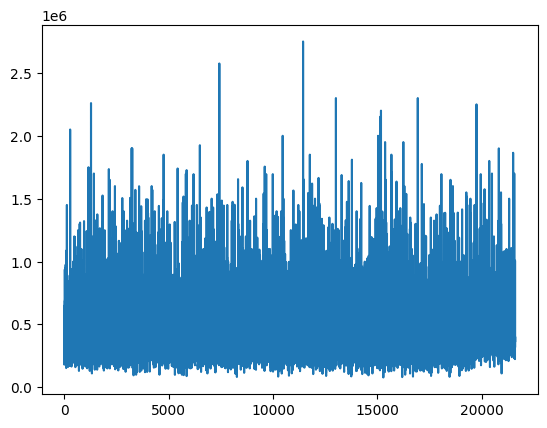

In [1616]:
plt.plot(df["price"])
plt.show()

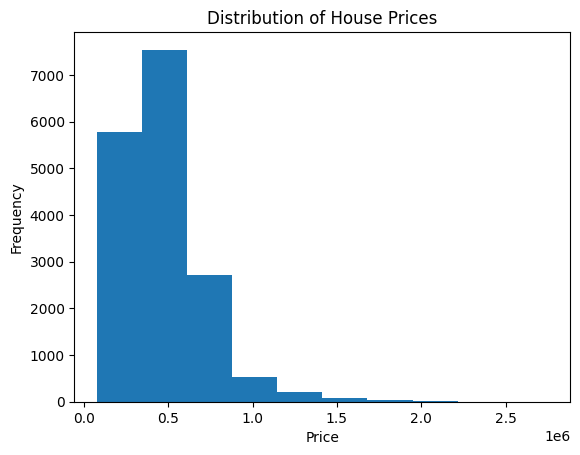

In [1617]:
plt.hist(df["price"])
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of House Prices")
plt.show()

In [1618]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00     7.074117      5650     1.0           0   
1  538000.0         3       2.25     7.852050      7242     2.0           0   
2  180000.0         2       1.00     6.647688     10000     1.0           0   
3  604000.0         4       3.00     7.581210      5000     1.0           0   
4  510000.0         3       2.00     7.427144      8080     1.0           0   

   view  condition  grade  ...  zipcode_98146  zipcode_98148  zipcode_98155  \
0     0          3      7  ...          False          False          False   
1     0          3      7  ...          False          False          False   
2     0          3      6  ...          False          False          False   
3     0          5      7  ...          False          False          False   
4     0          3      8  ...          False          False          False   

   zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
0          False          False          False           True          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   zipcode_98198  zipcode_98199  
0          False          False  
1          False          False  
2          False          False  
3          False          False  
4          False          False  

[5 rows x 90 columns]

In [1619]:
for col in df.columns:
  if col != 'price' :
    correlation = df['price'].corr(df[col])
    print(f"Correlation between price and {col}: {correlation}")

Correlation between price and bedrooms: 0.2414737235104365
Correlation between price and bathrooms: 0.3961530955366642
Correlation between price and sqft_living: 0.5321504782495485
Correlation between price and sqft_lot: -0.060036330007185924
Correlation between price and floors: 0.25291182330028333
Correlation between price and waterfront: 0.1422679795924684
Correlation between price and view: 0.3094490706158271
Correlation between price and condition: 0.0691993556228924
Correlation between price and grade: 0.5898675768355198
Correlation between price and sqft_above: 0.44282583623852484
Correlation between price and sqft_basement: 0.22891828986548332
Correlation between price and yr_built: -0.04777252503677395
Correlation between price and yr_renovated: 0.15040527259144565
Correlation between price and lat: 0.42642188542129394
Correlation between price and long: -0.05149317362661511
Correlation between price and sqft_living15: 0.461261476044974
Correlation between price and sqft_lot15

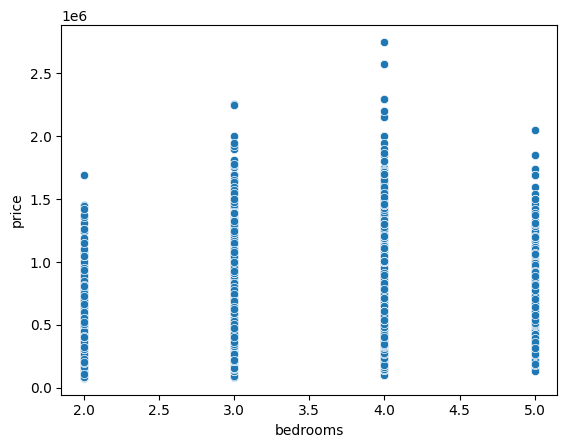

bedrooms
3    8346
4    5075
2    2515
5     946
Name: count, dtype: int64


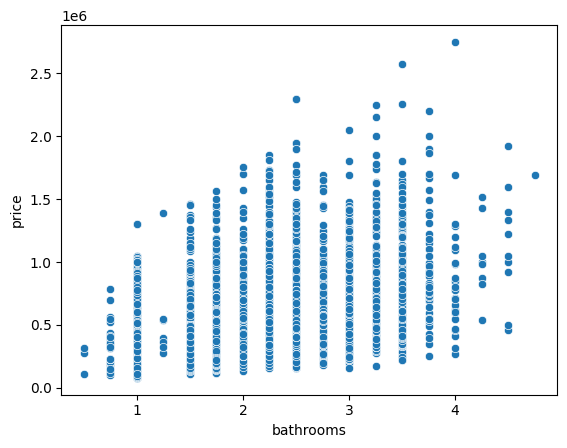

bathrooms
2.50    4249
1.00    3401
1.75    2562
2.00    1657
2.25    1654
1.50    1290
2.75     795
3.00     495
3.50     349
3.25     296
3.75      49
0.75      28
4.00      28
4.50      10
4.25       8
1.25       7
0.50       3
4.75       1
Name: count, dtype: int64


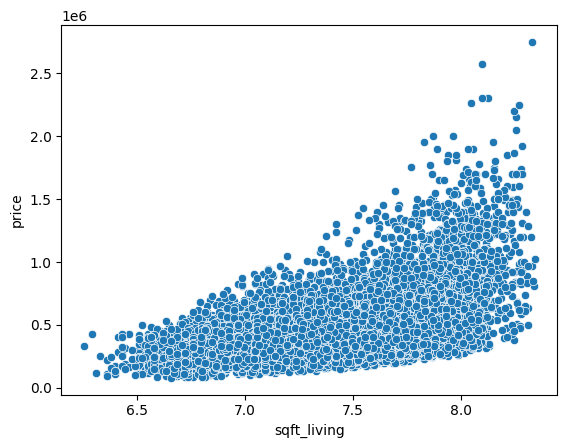

sqft_living
7.244942    125
7.170888    124
7.415175    120
6.918695    119
7.273093    118
           ... 
7.288928      1
7.784889      1
7.805067      1
7.994295      1
7.890957      1
Name: count, Length: 687, dtype: int64


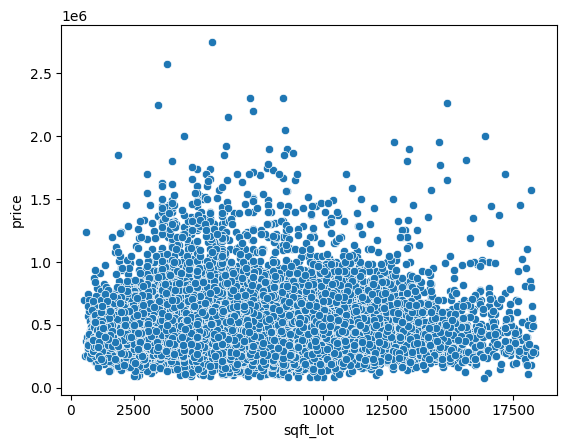

sqft_lot
5000     330
6000     268
4000     242
7200     199
4800     111
        ... 
1079       1
8229       1
6684       1
11036      1
14626      1
Name: count, Length: 6929, dtype: int64


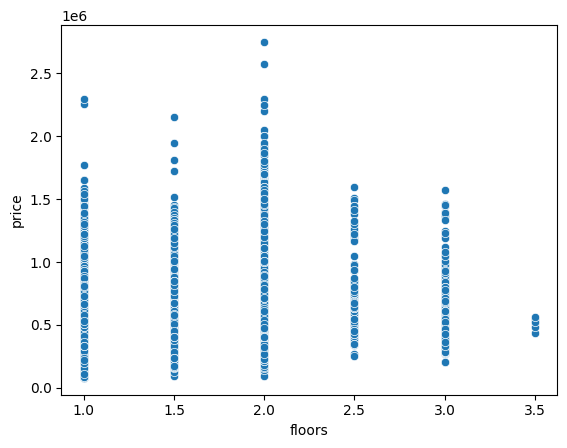

floors
1.0    8658
2.0    5994
1.5    1556
3.0     568
2.5     100
3.5       6
Name: count, dtype: int64


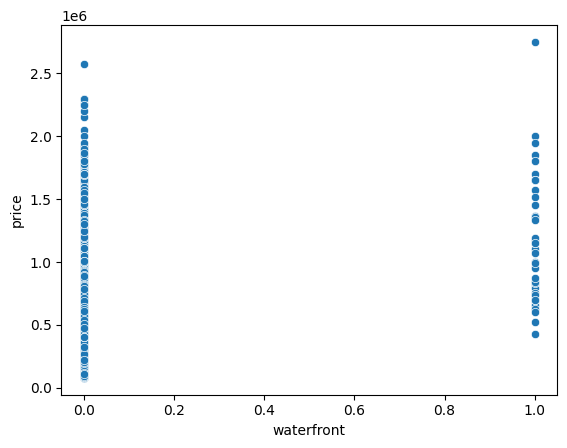

waterfront
0    16845
1       37
Name: count, dtype: int64


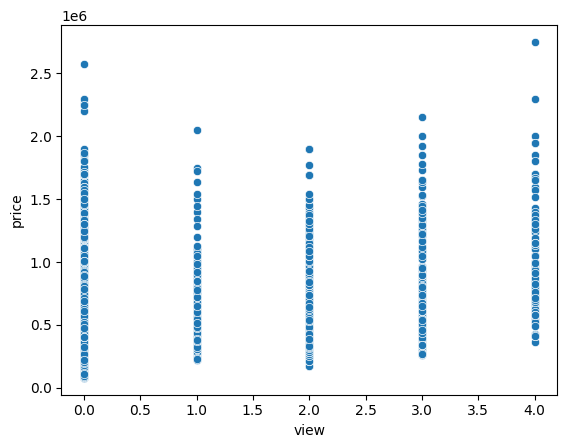

view
0    15735
2      591
3      238
1      217
4      101
Name: count, dtype: int64


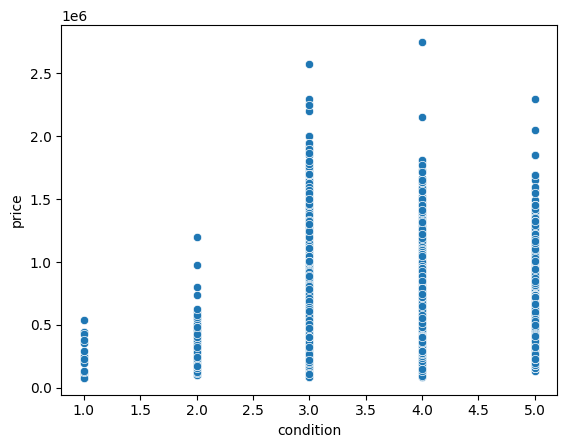

condition
3    10979
4     4390
5     1380
2      117
1       16
Name: count, dtype: int64


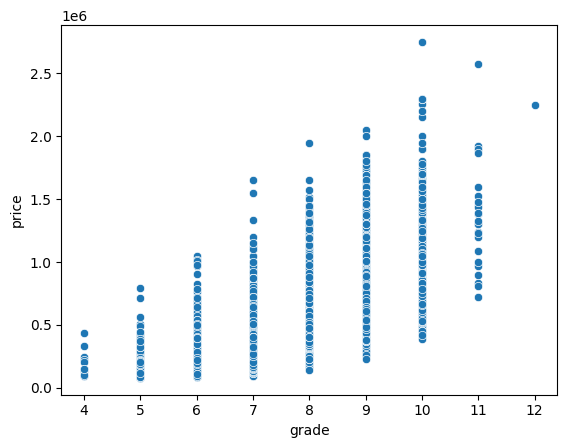

grade
7     7956
8     4961
6     1764
9     1656
10     352
5      158
11      24
4       10
12       1
Name: count, dtype: int64


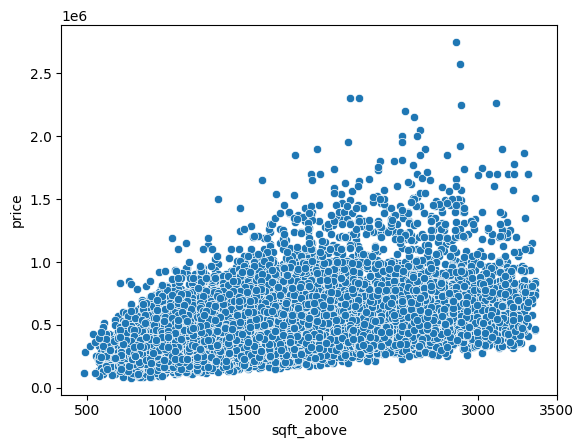

sqft_above
1010    194
1300    188
1200    186
1140    167
1060    165
       ... 
2244      1
1606      1
894       1
2623      1
2587      1
Name: count, Length: 613, dtype: int64


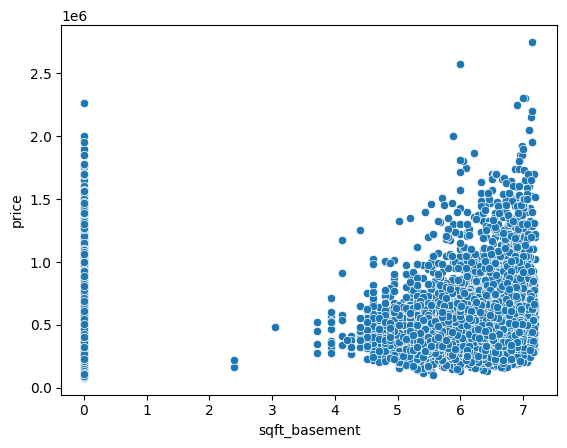

sqft_basement
0.000000    10343
6.216606      192
6.552508      186
6.398595      183
6.685861      169
            ...  
4.969813        1
6.232448        1
3.044522        1
5.616771        1
5.517453        1
Name: count, Length: 166, dtype: int64


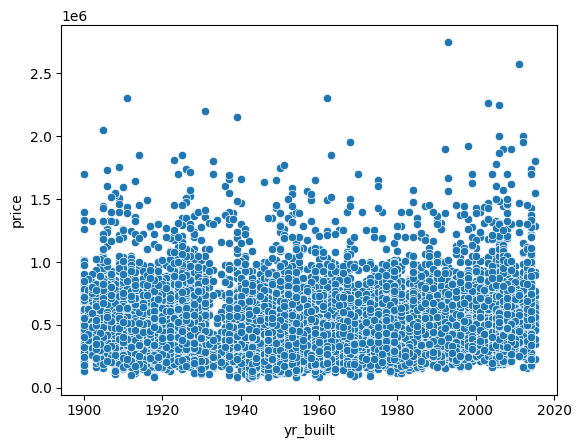

yr_built
2014    442
2005    364
2003    346
2006    346
2004    338
       ... 
1901     26
1902     24
1933     17
1935     14
1934     14
Name: count, Length: 116, dtype: int64


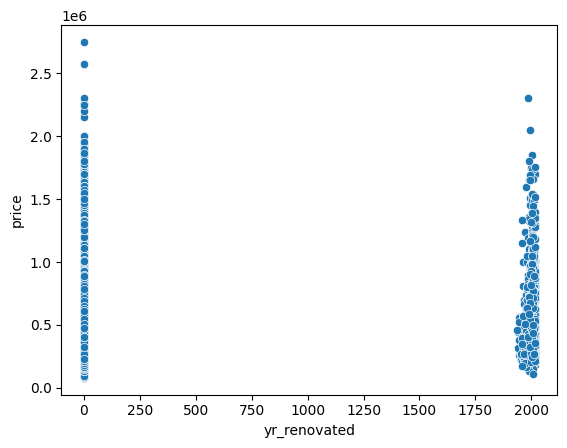

yr_renovated
0       16248
2014       80
2013       28
2005       25
2007       24
        ...  
1946        1
1956        1
1959        1
1934        1
1944        1
Name: count, Length: 68, dtype: int64


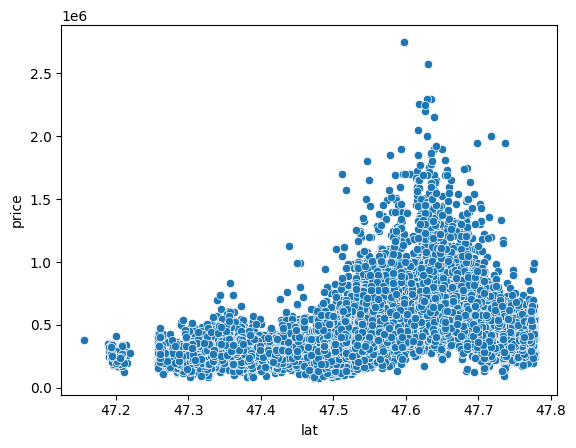

lat
47.5322    17
47.6955    15
47.6904    15
47.6711    15
47.6860    15
           ..
47.4714     1
47.2905     1
47.6580     1
47.6568     1
47.5854     1
Name: count, Length: 4705, dtype: int64


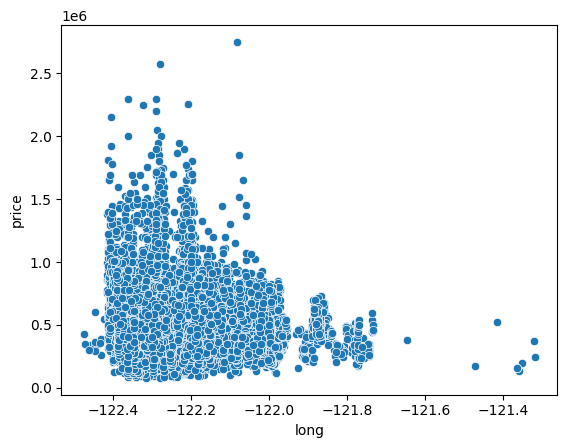

long
-122.300    101
-122.290     97
-122.363     92
-122.357     91
-122.346     90
           ... 
-121.804      1
-121.848      1
-121.828      1
-121.842      1
-121.838      1
Name: count, Length: 598, dtype: int64


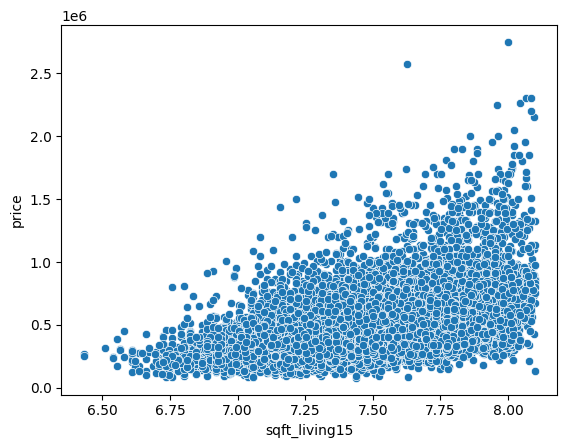

sqft_living15
7.340187    179
7.273093    177
7.313887    172
7.353082    169
7.320527    156
           ... 
7.830823      1
7.787382      1
7.751045      1
7.868254      1
8.082402      1
Name: count, Length: 534, dtype: int64


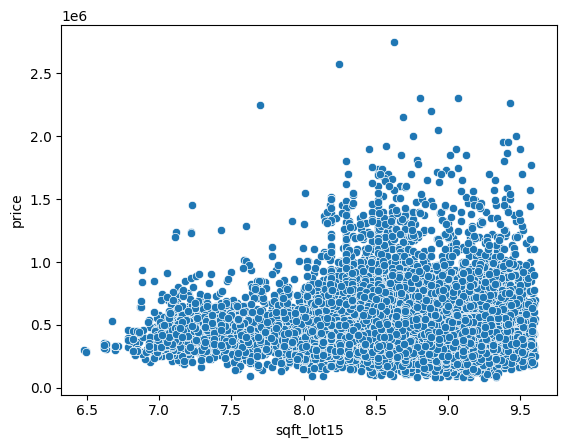

sqft_lot15
8.517393    389
8.294300    345
8.699681    266
8.881975    190
8.476580    136
           ... 
7.319865      1
7.369601      1
7.241366      1
9.548169      1
8.536211      1
Name: count, Length: 6068, dtype: int64


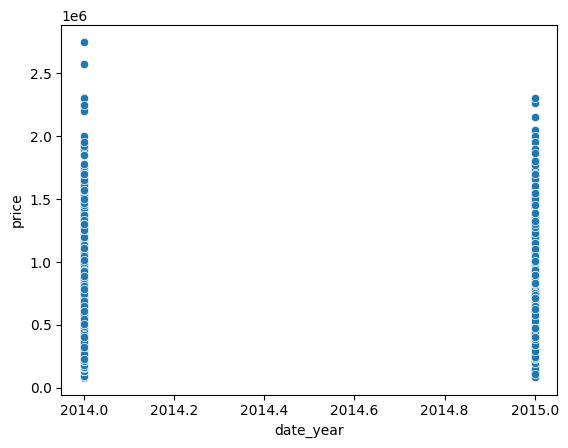

date_year
2014    11372
2015     5510
Name: count, dtype: int64


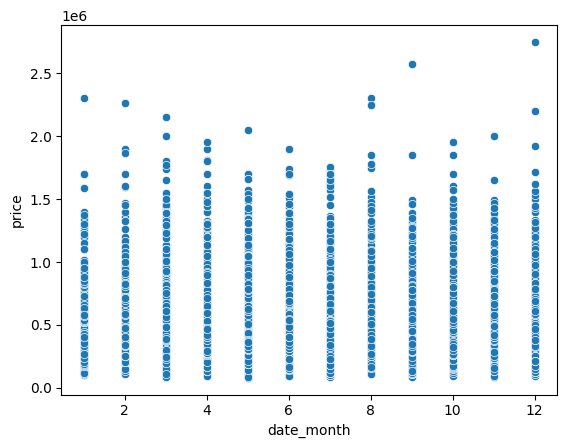

date_month
5     1853
4     1751
7     1727
6     1666
8     1518
3     1499
10    1475
9     1378
12    1148
11    1113
2     1000
1      754
Name: count, dtype: int64


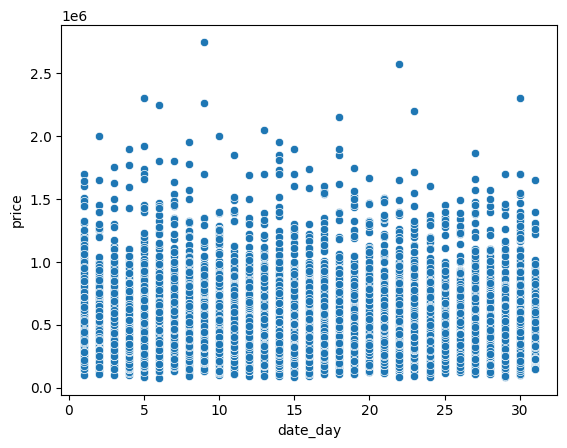

date_day
23    708
5     613
24    609
20    609
16    607
9     606
22    603
18    588
27    588
25    587
17    583
2     577
8     572
10    571
12    568
6     565
13    561
3     543
11    531
4     530
26    526
21    522
14    512
19    507
7     506
29    500
15    488
28    483
30    481
1     441
31    197
Name: count, dtype: int64


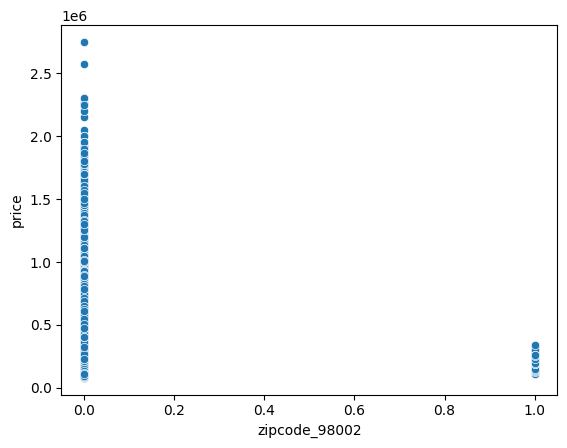

zipcode_98002
False    16698
True       184
Name: count, dtype: int64


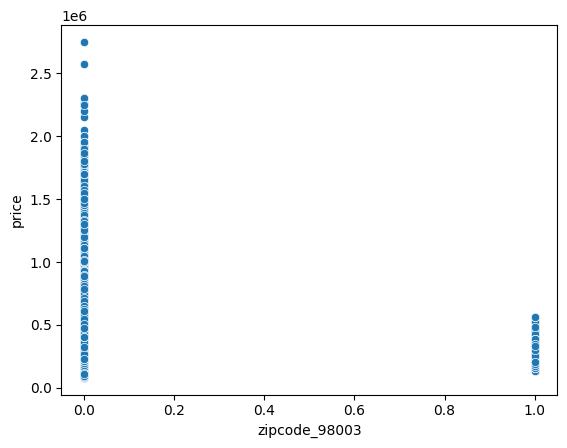

zipcode_98003
False    16637
True       245
Name: count, dtype: int64


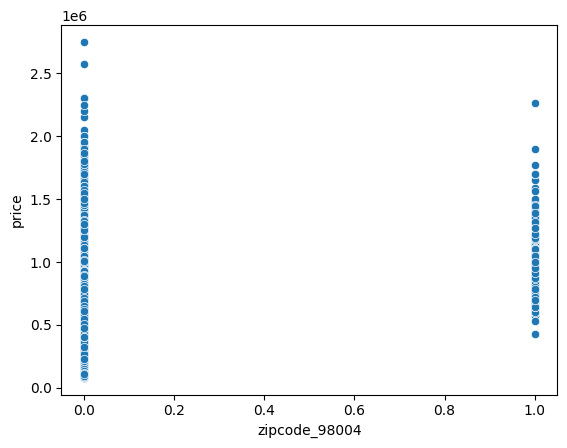

zipcode_98004
False    16725
True       157
Name: count, dtype: int64


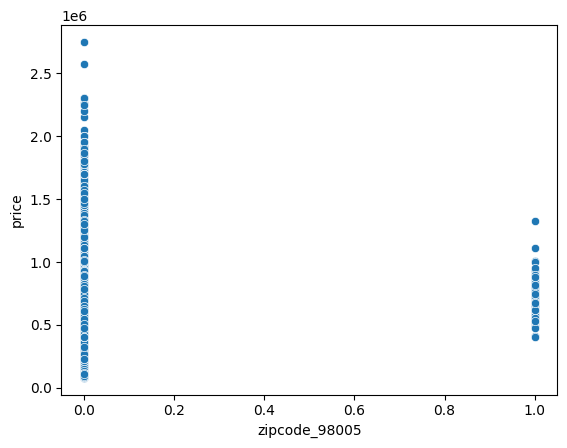

zipcode_98005
False    16789
True        93
Name: count, dtype: int64


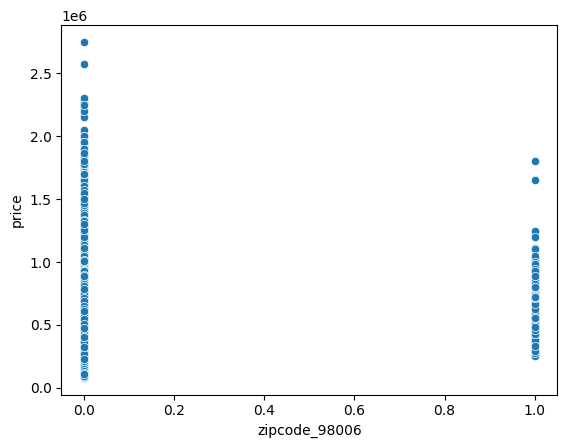

zipcode_98006
False    16588
True       294
Name: count, dtype: int64


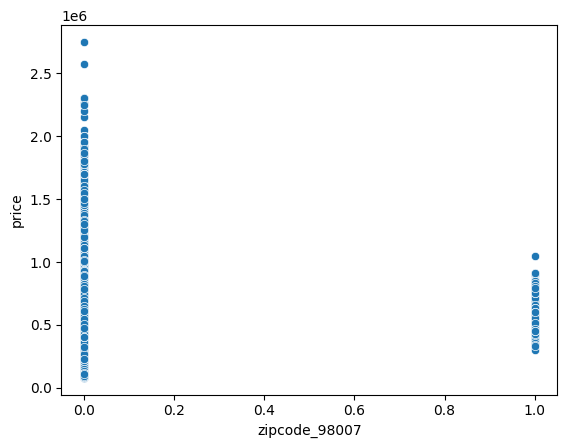

zipcode_98007
False    16765
True       117
Name: count, dtype: int64


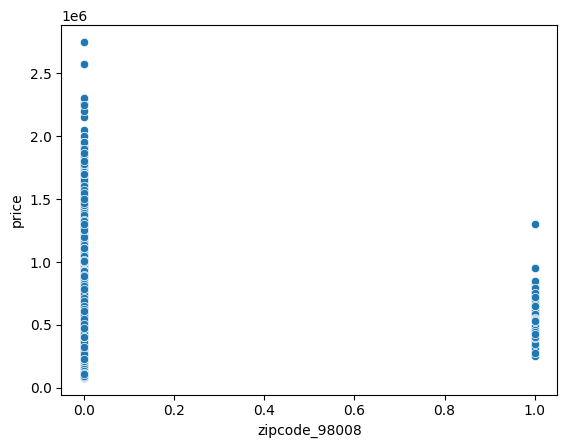

zipcode_98008
False    16645
True       237
Name: count, dtype: int64


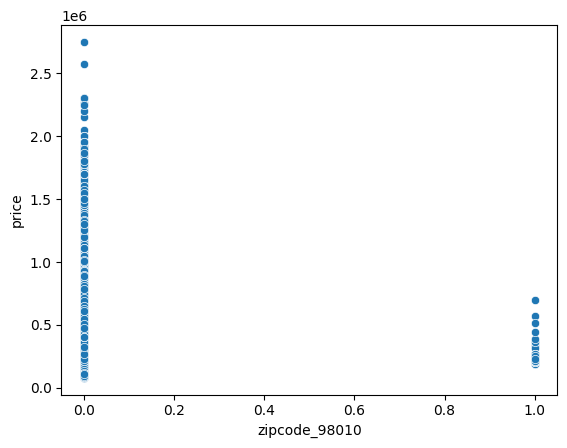

zipcode_98010
False    16843
True        39
Name: count, dtype: int64


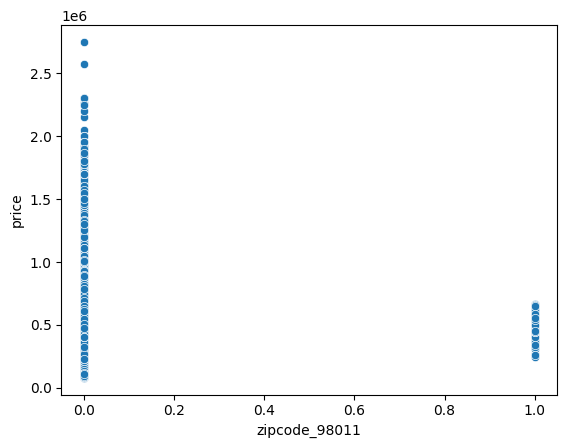

zipcode_98011
False    16719
True       163
Name: count, dtype: int64


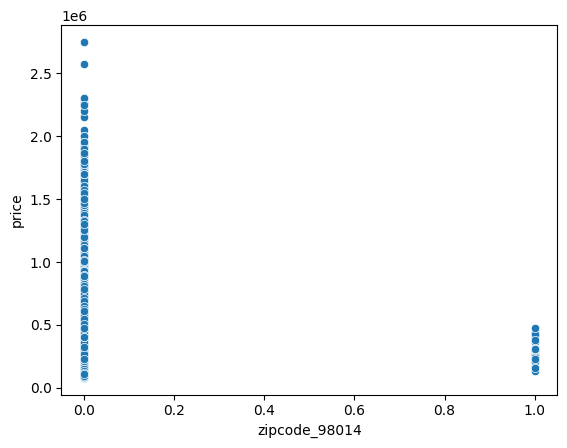

zipcode_98014
False    16860
True        22
Name: count, dtype: int64


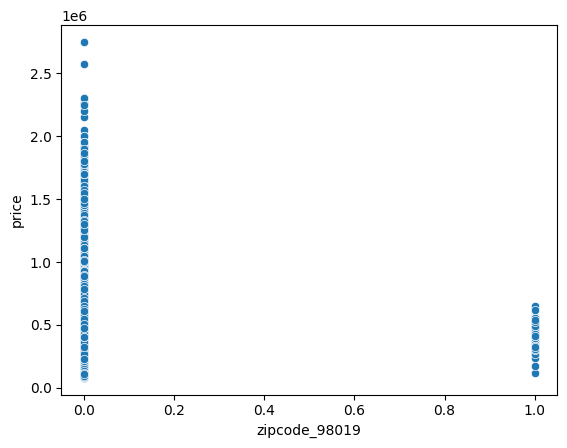

zipcode_98019
False    16753
True       129
Name: count, dtype: int64


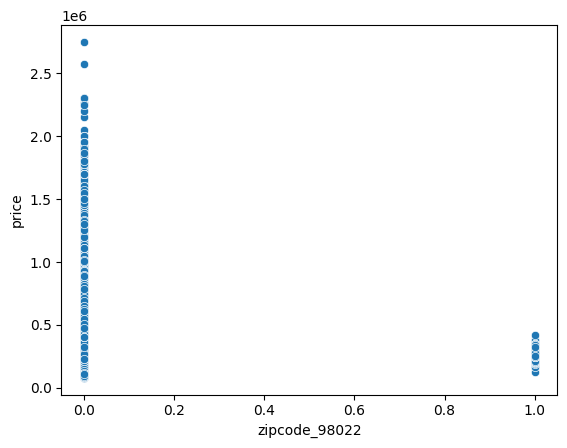

zipcode_98022
False    16742
True       140
Name: count, dtype: int64


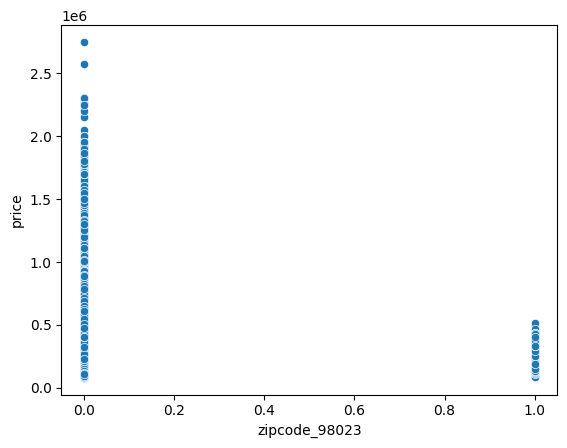

zipcode_98023
False    16455
True       427
Name: count, dtype: int64


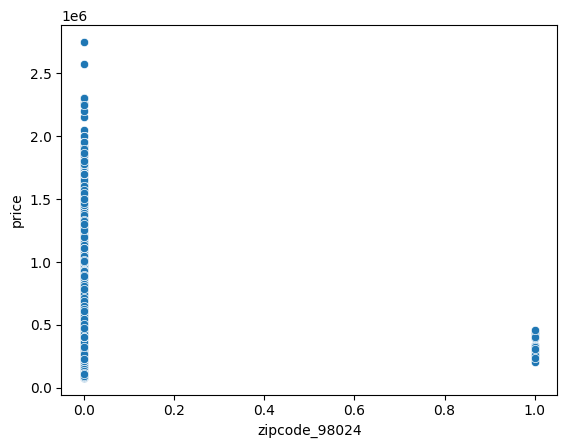

zipcode_98024
False    16862
True        20
Name: count, dtype: int64


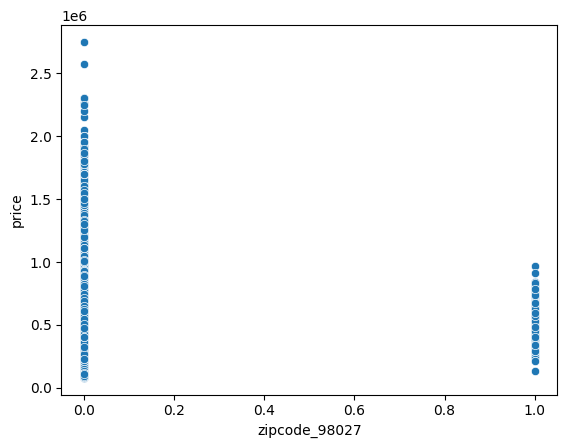

zipcode_98027
False    16667
True       215
Name: count, dtype: int64


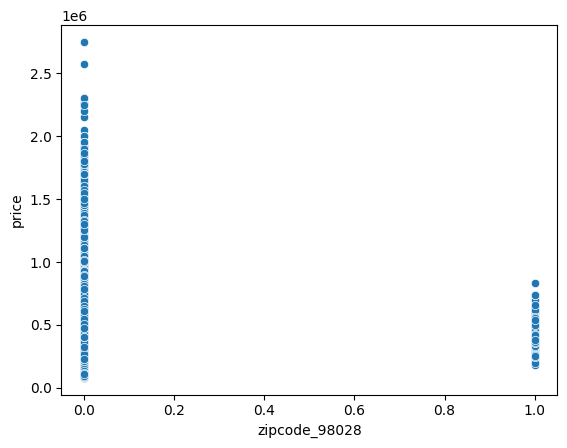

zipcode_98028
False    16650
True       232
Name: count, dtype: int64


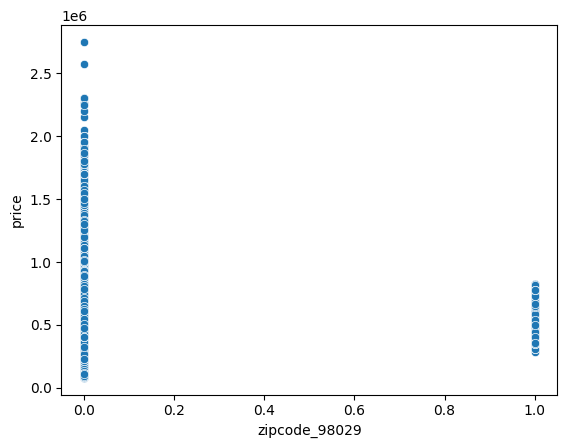

zipcode_98029
False    16602
True       280
Name: count, dtype: int64


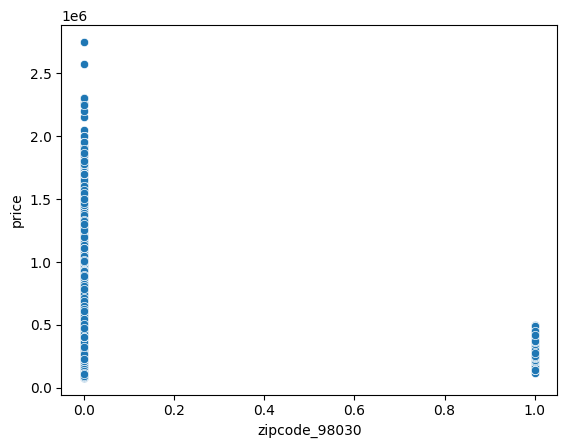

zipcode_98030
False    16647
True       235
Name: count, dtype: int64


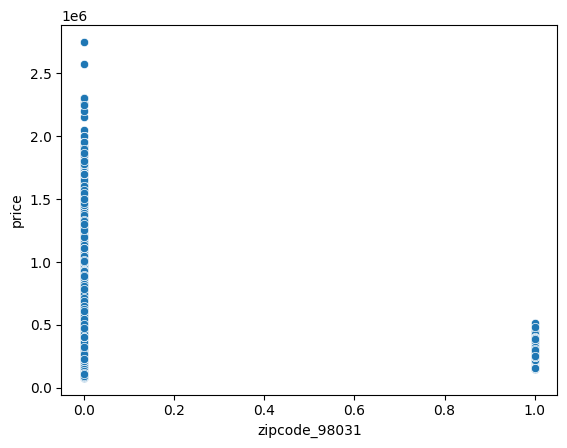

zipcode_98031
False    16637
True       245
Name: count, dtype: int64


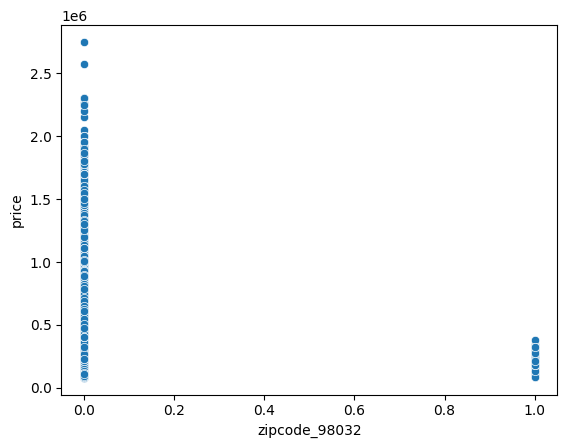

zipcode_98032
False    16775
True       107
Name: count, dtype: int64


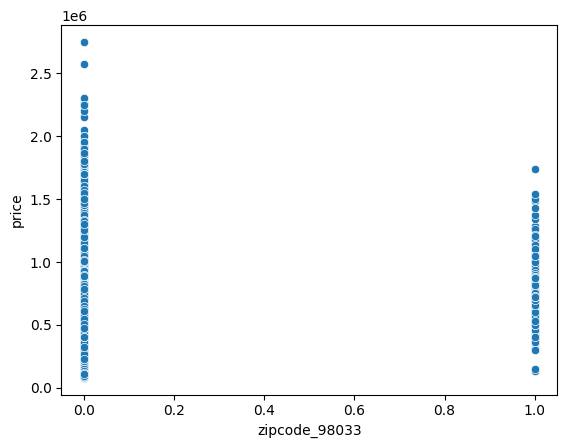

zipcode_98033
False    16551
True       331
Name: count, dtype: int64


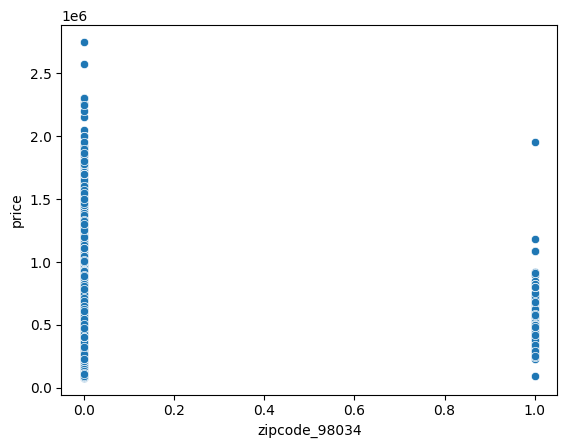

zipcode_98034
False    16405
True       477
Name: count, dtype: int64


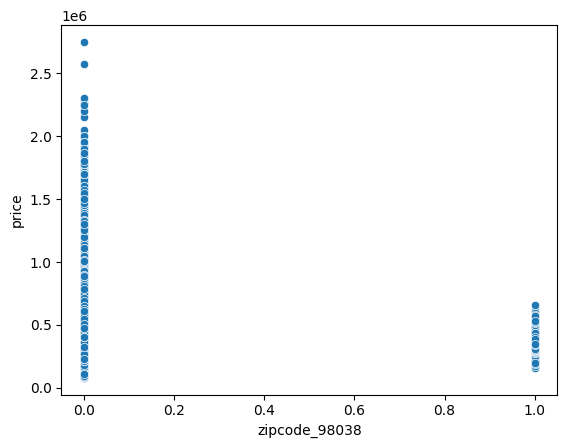

zipcode_98038
False    16419
True       463
Name: count, dtype: int64


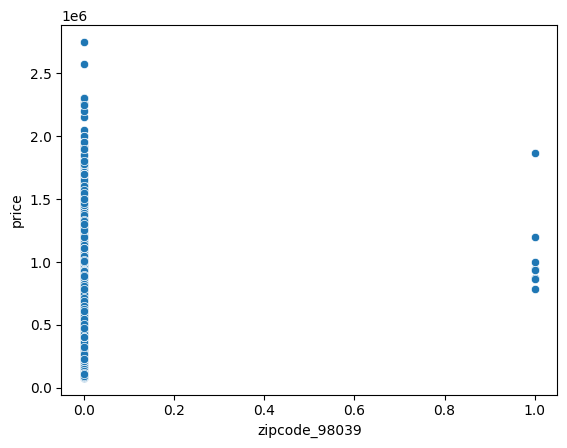

zipcode_98039
False    16874
True         8
Name: count, dtype: int64


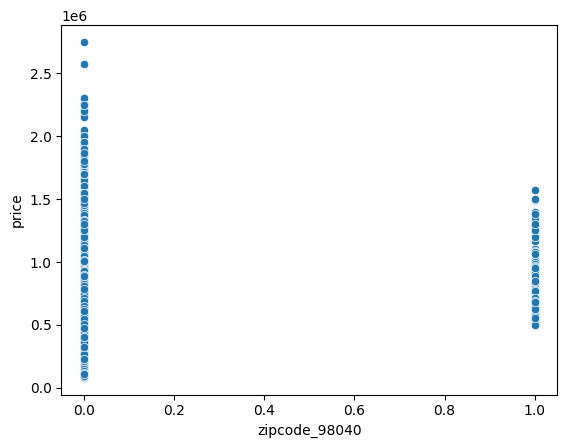

zipcode_98040
False    16752
True       130
Name: count, dtype: int64


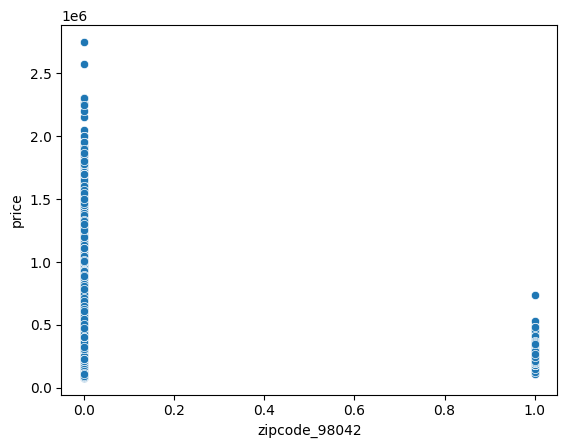

zipcode_98042
False    16463
True       419
Name: count, dtype: int64


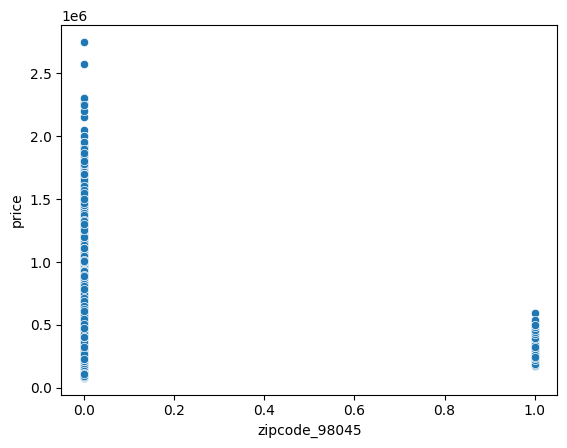

zipcode_98045
False    16761
True       121
Name: count, dtype: int64


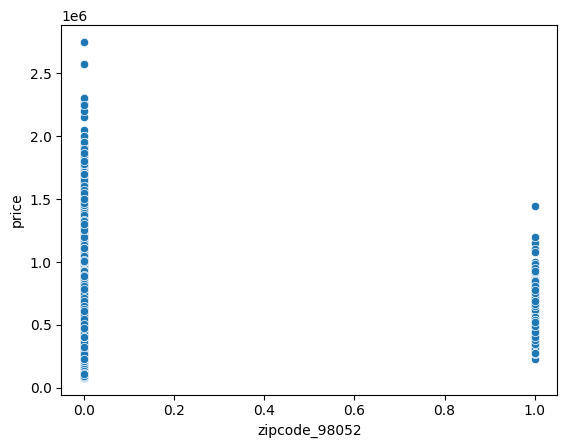

zipcode_98052
False    16422
True       460
Name: count, dtype: int64


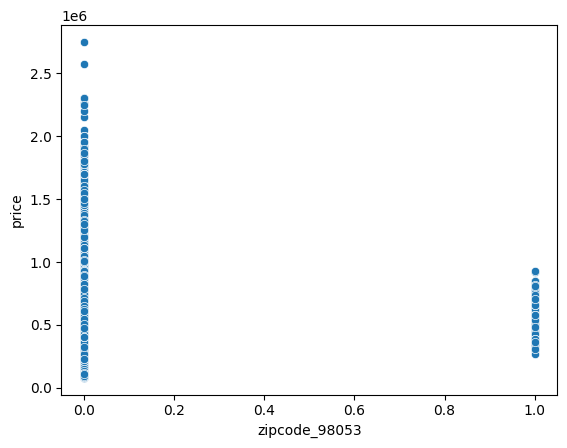

zipcode_98053
False    16684
True       198
Name: count, dtype: int64


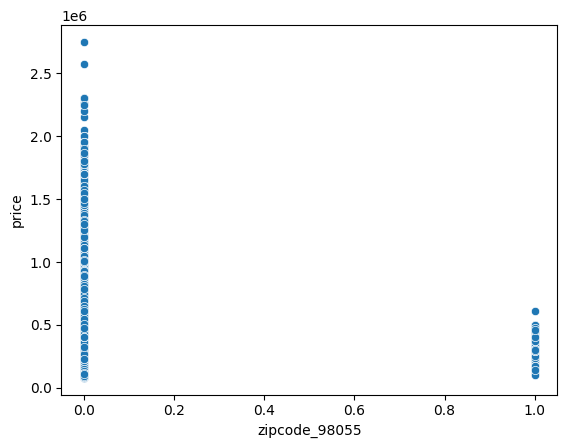

zipcode_98055
False    16650
True       232
Name: count, dtype: int64


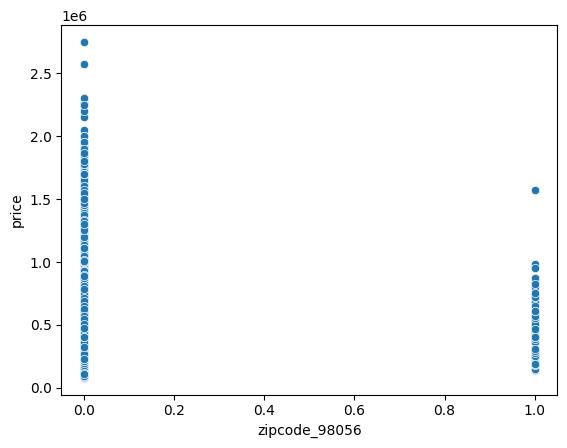

zipcode_98056
False    16525
True       357
Name: count, dtype: int64


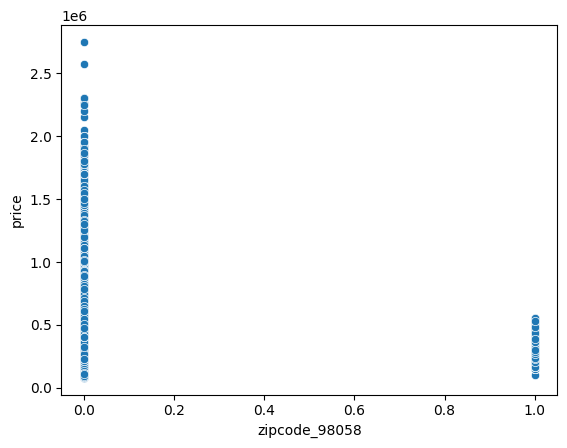

zipcode_98058
False    16521
True       361
Name: count, dtype: int64


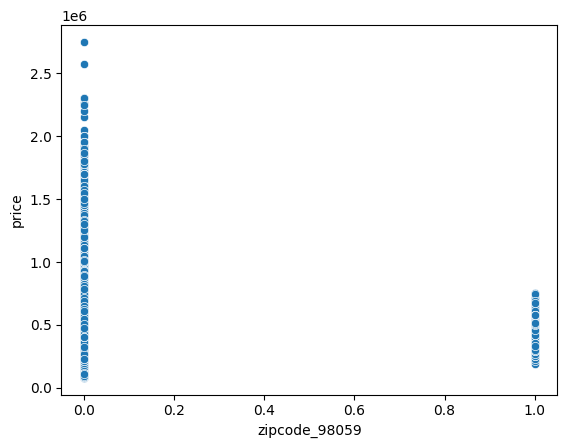

zipcode_98059
False    16555
True       327
Name: count, dtype: int64


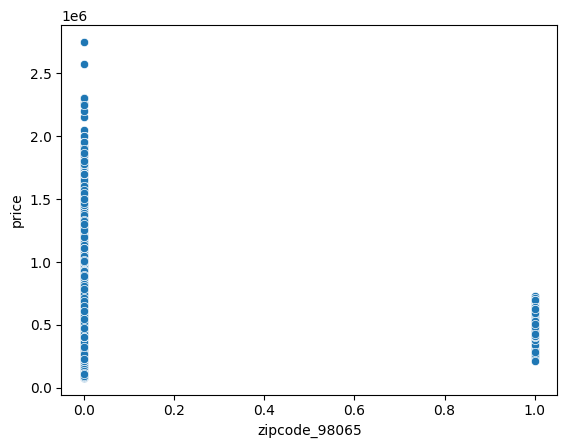

zipcode_98065
False    16650
True       232
Name: count, dtype: int64


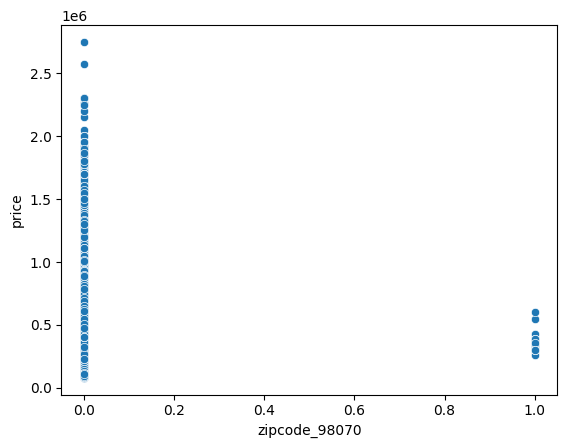

zipcode_98070
False    16868
True        14
Name: count, dtype: int64


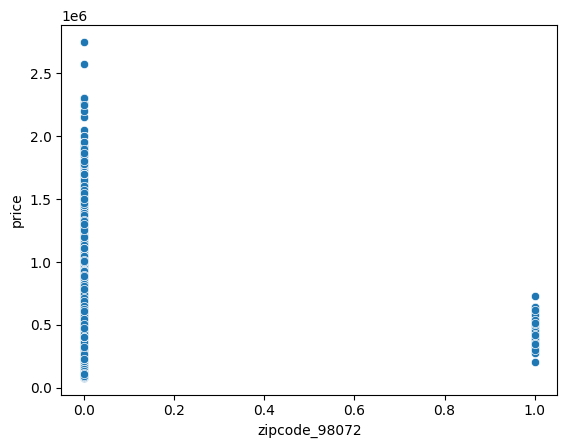

zipcode_98072
False    16760
True       122
Name: count, dtype: int64


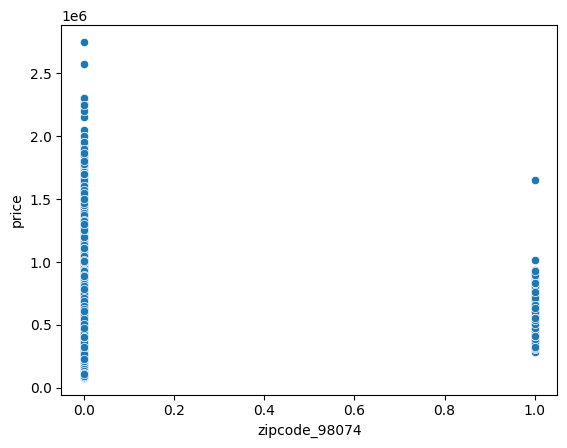

zipcode_98074
False    16589
True       293
Name: count, dtype: int64


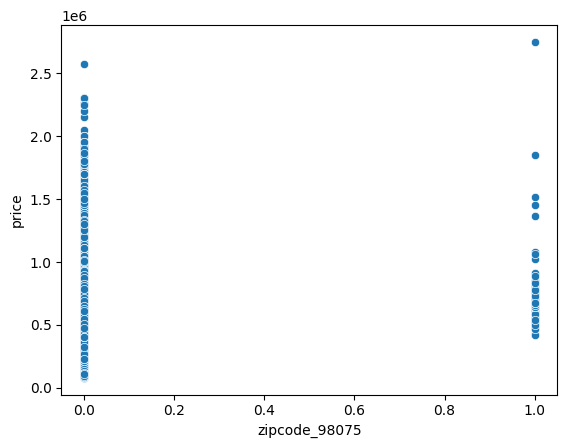

zipcode_98075
False    16742
True       140
Name: count, dtype: int64


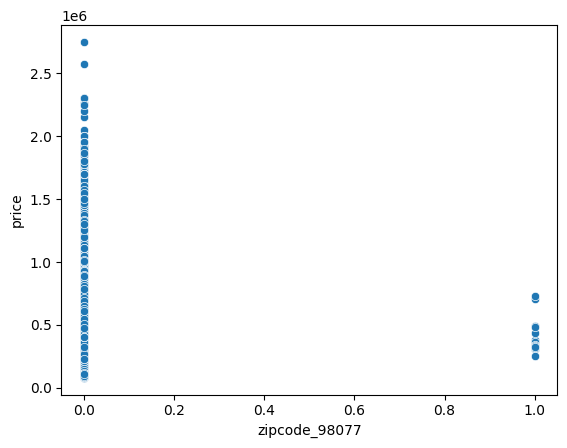

zipcode_98077
False    16856
True        26
Name: count, dtype: int64


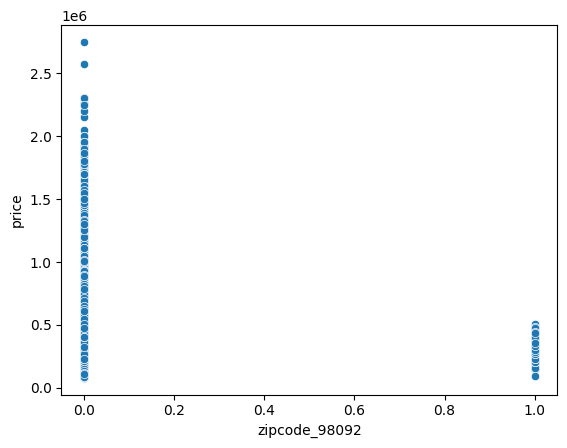

zipcode_98092
False    16639
True       243
Name: count, dtype: int64


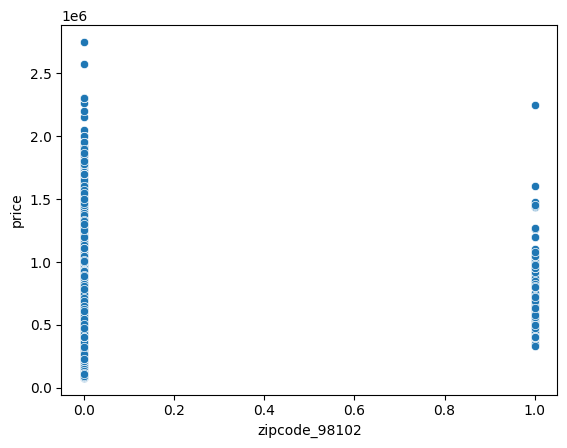

zipcode_98102
False    16788
True        94
Name: count, dtype: int64


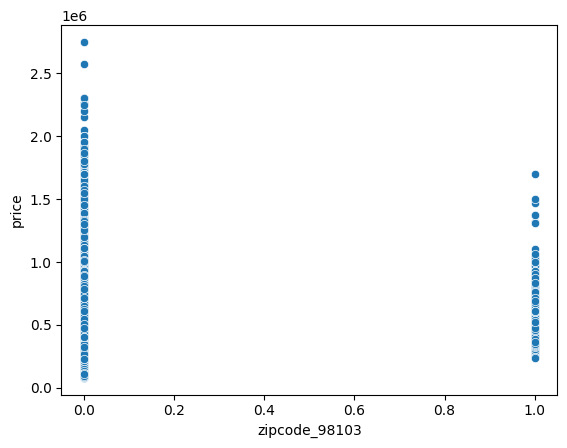

zipcode_98103
False    16311
True       571
Name: count, dtype: int64


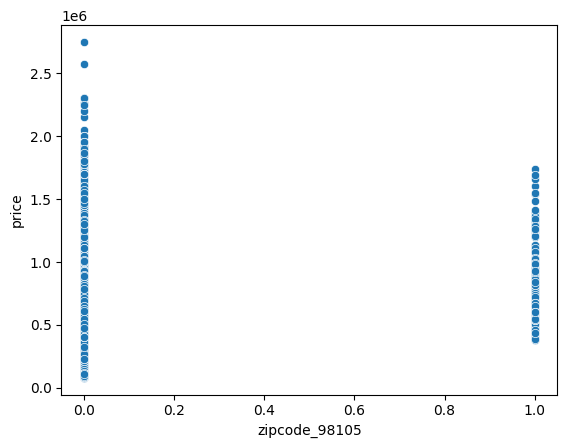

zipcode_98105
False    16687
True       195
Name: count, dtype: int64


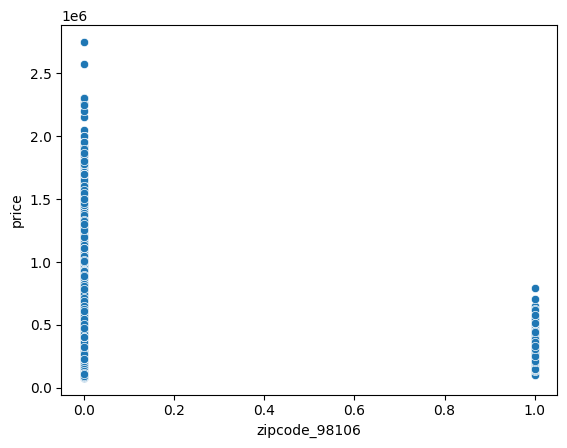

zipcode_98106
False    16571
True       311
Name: count, dtype: int64


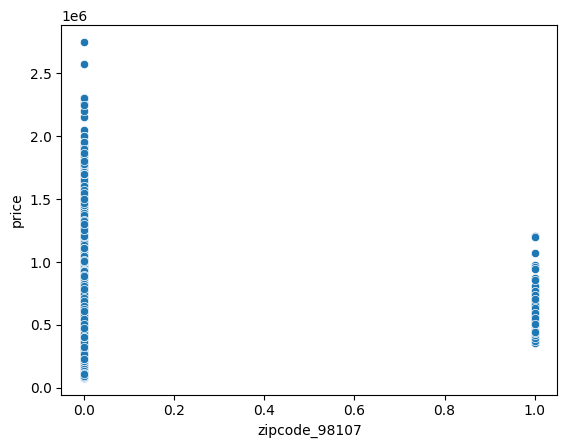

zipcode_98107
False    16627
True       255
Name: count, dtype: int64


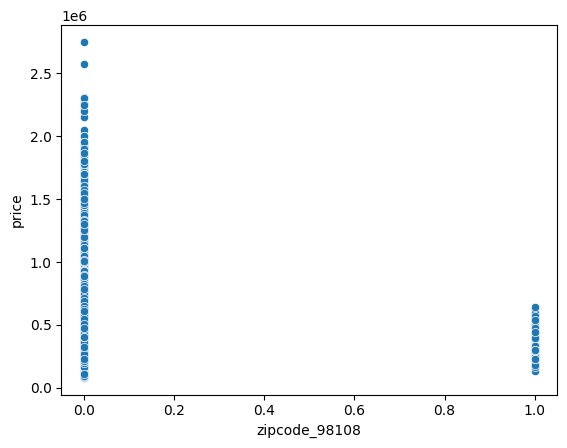

zipcode_98108
False    16710
True       172
Name: count, dtype: int64


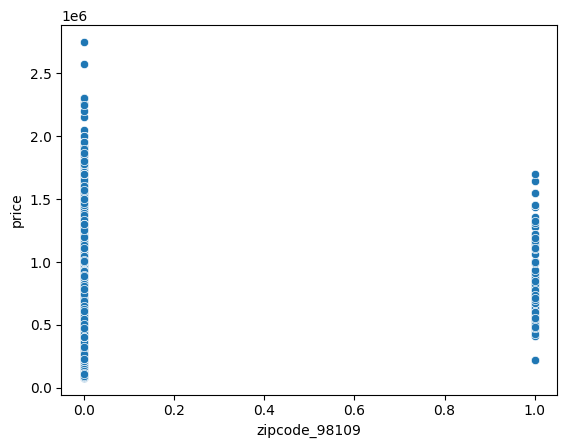

zipcode_98109
False    16782
True       100
Name: count, dtype: int64


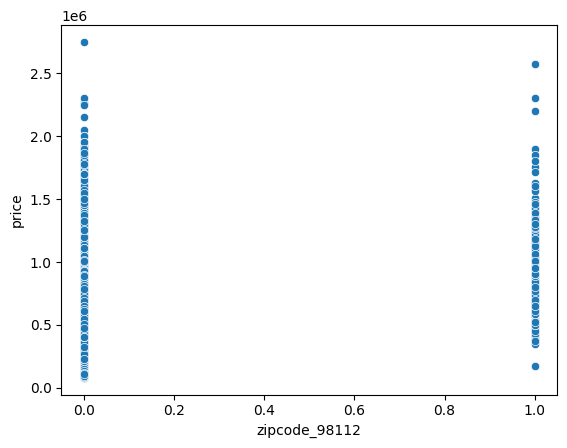

zipcode_98112
False    16668
True       214
Name: count, dtype: int64


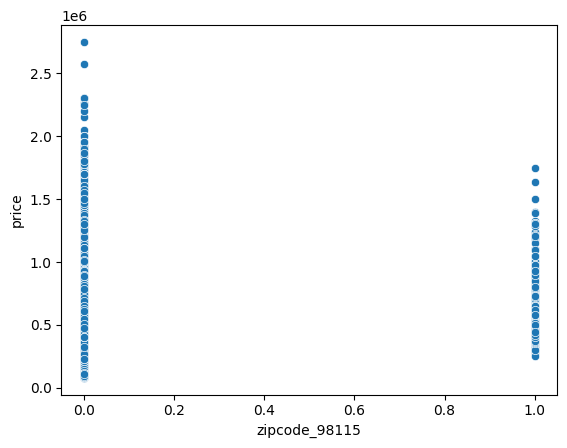

zipcode_98115
False    16327
True       555
Name: count, dtype: int64


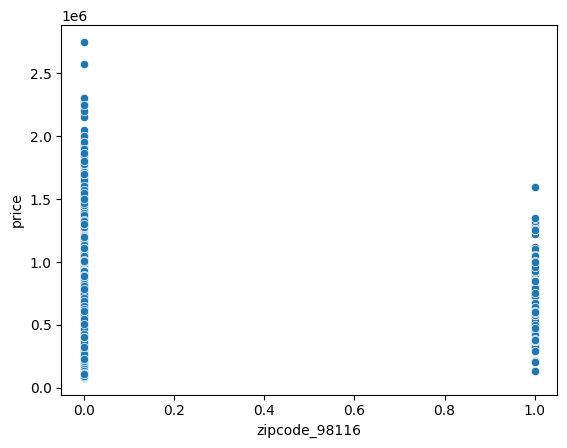

zipcode_98116
False    16571
True       311
Name: count, dtype: int64


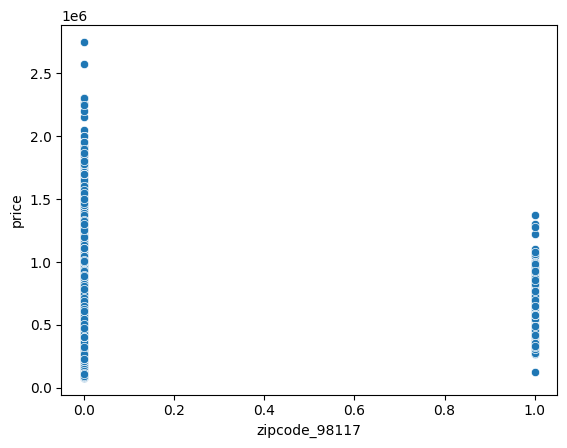

zipcode_98117
False    16364
True       518
Name: count, dtype: int64


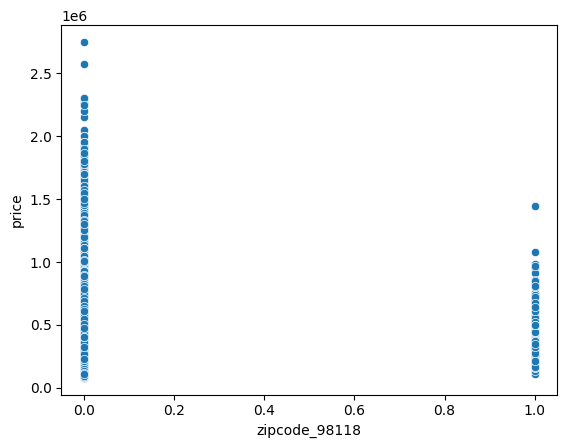

zipcode_98118
False    16416
True       466
Name: count, dtype: int64


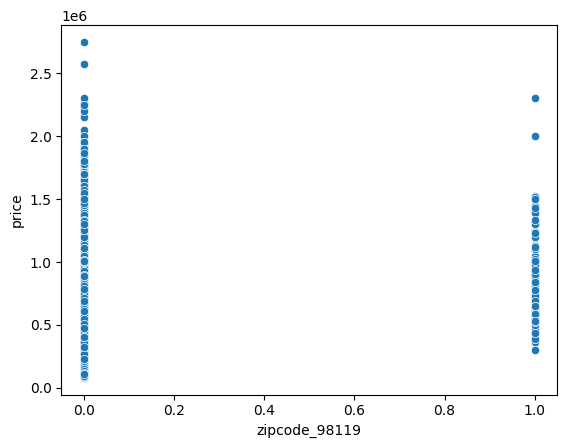

zipcode_98119
False    16711
True       171
Name: count, dtype: int64


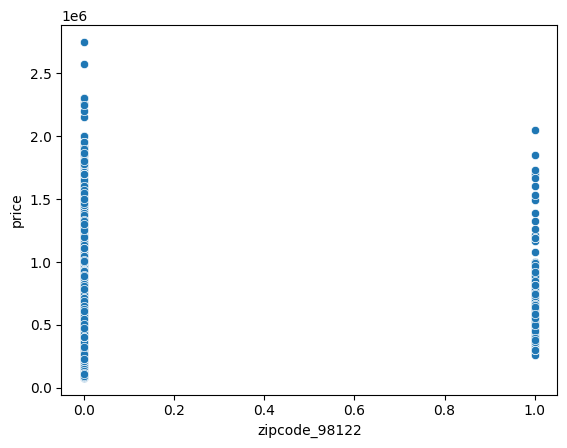

zipcode_98122
False    16612
True       270
Name: count, dtype: int64


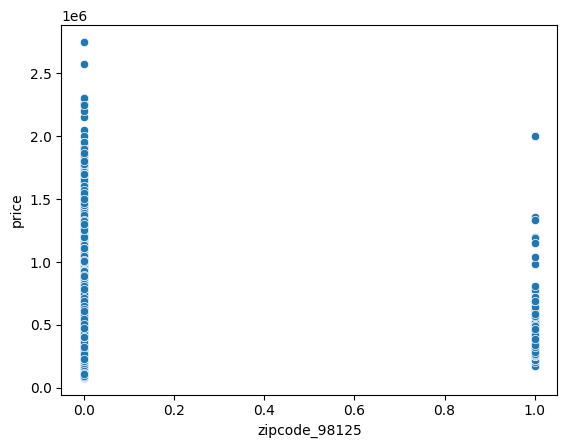

zipcode_98125
False    16507
True       375
Name: count, dtype: int64


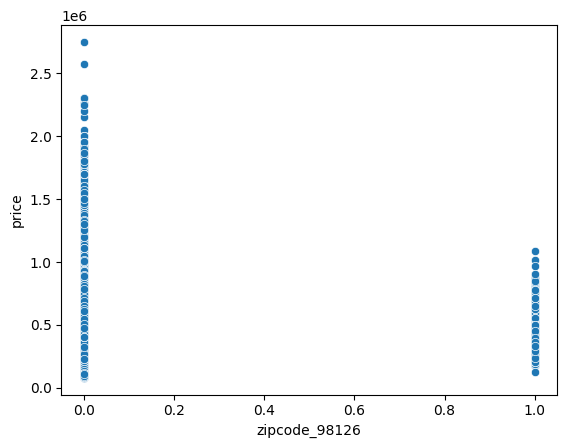

zipcode_98126
False    16547
True       335
Name: count, dtype: int64


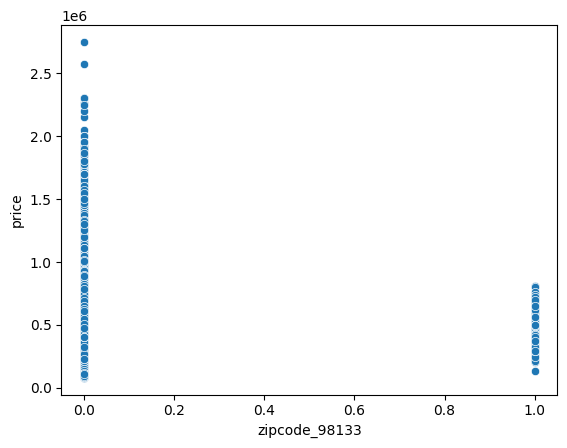

zipcode_98133
False    16408
True       474
Name: count, dtype: int64


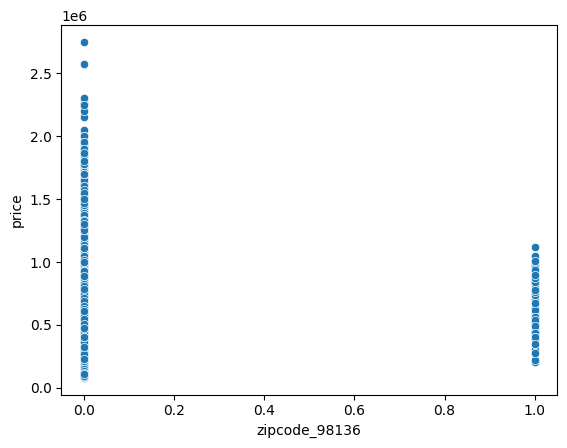

zipcode_98136
False    16641
True       241
Name: count, dtype: int64


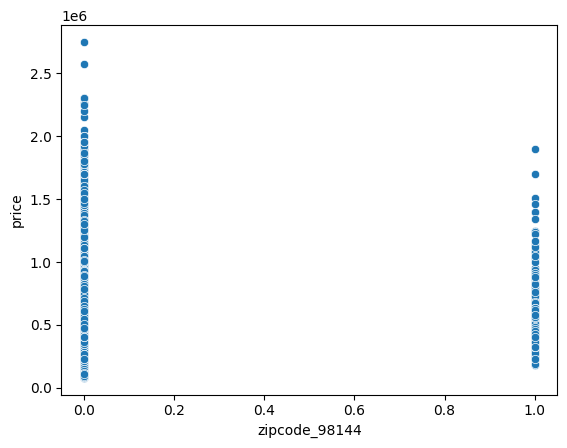

zipcode_98144
False    16573
True       309
Name: count, dtype: int64


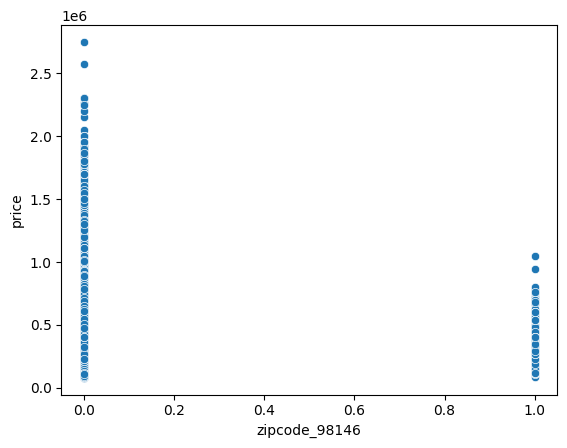

zipcode_98146
False    16627
True       255
Name: count, dtype: int64


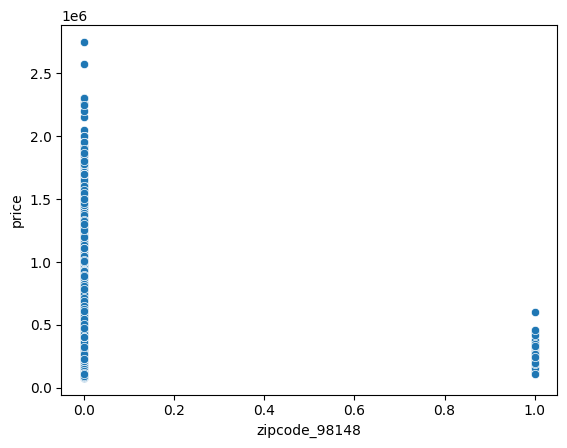

zipcode_98148
False    16827
True        55
Name: count, dtype: int64


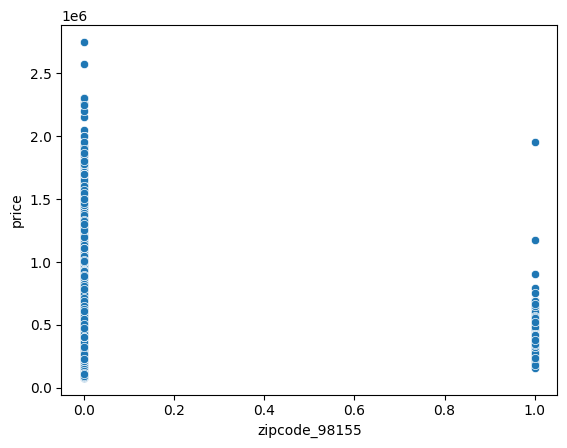

zipcode_98155
False    16499
True       383
Name: count, dtype: int64


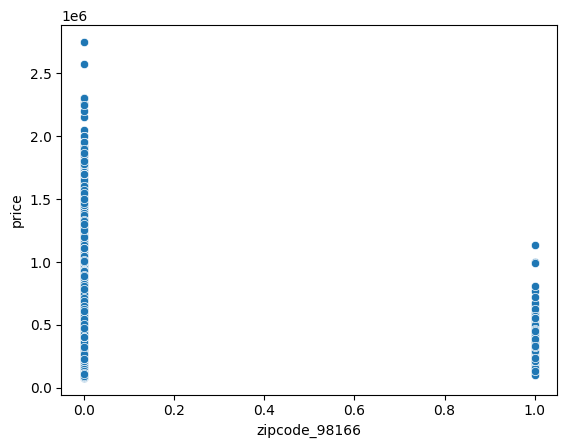

zipcode_98166
False    16715
True       167
Name: count, dtype: int64


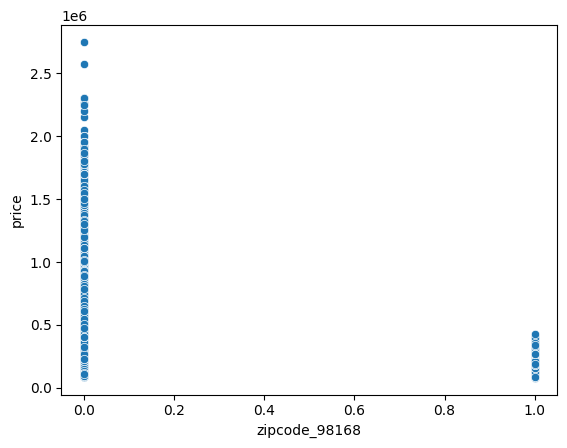

zipcode_98168
False    16660
True       222
Name: count, dtype: int64


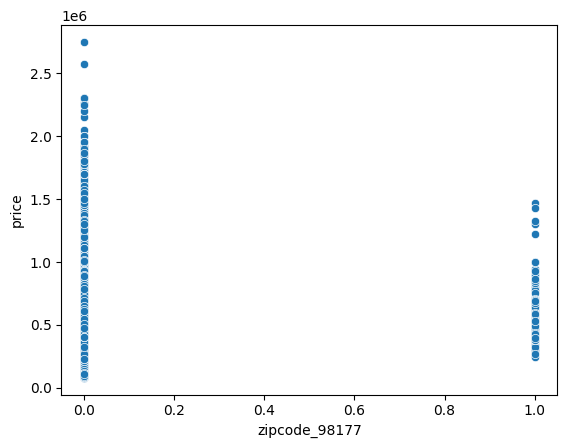

zipcode_98177
False    16695
True       187
Name: count, dtype: int64


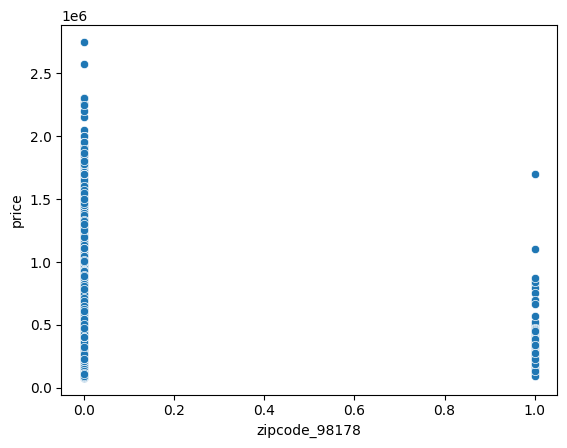

zipcode_98178
False    16640
True       242
Name: count, dtype: int64


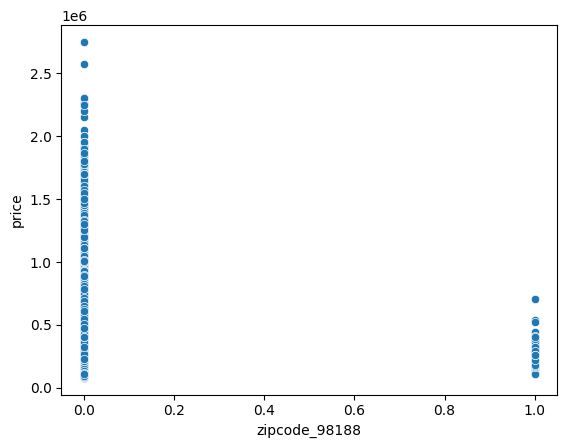

zipcode_98188
False    16762
True       120
Name: count, dtype: int64


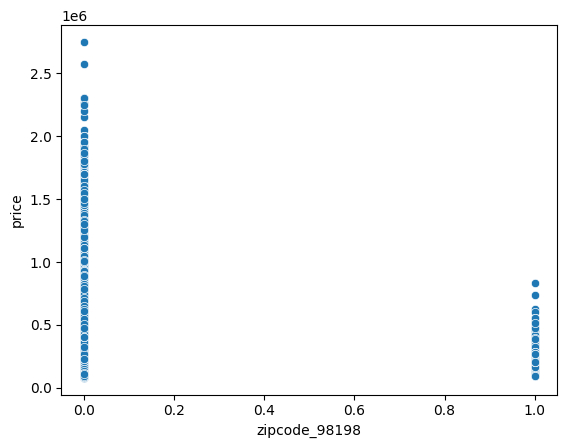

zipcode_98198
False    16646
True       236
Name: count, dtype: int64


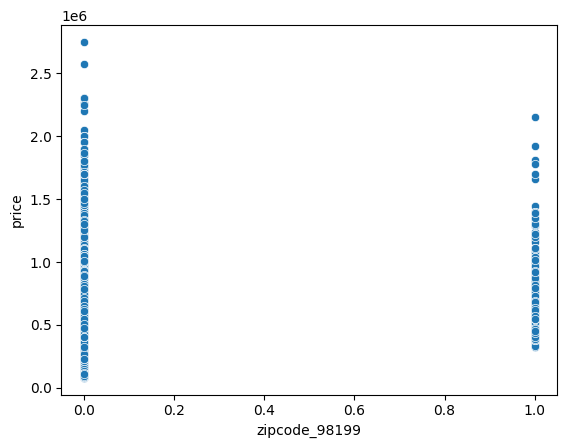

zipcode_98199
False    16605
True       277
Name: count, dtype: int64


In [1620]:
for col in df.columns:
  if col != 'price' :
    sns.scatterplot(x=col, y='price', data=df)
    plt.show()
    print(df[col].value_counts())

In [1621]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00     7.074117      5650     1.0           0   
1  538000.0         3       2.25     7.852050      7242     2.0           0   
2  180000.0         2       1.00     6.647688     10000     1.0           0   
3  604000.0         4       3.00     7.581210      5000     1.0           0   
4  510000.0         3       2.00     7.427144      8080     1.0           0   

   view  condition  grade  ...  zipcode_98146  zipcode_98148  zipcode_98155  \
0     0          3      7  ...          False          False          False   
1     0          3      7  ...          False          False          False   
2     0          3      6  ...          False          False          False   
3     0          5      7  ...          False          False          False   
4     0          3      8  ...          False          False          False   

   zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
0          False          False          False           True          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   zipcode_98198  zipcode_98199  
0          False          False  
1          False          False  
2          False          False  
3          False          False  
4          False          False  

[5 rows x 90 columns]

In [1622]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00     7.074117      5650     1.0           0   
1  538000.0         3       2.25     7.852050      7242     2.0           0   
2  180000.0         2       1.00     6.647688     10000     1.0           0   
3  604000.0         4       3.00     7.581210      5000     1.0           0   
4  510000.0         3       2.00     7.427144      8080     1.0           0   

   view  condition  grade  ...  zipcode_98146  zipcode_98148  zipcode_98155  \
0     0          3      7  ...          False          False          False   
1     0          3      7  ...          False          False          False   
2     0          3      6  ...          False          False          False   
3     0          5      7  ...          False          False          False   
4     0          3      8  ...          False          False          False   

   zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
0          False          False          False           True          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   zipcode_98198  zipcode_98199  
0          False          False  
1          False          False  
2          False          False  
3          False          False  
4          False          False  

[5 rows x 90 columns]

In [1623]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00     7.074117      5650     1.0           0   
1  538000.0         3       2.25     7.852050      7242     2.0           0   
2  180000.0         2       1.00     6.647688     10000     1.0           0   
3  604000.0         4       3.00     7.581210      5000     1.0           0   
4  510000.0         3       2.00     7.427144      8080     1.0           0   

   view  condition  grade  ...  zipcode_98146  zipcode_98148  zipcode_98155  \
0     0          3      7  ...          False          False          False   
1     0          3      7  ...          False          False          False   
2     0          3      6  ...          False          False          False   
3     0          5      7  ...          False          False          False   
4     0          3      8  ...          False          False          False   

   zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
0          False          False          False           True          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   zipcode_98198  zipcode_98199  
0          False          False  
1          False          False  
2          False          False  
3          False          False  
4          False          False  

[5 rows x 90 columns]

In [1624]:
for col in df.columns:
  if col != 'price' :
    correlation = df['price'].corr(df[col])
    print(f"Correlation between price and {col}: {correlation}")

Correlation between price and bedrooms: 0.2414737235104365
Correlation between price and bathrooms: 0.3961530955366642
Correlation between price and sqft_living: 0.5321504782495485
Correlation between price and sqft_lot: -0.060036330007185924
Correlation between price and floors: 0.25291182330028333
Correlation between price and waterfront: 0.1422679795924684
Correlation between price and view: 0.3094490706158271
Correlation between price and condition: 0.0691993556228924
Correlation between price and grade: 0.5898675768355198
Correlation between price and sqft_above: 0.44282583623852484
Correlation between price and sqft_basement: 0.22891828986548332
Correlation between price and yr_built: -0.04777252503677395
Correlation between price and yr_renovated: 0.15040527259144565
Correlation between price and lat: 0.42642188542129394
Correlation between price and long: -0.05149317362661511
Correlation between price and sqft_living15: 0.461261476044974
Correlation between price and sqft_lot15

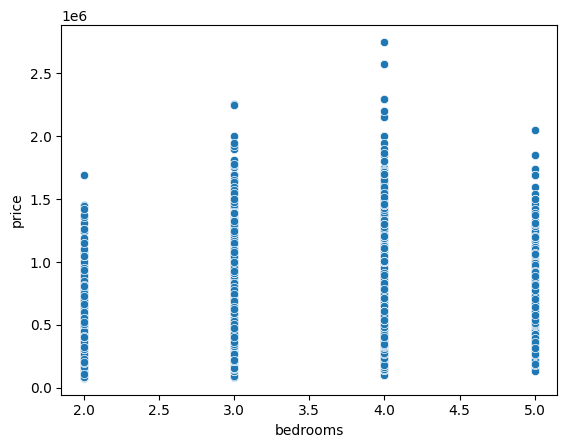

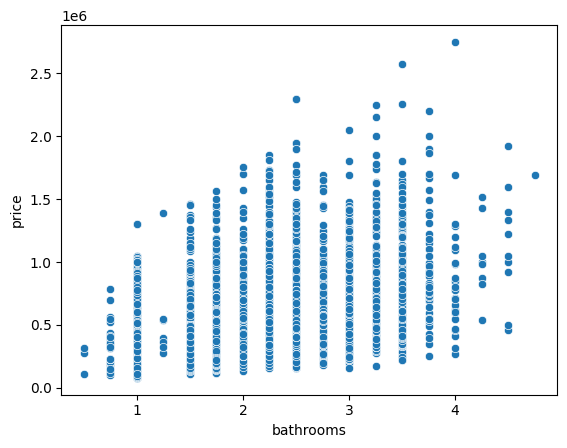

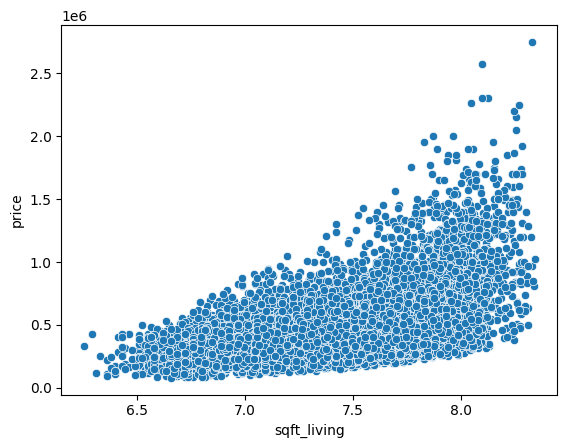

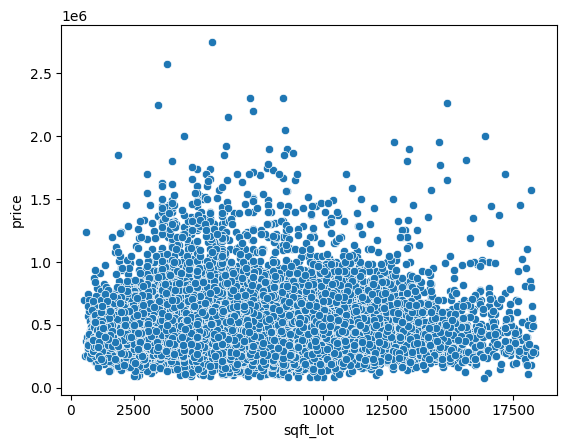

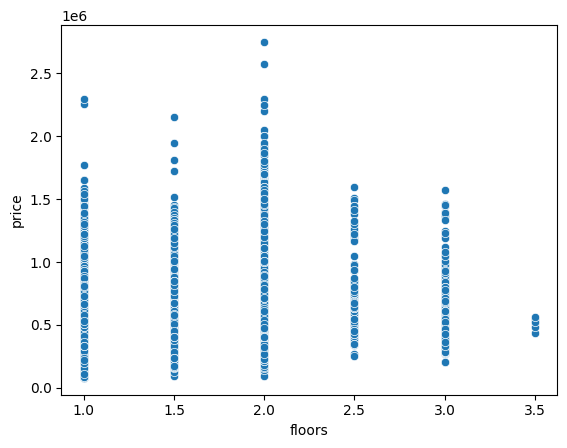

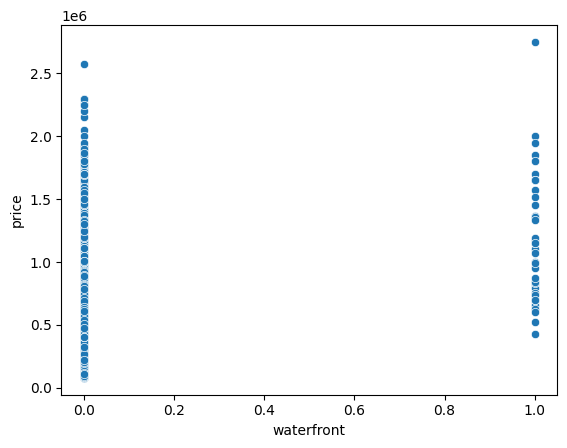

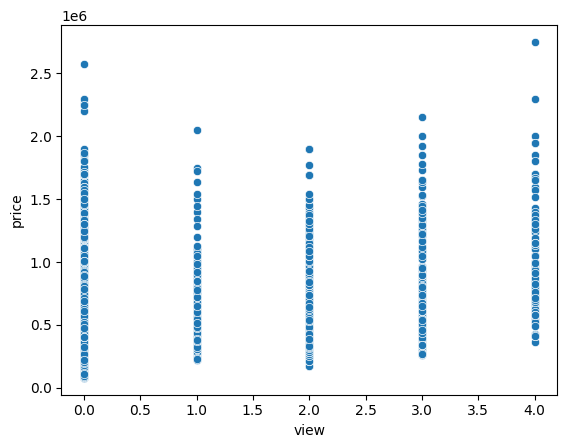

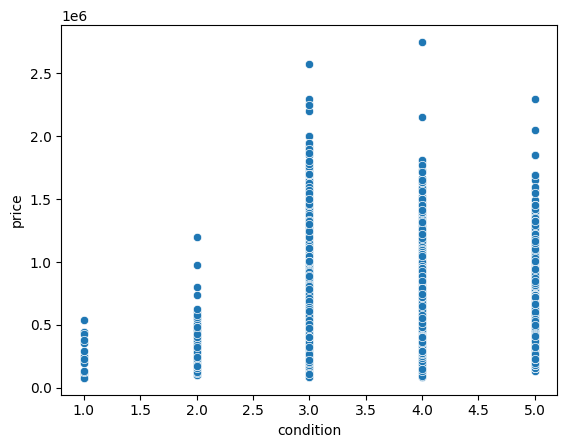

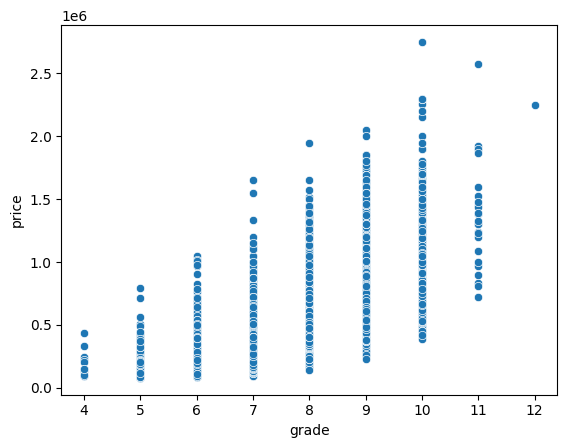

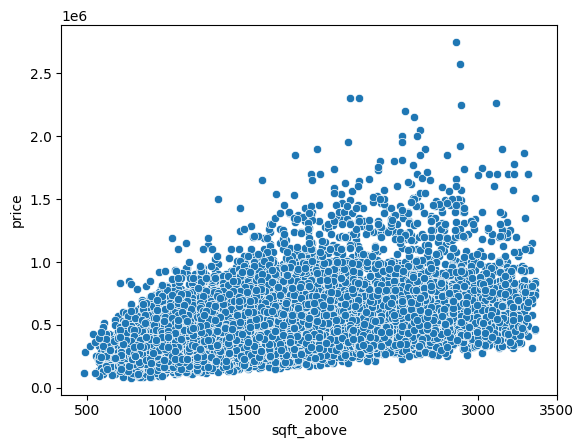

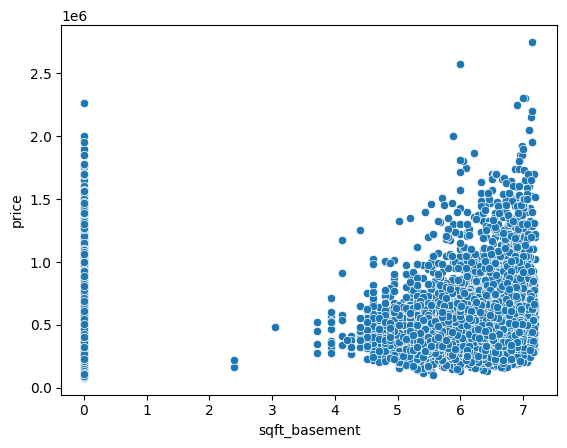

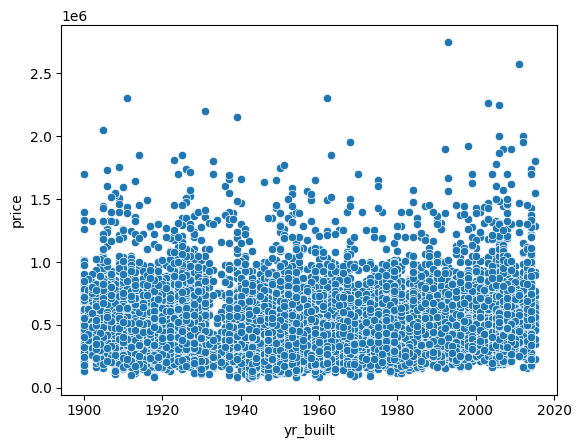

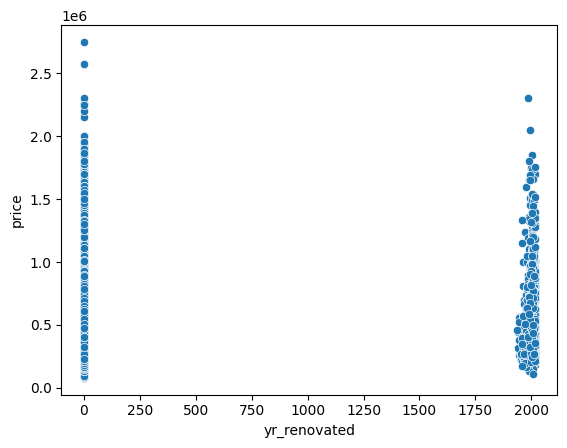

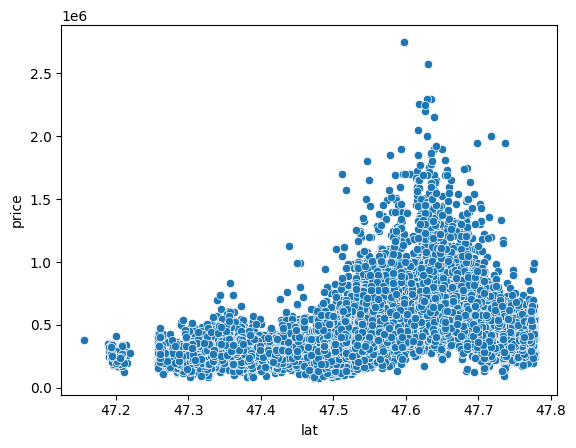

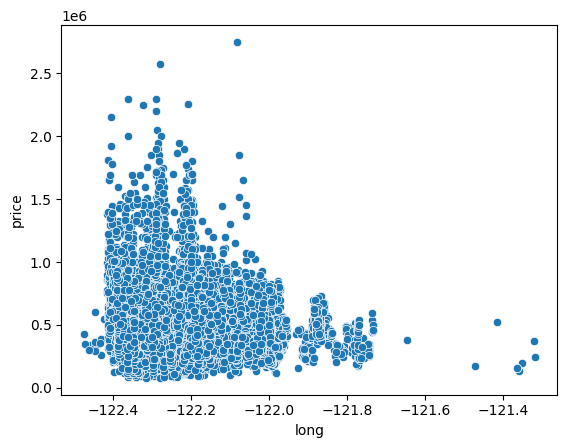

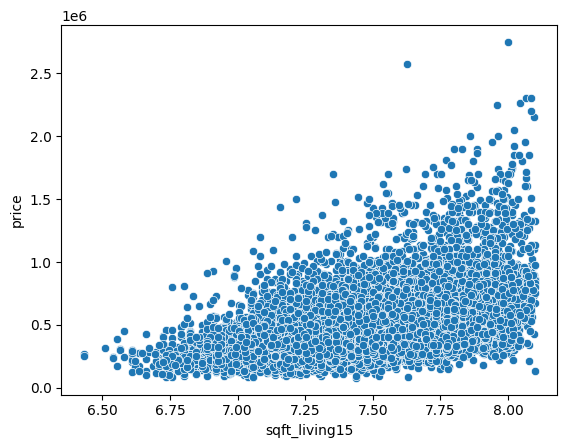

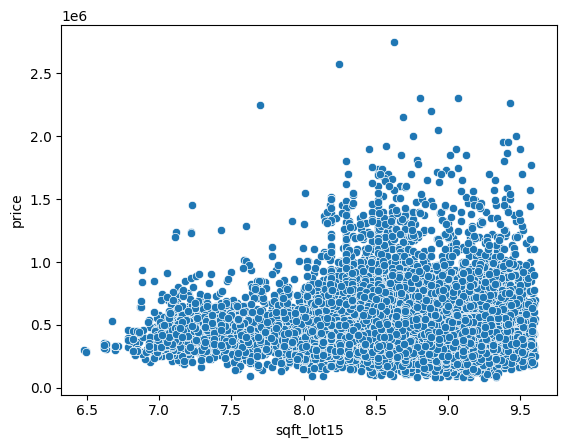

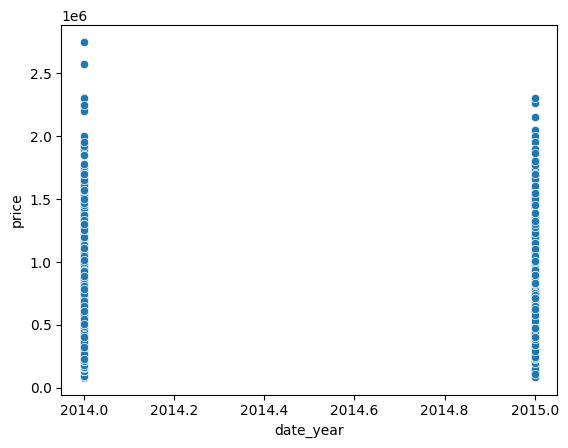

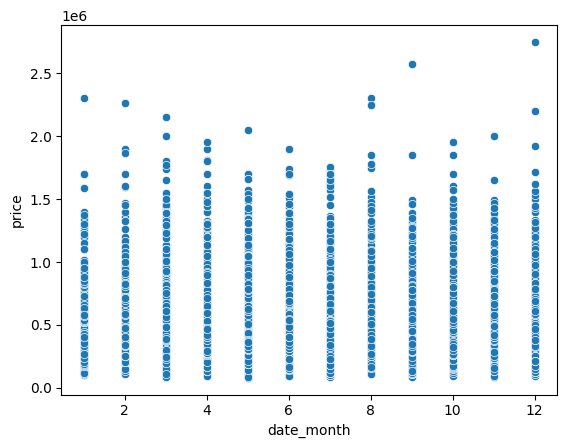

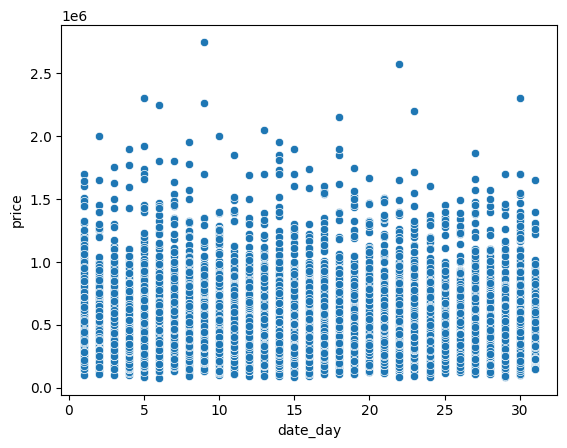

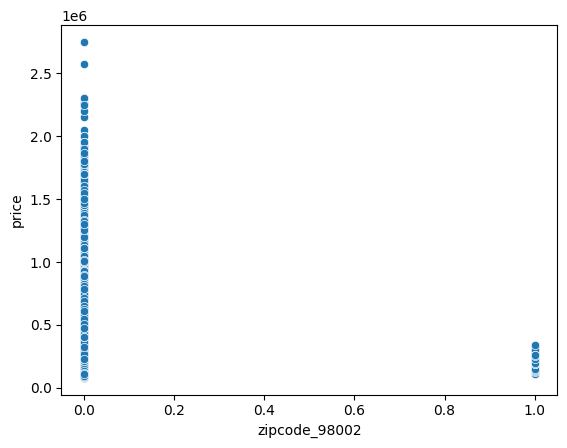

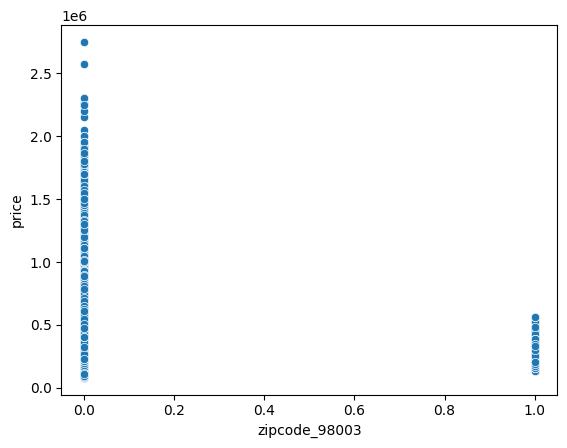

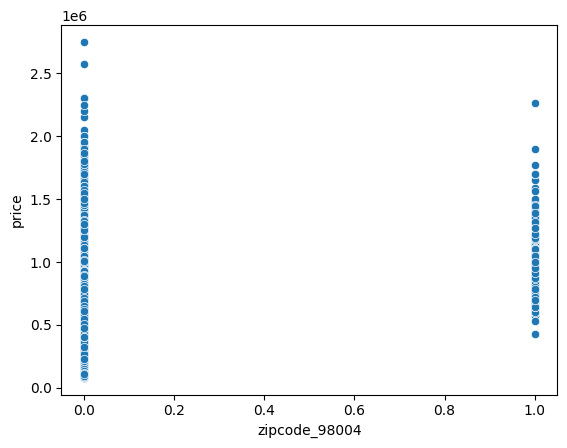

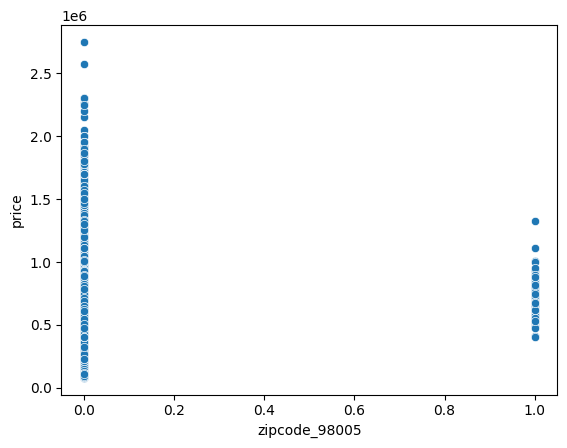

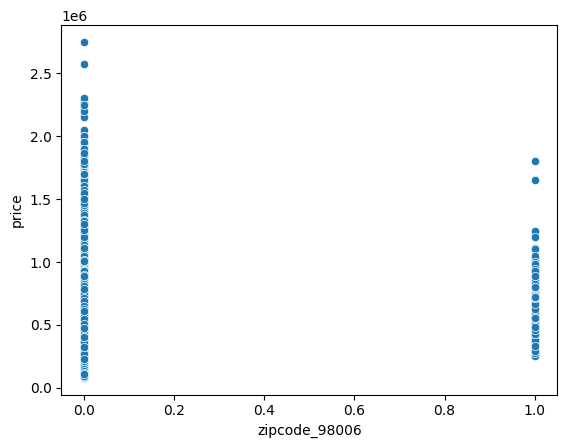

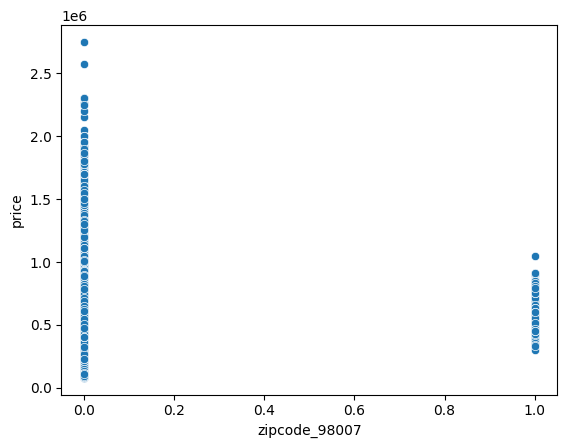

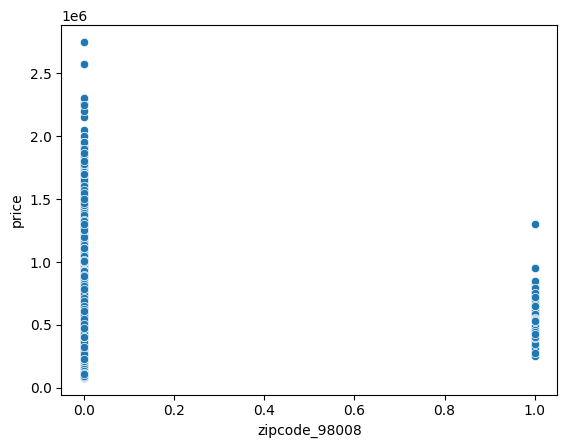

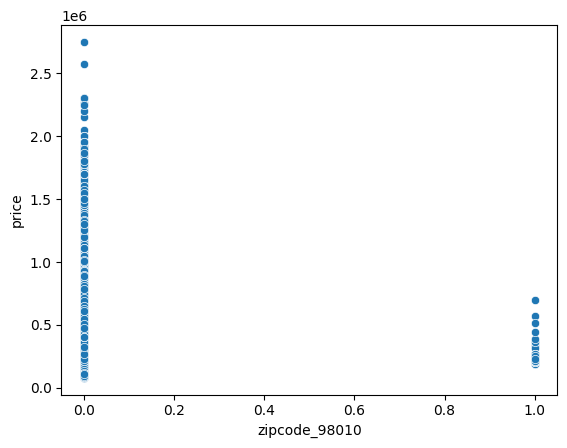

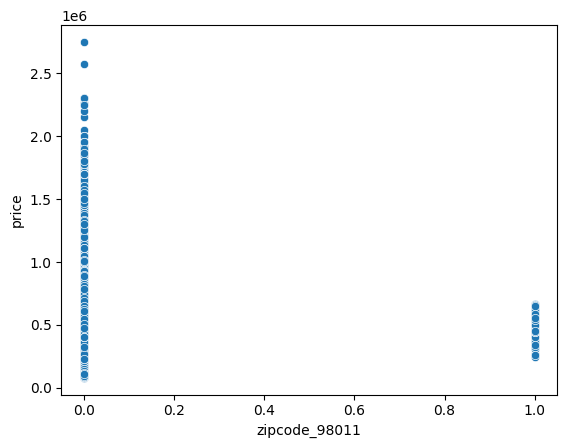

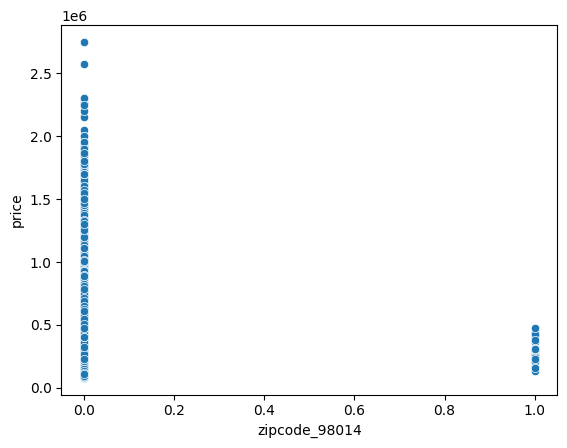

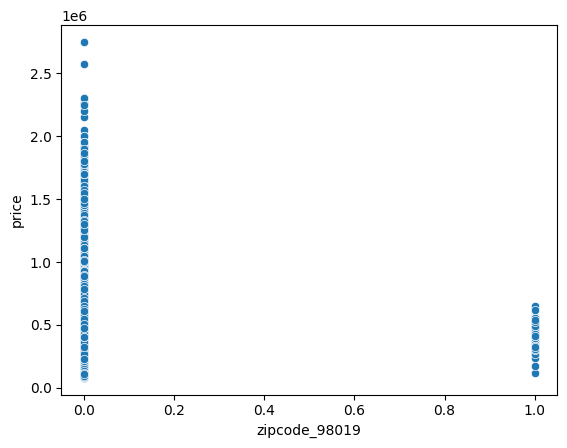

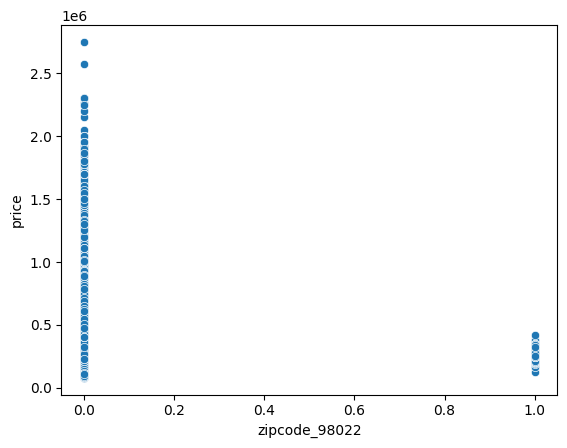

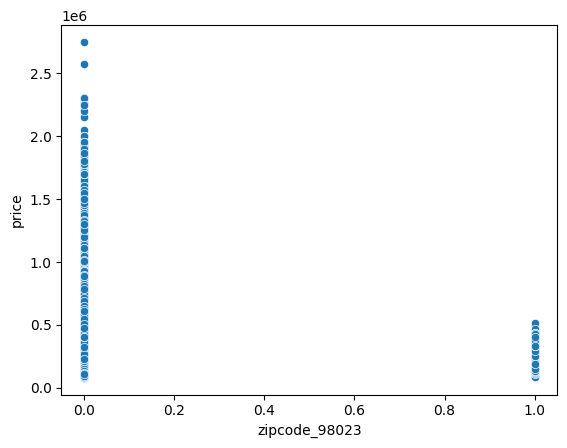

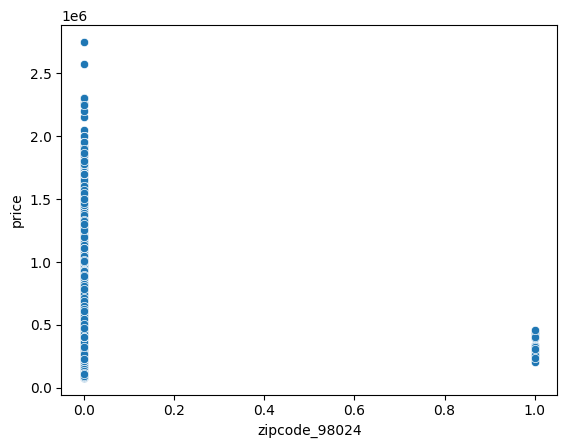

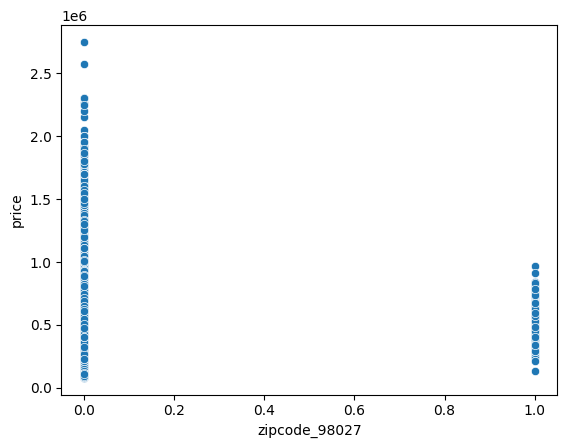

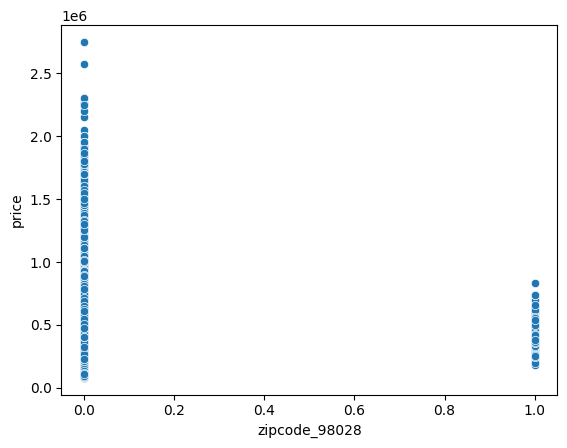

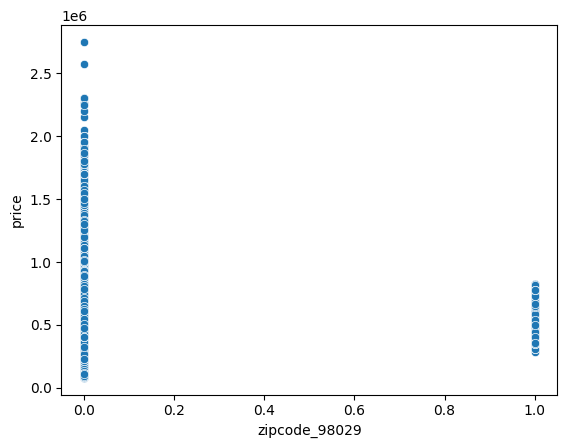

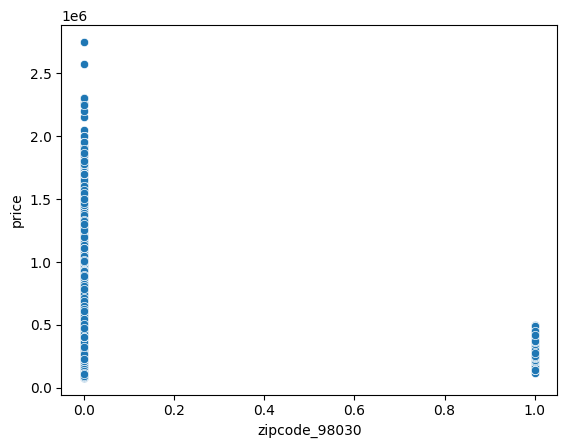

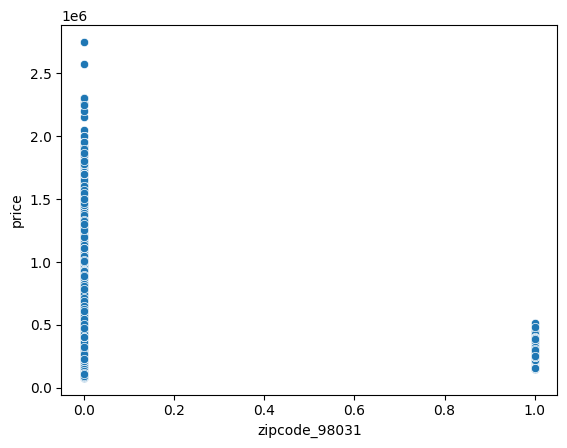

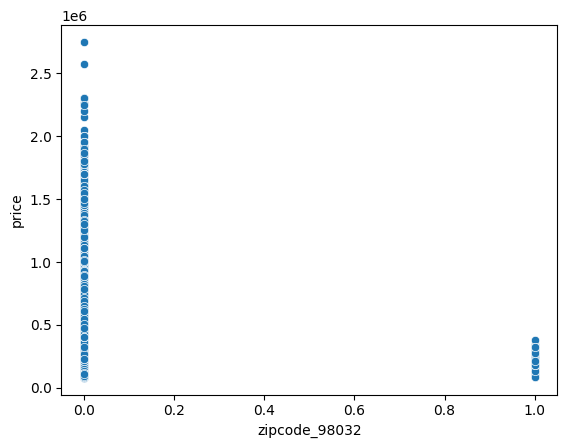

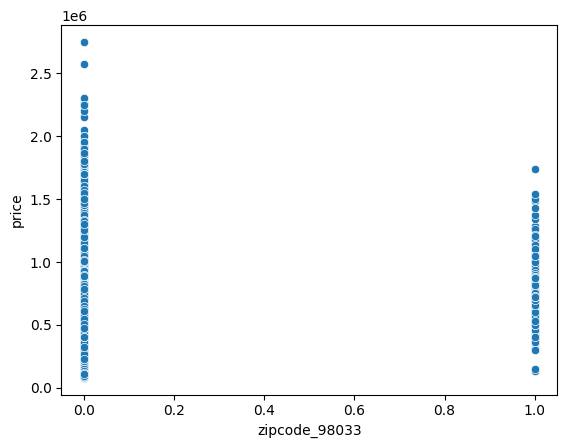

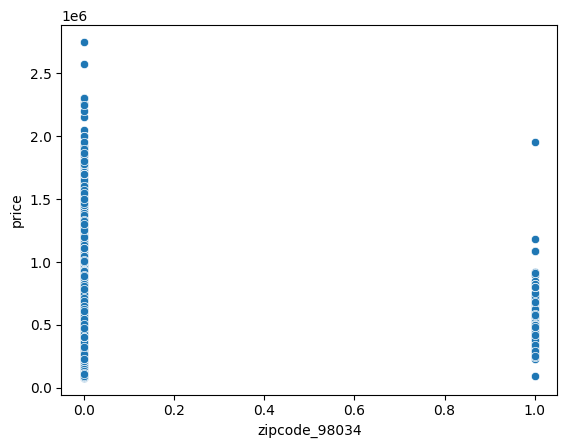

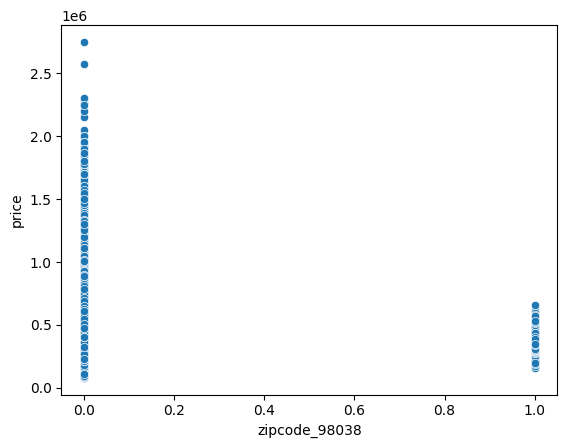

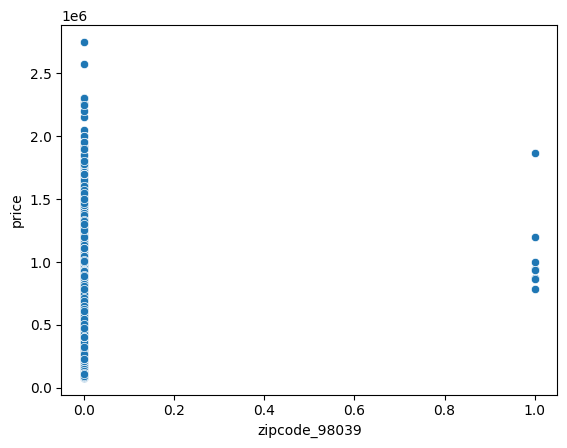

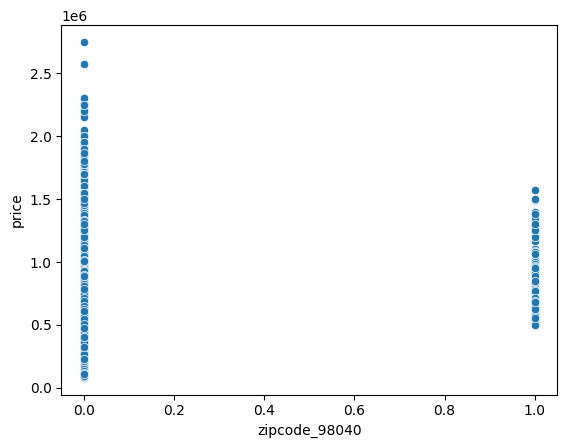

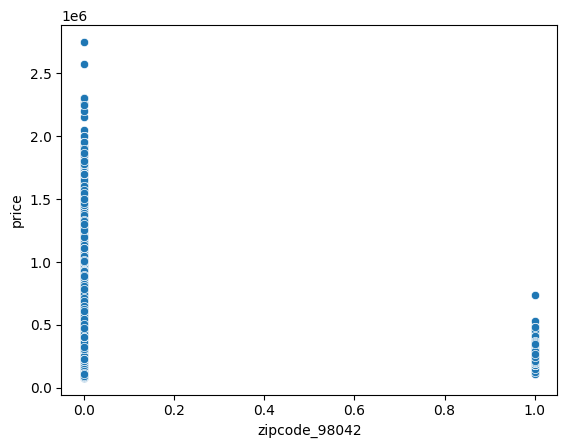

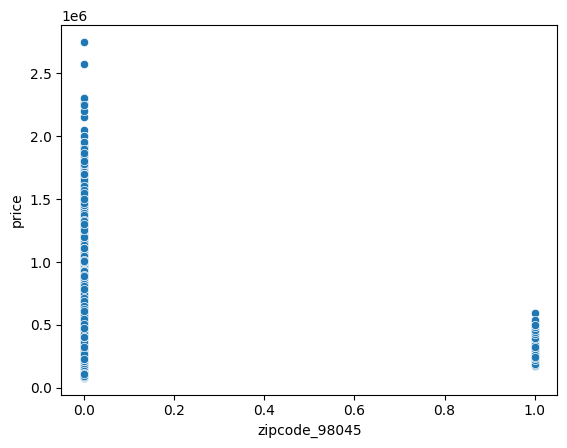

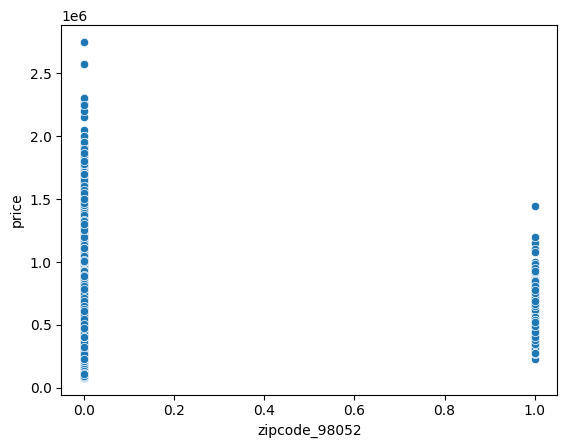

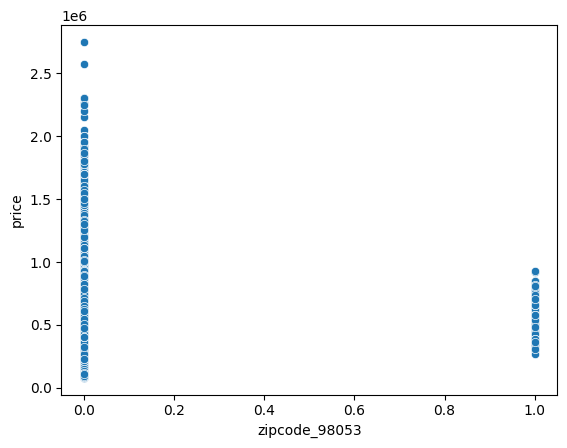

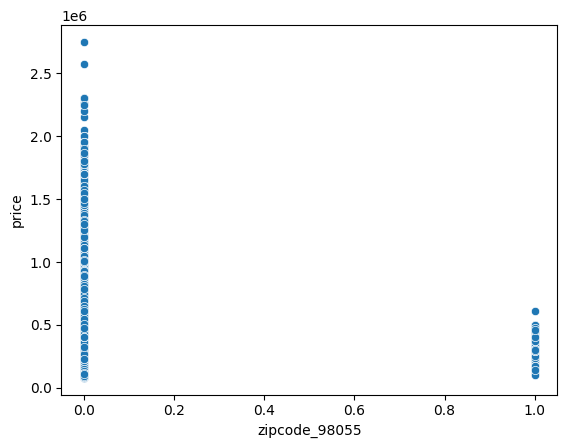

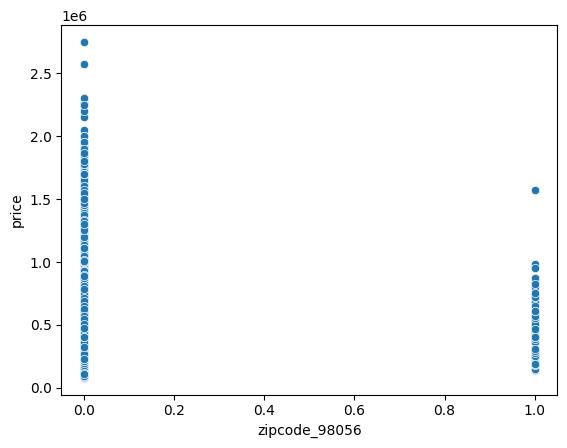

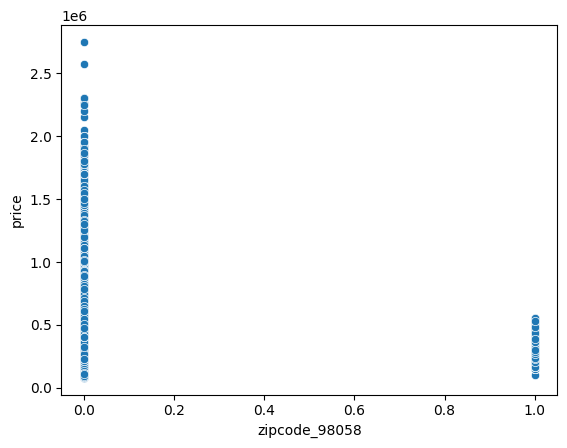

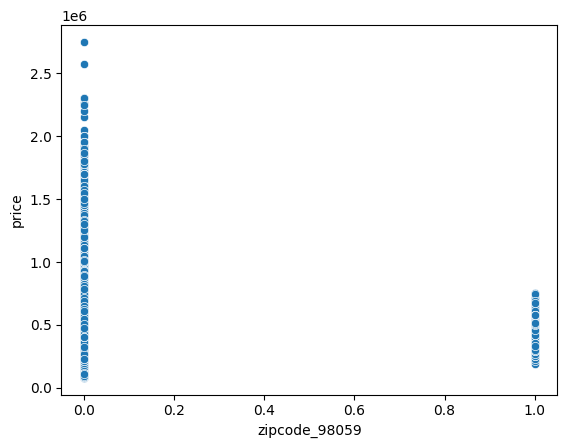

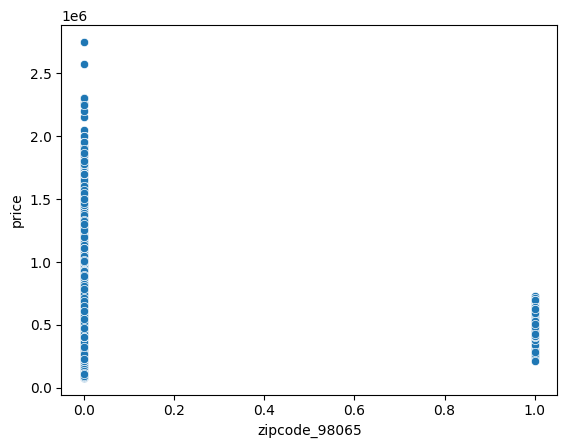

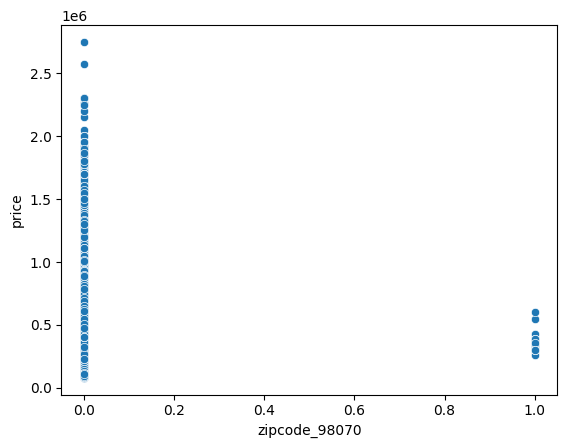

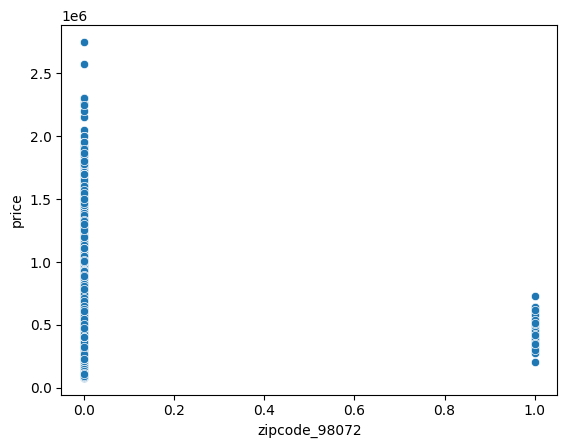

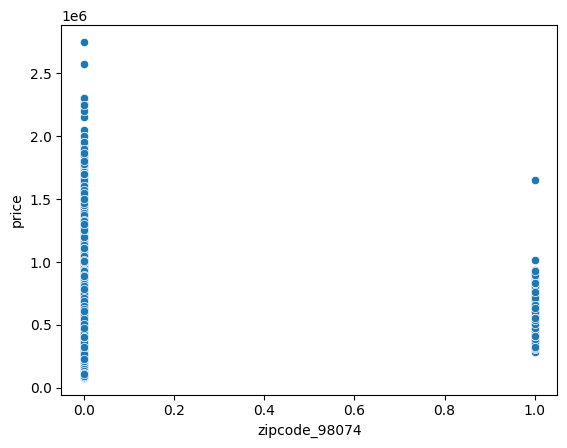

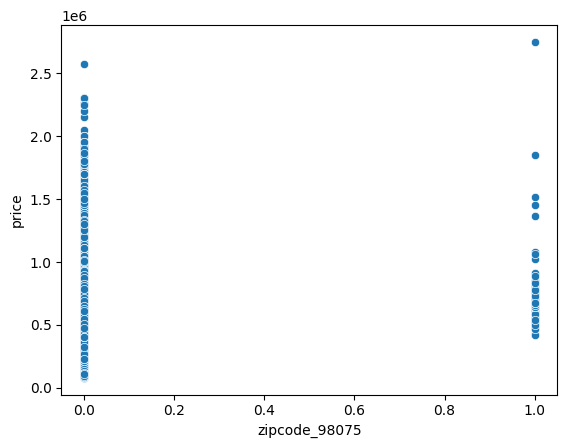

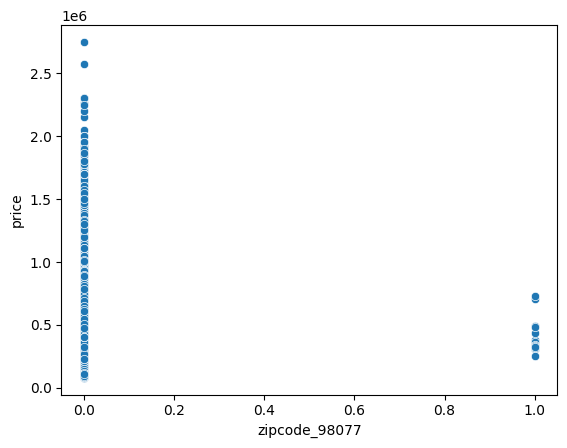

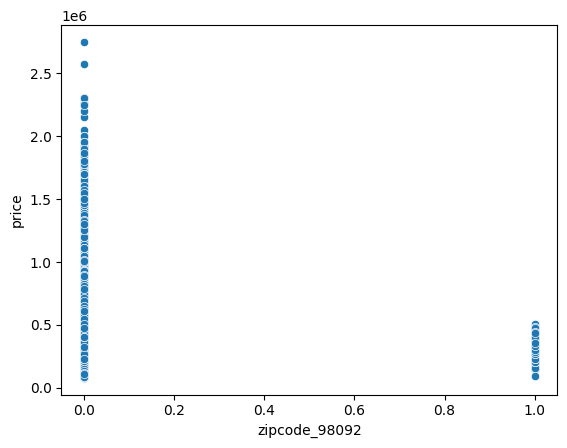

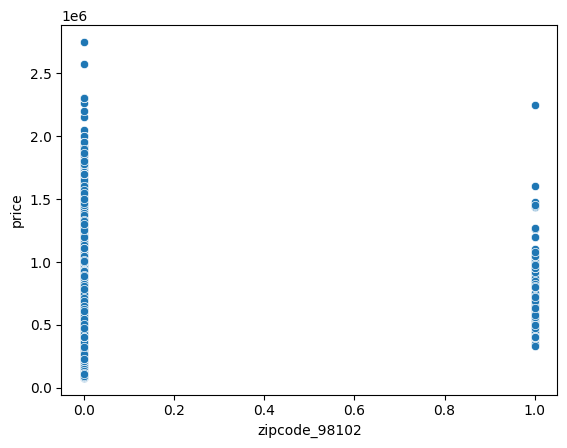

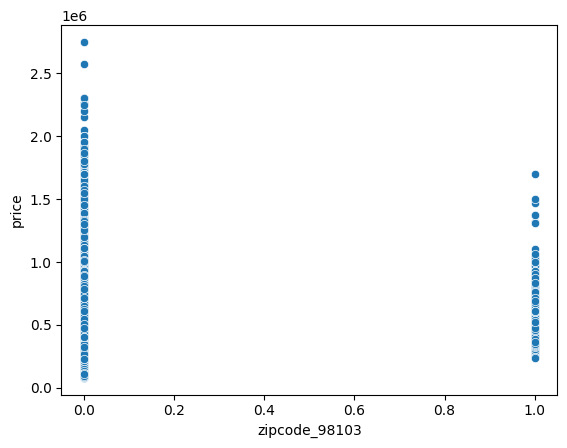

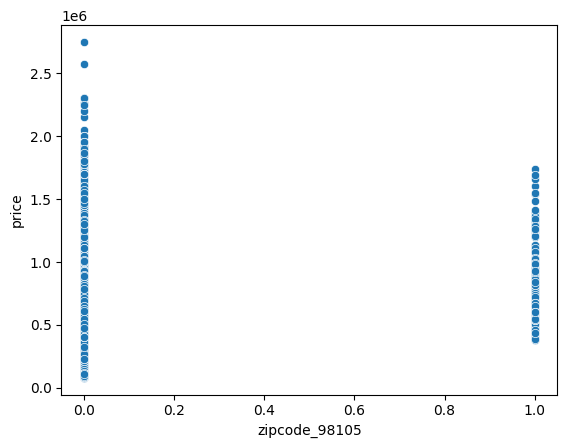

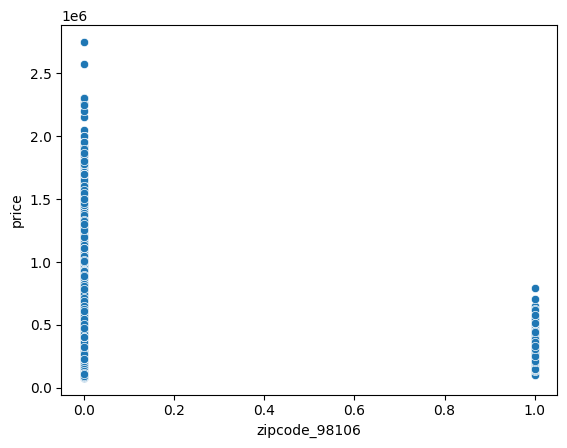

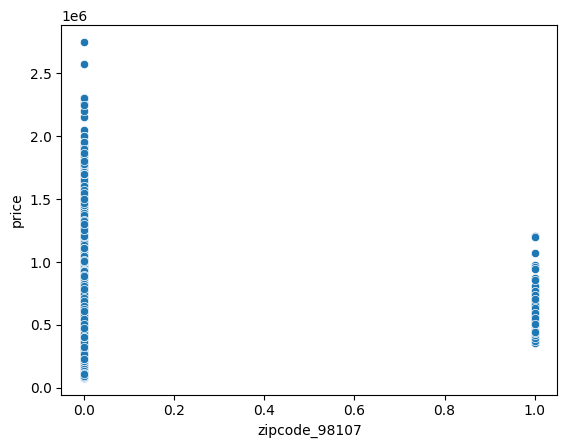

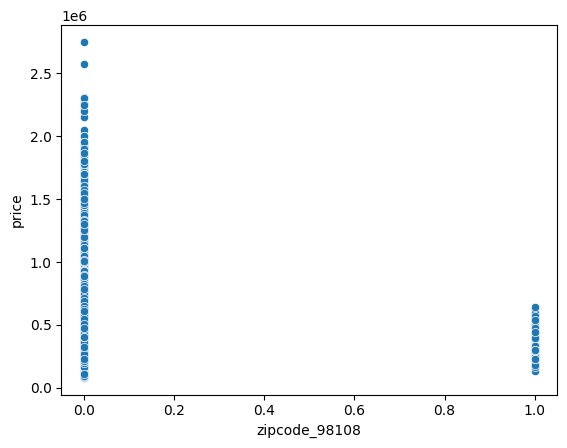

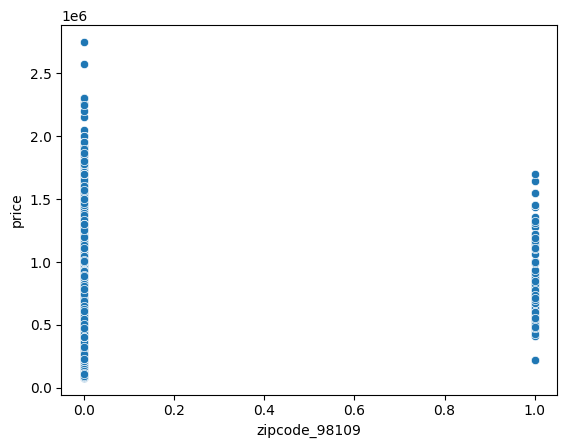

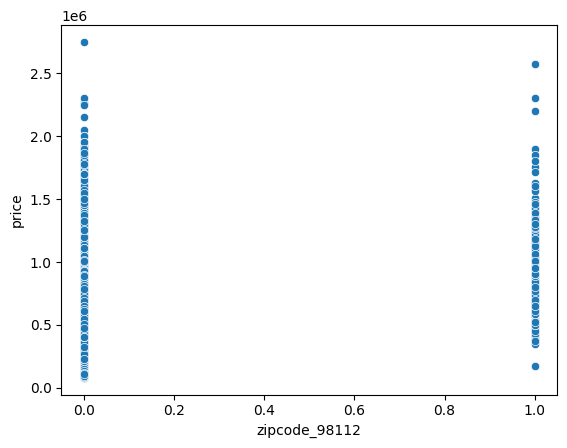

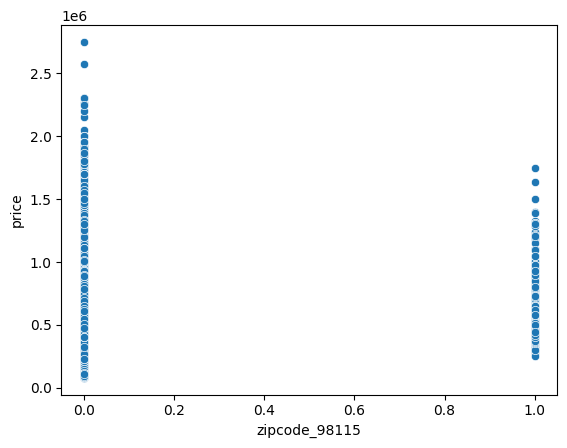

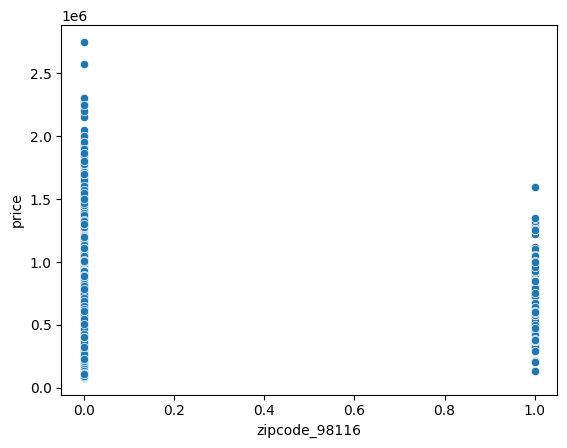

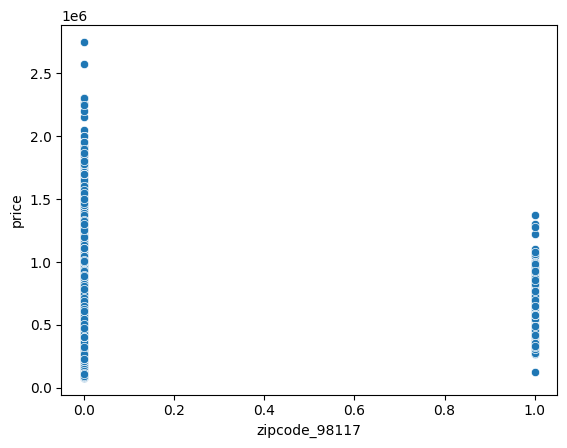

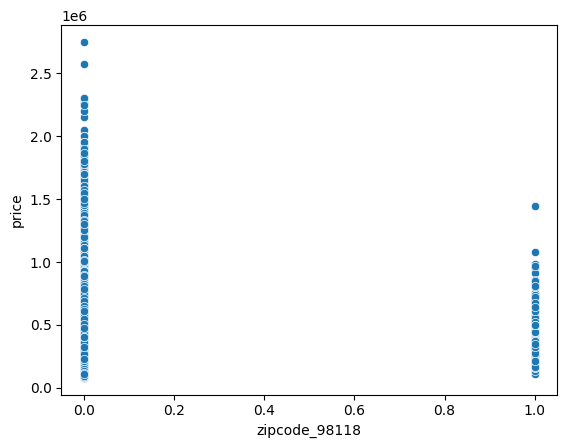

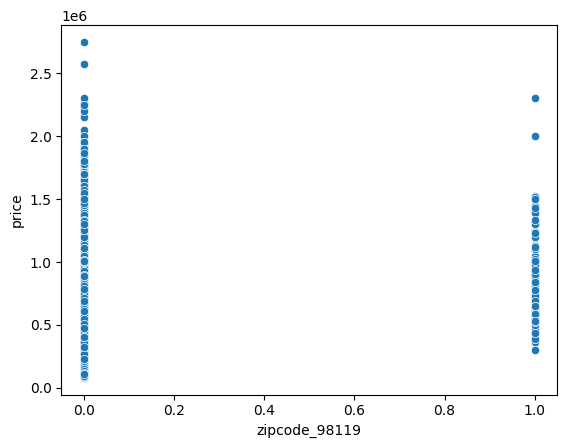

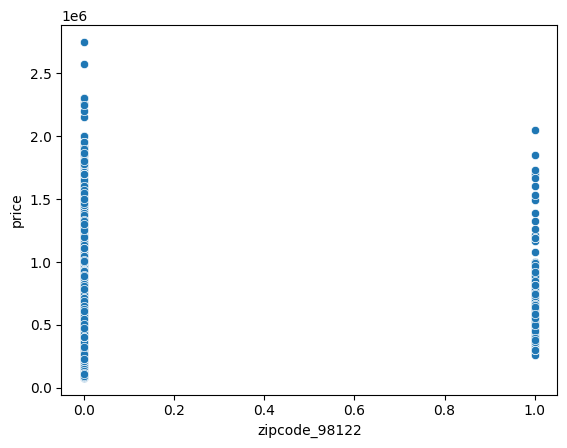

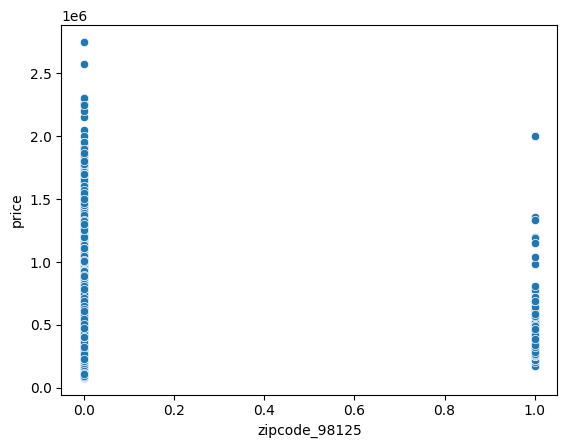

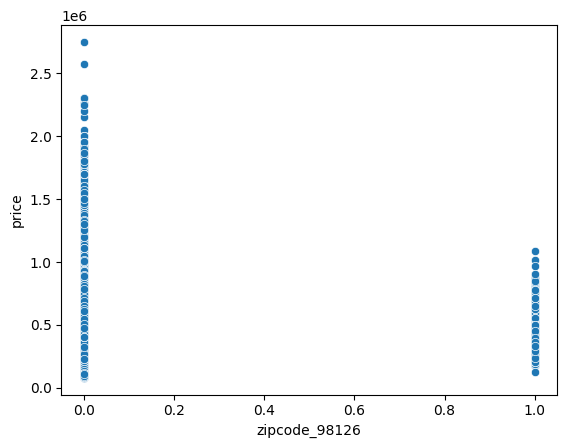

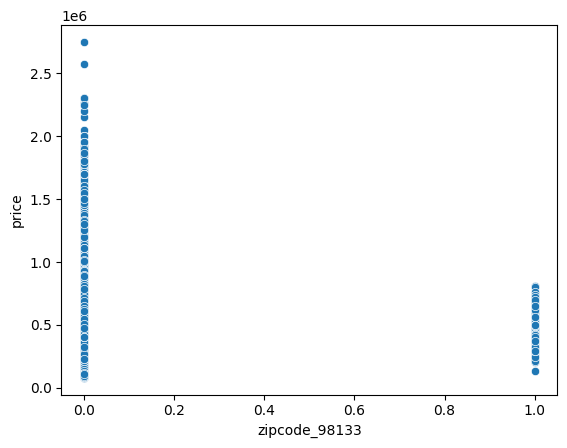

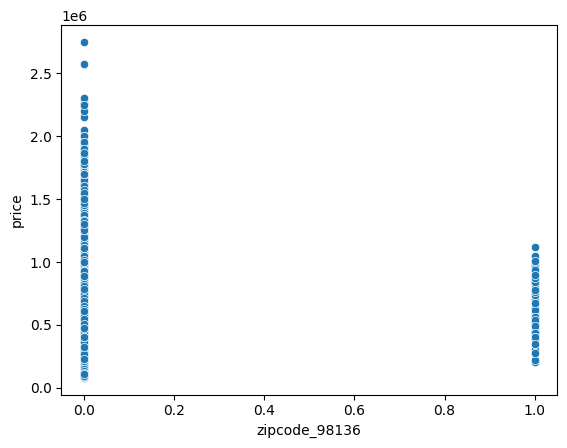

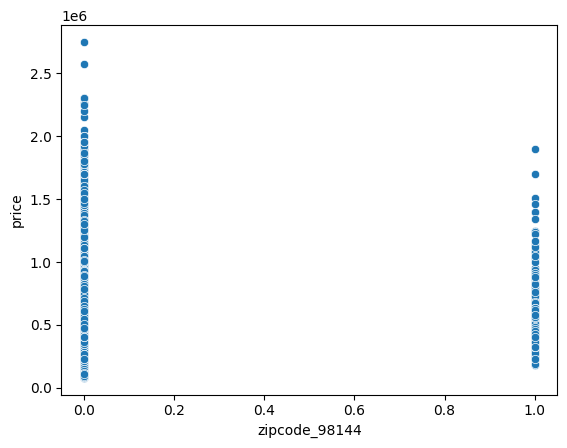

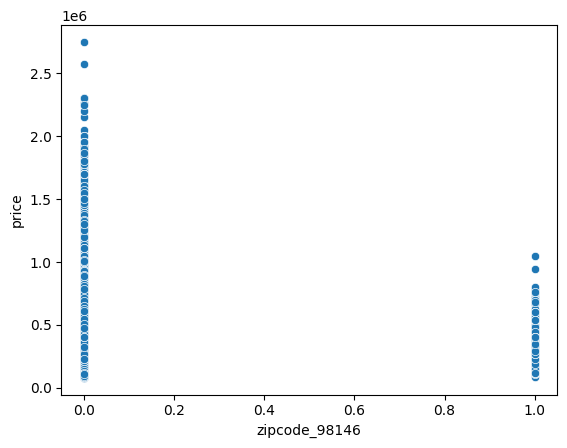

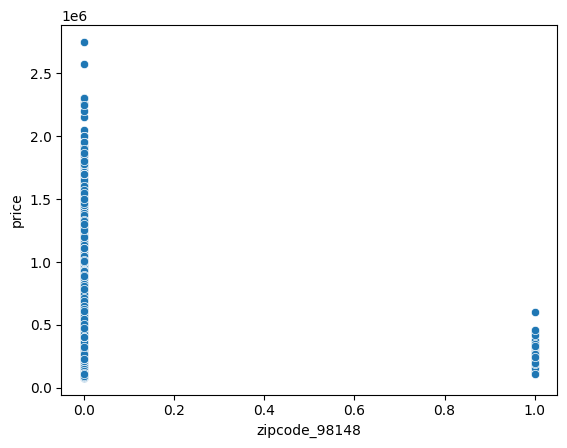

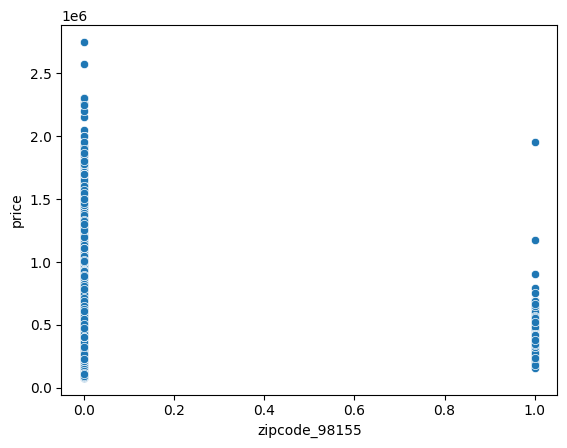

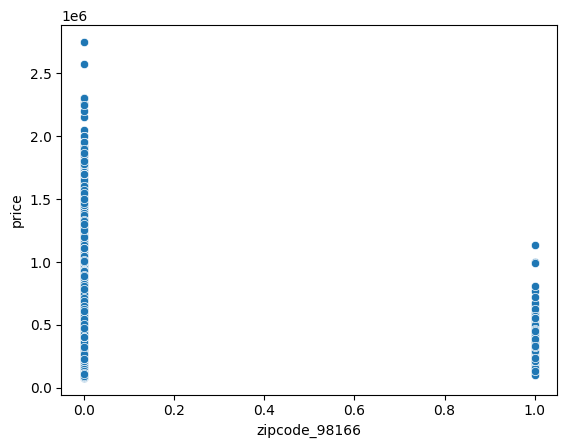

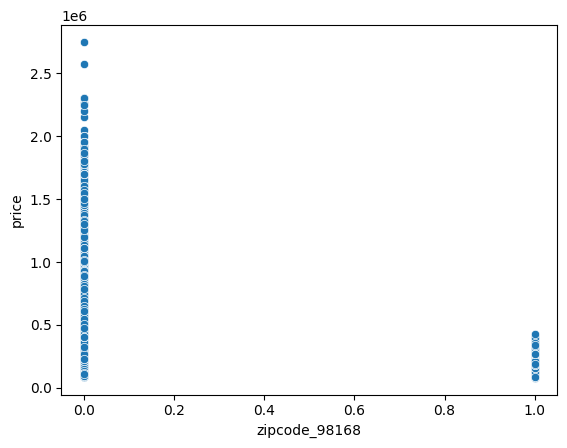

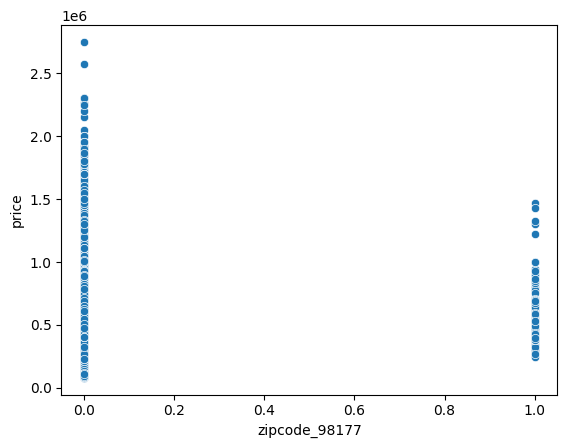

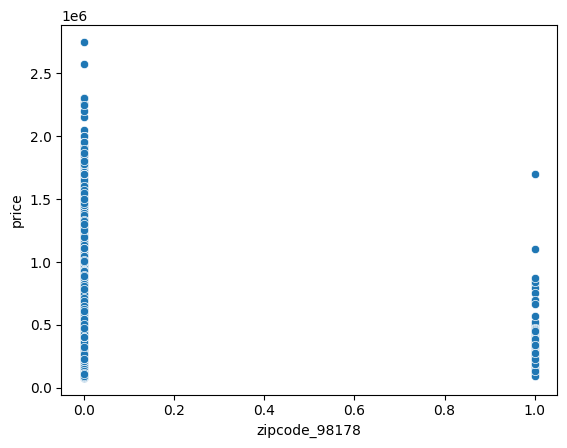

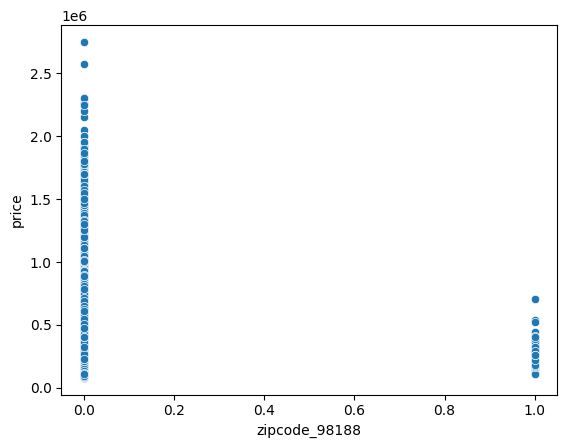

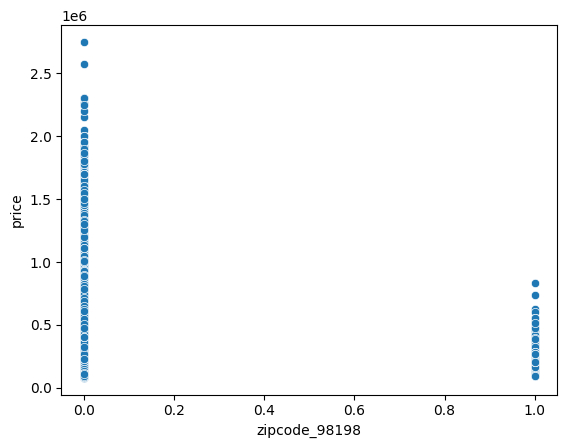

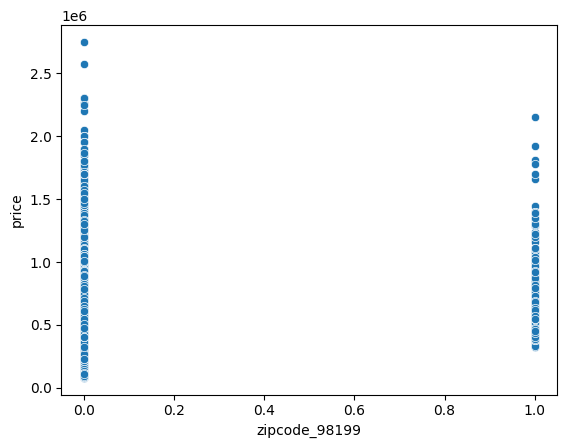

In [1625]:
for col in df.columns:
  if col != 'price' :
    sns.scatterplot(x=col, y='price', data=df)
    plt.show()


In [1626]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00     7.074117      5650     1.0           0   
1  538000.0         3       2.25     7.852050      7242     2.0           0   
2  180000.0         2       1.00     6.647688     10000     1.0           0   
3  604000.0         4       3.00     7.581210      5000     1.0           0   
4  510000.0         3       2.00     7.427144      8080     1.0           0   

   view  condition  grade  ...  zipcode_98146  zipcode_98148  zipcode_98155  \
0     0          3      7  ...          False          False          False   
1     0          3      7  ...          False          False          False   
2     0          3      6  ...          False          False          False   
3     0          5      7  ...          False          False          False   
4     0          3      8  ...          False          False          False   

   zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
0          False          False          False           True          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   zipcode_98198  zipcode_98199  
0          False          False  
1          False          False  
2          False          False  
3          False          False  
4          False          False  

[5 rows x 90 columns]

In [1627]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00     7.074117      5650     1.0           0   
1  538000.0         3       2.25     7.852050      7242     2.0           0   
2  180000.0         2       1.00     6.647688     10000     1.0           0   
3  604000.0         4       3.00     7.581210      5000     1.0           0   
4  510000.0         3       2.00     7.427144      8080     1.0           0   

   view  condition  grade  ...  zipcode_98146  zipcode_98148  zipcode_98155  \
0     0          3      7  ...          False          False          False   
1     0          3      7  ...          False          False          False   
2     0          3      6  ...          False          False          False   
3     0          5      7  ...          False          False          False   
4     0          3      8  ...          False          False          False   

   zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
0          False          False          False           True          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   zipcode_98198  zipcode_98199  
0          False          False  
1          False          False  
2          False          False  
3          False          False  
4          False          False  

[5 rows x 90 columns]

In [1628]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00     7.074117      5650     1.0           0   
1  538000.0         3       2.25     7.852050      7242     2.0           0   
2  180000.0         2       1.00     6.647688     10000     1.0           0   
3  604000.0         4       3.00     7.581210      5000     1.0           0   
4  510000.0         3       2.00     7.427144      8080     1.0           0   

   view  condition  grade  ...  zipcode_98146  zipcode_98148  zipcode_98155  \
0     0          3      7  ...          False          False          False   
1     0          3      7  ...          False          False          False   
2     0          3      6  ...          False          False          False   
3     0          5      7  ...          False          False          False   
4     0          3      8  ...          False          False          False   

   zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
0          False          False          False           True          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   zipcode_98198  zipcode_98199  
0          False          False  
1          False          False  
2          False          False  
3          False          False  
4          False          False  

[5 rows x 90 columns]

In [1629]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00     7.074117      5650     1.0           0   
1  538000.0         3       2.25     7.852050      7242     2.0           0   
2  180000.0         2       1.00     6.647688     10000     1.0           0   
3  604000.0         4       3.00     7.581210      5000     1.0           0   
4  510000.0         3       2.00     7.427144      8080     1.0           0   

   view  condition  grade  ...  zipcode_98146  zipcode_98148  zipcode_98155  \
0     0          3      7  ...          False          False          False   
1     0          3      7  ...          False          False          False   
2     0          3      6  ...          False          False          False   
3     0          5      7  ...          False          False          False   
4     0          3      8  ...          False          False          False   

   zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
0          False          False          False           True          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   zipcode_98198  zipcode_98199  
0          False          False  
1          False          False  
2          False          False  
3          False          False  
4          False          False  

[5 rows x 90 columns]

In [1630]:
for col in df.columns:
  if col != 'price' :
    correlation = df['price'].corr(df[col])
    print(f"Correlation between price and {col}: {correlation}")

Correlation between price and bedrooms: 0.2414737235104365
Correlation between price and bathrooms: 0.3961530955366642
Correlation between price and sqft_living: 0.5321504782495485
Correlation between price and sqft_lot: -0.060036330007185924
Correlation between price and floors: 0.25291182330028333
Correlation between price and waterfront: 0.1422679795924684
Correlation between price and view: 0.3094490706158271
Correlation between price and condition: 0.0691993556228924
Correlation between price and grade: 0.5898675768355198
Correlation between price and sqft_above: 0.44282583623852484
Correlation between price and sqft_basement: 0.22891828986548332
Correlation between price and yr_built: -0.04777252503677395
Correlation between price and yr_renovated: 0.15040527259144565
Correlation between price and lat: 0.42642188542129394
Correlation between price and long: -0.05149317362661511
Correlation between price and sqft_living15: 0.461261476044974
Correlation between price and sqft_lot15

In [1631]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00     7.074117      5650     1.0           0   
1  538000.0         3       2.25     7.852050      7242     2.0           0   
2  180000.0         2       1.00     6.647688     10000     1.0           0   
3  604000.0         4       3.00     7.581210      5000     1.0           0   
4  510000.0         3       2.00     7.427144      8080     1.0           0   

   view  condition  grade  ...  zipcode_98146  zipcode_98148  zipcode_98155  \
0     0          3      7  ...          False          False          False   
1     0          3      7  ...          False          False          False   
2     0          3      6  ...          False          False          False   
3     0          5      7  ...          False          False          False   
4     0          3      8  ...          False          False          False   

   zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  zipcode_98188  \
0          False          False          False           True          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   zipcode_98198  zipcode_98199  
0          False          False  
1          False          False  
2          False          False  
3          False          False  
4          False          False  

[5 rows x 90 columns]

In [1632]:
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

In [1633]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00     7.074117      5650     1.0   
1      538000.0         3       2.25     7.852050      7242     2.0   
2      180000.0         2       1.00     6.647688     10000     1.0   
3      604000.0         4       3.00     7.581210      5000     1.0   
4      510000.0         3       2.00     7.427144      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50     7.333676      1131     3.0   
21609  400000.0         4       2.50     7.745436      5813     2.0   
21610  402101.0         2       0.75     6.928538      1350     2.0   
21611  400000.0         3       2.50     7.378384      2388     2.0   
21612  325000.0         2       0.75     6.928538      1076     2.0   

       waterfront  view  condition  grade  ...  zipcode_98146  zipcode_98148  \
0               0     0          3      7  ...          False          False   
1               0     0          3      7  ...          False          False   
2               0     0          3      6  ...          False          False   
3               0     0          5      7  ...          False          False   
4               0     0          3      8  ...          False          False   
...           ...   ...        ...    ...  ...            ...            ...   
21608           0     0          3      8  ...          False          False   
21609           0     0          3      8  ...           True          False   
21610           0     0          3      7  ...          False          False   
21611           0     0          3      8  ...          False          False   
21612           0     0          3      7  ...          False          False   

       zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  \
0              False          False          False          False   
1              False          False          False          False   
2              False          False          False          False   
3              False          False          False          False   
4              False          False          False          False   
...              ...            ...            ...            ...   
21608          False          False          False          False   
21609          False          False          False          False   
21610          False          False          False          False   
21611          False          False          False          False   
21612          False          False          False          False   

       zipcode_98178  zipcode_98188  zipcode_98198  zipcode_98199  
0               True          False          False          False  
1              False          False          False          False  
2              False          False          False          False  
3              False          False          False          False  
4              False          False          False          False  
...              ...            ...            ...            ...  
21608          False          False          False          False  
21609          False          False          False          False  
21610          False          False          False          False  
21611          False          False          False          False  
21612          False          False          False          False  

[16882 rows x 90 columns]

In [1634]:
df['age_at_sale'] = df['date_year'] - df['yr_built']

df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

df.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)

In [1635]:
print(df["waterfront"].value_counts(normalize=True)
)


print(df["view"].value_counts(normalize= True)
)


waterfront
0    0.997808
1    0.002192
Name: proportion, dtype: float64
view
0    0.932058
2    0.035008
3    0.014098
1    0.012854
4    0.005983
Name: proportion, dtype: float64


In [1636]:
df.drop("waterfront",axis=1,inplace=True)


# **Linear Regression **

In [1637]:
x = df[df.columns.difference(["price"])]
y = df[["price"]]


In [1638]:
x.head()

age_at_sale  bathrooms  bedrooms  condition  date_day  date_month  \
0           59       1.00         3          3        13          10   
1           63       2.25         3          3         9          12   
2           82       1.00         2          3        25           2   
3           49       3.00         4          5         9          12   
4           28       2.00         3          3        18           2   

   date_year  floors  grade  is_renovated  ...  zipcode_98146  zipcode_98148  \
0       2014     1.0      7             0  ...          False          False   
1       2014     2.0      7             1  ...          False          False   
2       2015     1.0      6             0  ...          False          False   
3       2014     1.0      7             0  ...          False          False   
4       2015     1.0      8             0  ...          False          False   

   zipcode_98155  zipcode_98166  zipcode_98168  zipcode_98177  zipcode_98178  \
0          False          False          False          False           True   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False          False   

   zipcode_98188  zipcode_98198  zipcode_98199  
0          False          False          False  
1          False          False          False  
2          False          False          False  
3          False          False          False  
4          False          False          False  

[5 rows x 88 columns]

In [1639]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [1640]:
y.head()

price
0  221900.0
1  538000.0
2  180000.0
3  604000.0
4  510000.0

In [1641]:
x.shape

(16882, 88)

spliting train and test

In [1642]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=100)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [1643]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [1644]:
print(lr.intercept_)
print(lr.coef_)

[467628.18141429]
[[ 16328.05936071  15686.40331081  -2087.11013606  20052.95740434
    -481.48585258   2461.31594532  15472.72682281  -6223.38169316
   50186.42172355   9850.08153512 -11164.44058016  -5557.49307535
   92121.7297659   33103.44847078 -13263.84516138   6160.8435884
   -2178.44322584  20403.10388935  36058.74711887   2079.22191741
   -1217.02226526  58686.17492133  26227.32404067  35979.32529254
   22929.42852748  29213.73033601   2955.33290132  17279.22902002
    6842.65073829  11880.86883328   -610.82495484  -4153.25372094
    6376.319631    29279.45896857  19203.30263799  33595.47310287
     665.6626165    2424.61720441    407.22726406  49644.63182464
   36928.19937942   8807.9013556   15660.15665705  40545.70594099
    2803.6284966   10979.18290343  45889.73152788  32586.88750169
    6329.4107537   17502.46344973   6641.37382305  14094.36352421
   18977.49242081   1541.73228778  16476.92855664  30073.64378596
   24530.18281267   8217.01289359  -3482.46667095  32533.32

In [1645]:
y_pred = lr.predict(x_test)

In [1646]:
pd.DataFrame({"Actual":y_test.values.flatten(),"Predicted":y_pred.flatten()})

Actual      Predicted
0      327000.0  331131.289543
1      326995.0  268055.591624
2      285000.0  310462.280132
3      353900.0  325770.205163
4      415000.0  423590.845149
...         ...            ...
3372   339888.0  312229.081963
3373   355000.0  306660.354863
3374   299000.0  294287.157133
3375   385000.0  387710.600590
3376  1007500.0  797710.013693

[3377 rows x 2 columns]

In [1647]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))


0.8074277050745791
0.8011453808820358


In [1648]:
from sklearn import metrics

In [1649]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 69659.86320435113
Mean Squared Error: 12155189114.901947
Root Mean Squared Error: 110250.57421574704
